# Online Pay Probability

### Problems

We found that the existing dataset is imbalanced. And the classifier after training without resampling and feature selection couldn't predict anything. And we couldn't believe in its accuracy because over 90% of the samples are class "0". That means it's extremely imbalanced. So, we would like to explore a good pipeline for data pre-processing and to handle an imbalanced dataset.

### Imports Library
แนะนำให้ Set Enviroment เป็น Python 3.6 
หาก run แล้ว ขาด module ไหน ให้ install เพิ่ม จนกว่าจะ run ผ่าน

In [1]:
%matplotlib inline
# regex
import re
import csv

#time
import pytz as tz
from datetime import datetime

#data explore
import numpy as np
np.random.seed(1337)

#For reading excel files
import xlrd

# dataframes in python
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

from skrebate import ReliefF
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import matplotlib.pyplot as plt
import os
import shutil
from imblearn.under_sampling import RandomUnderSampler
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score


from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout


import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.
/anaconda3/envs/[anaconda36]/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Initialization of the visualization library

In [2]:
#defaults
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

### Get data
We use pandas to read the data from its original excel format into a dataframe

In [3]:
url1 = 'https://github.com/ruxpolth/class_room_practice/blob/master/ONLINETPAY_JAN_APRIL_DATASET.xlsx?raw=true'
url2 = 'https://github.com/ruxpolth/class_room_practice/blob/master/ONLINEPAY_FEB_MAY_DATASET.xlsx?raw=true'

In [4]:
df = pd.read_excel(url1, header=1)

In [5]:
df_test = pd.read_excel(url2, header=1)
df_test_id = pd.read_excel(url2, header=1)

### Clean up
We lowercase the column name, and rename the column names when required. And we drop "ID" which is our samples.

In [6]:
df.columns = [x.lower() for x in df.columns]
df = df.drop('id', axis=1)
df

,gender,age,transaction_on_mon,transaction_on_tue,transaction_on_wed,transaction_on_thu,transaction_on_fri,transaction_on_sat,transaction_on_sun,num_of_day_type_weekend,...,transaction_amt_97000_97999,transaction_amt_99000_100000,transaction_fee_amt_0_29,transaction_fee_amt_30_59,transaction_fee_amt_60_89,transaction_fee_amt_90_120,num_acc_tranfers,num_iconfirm_y,num_iconfirm_n,current_state
0,1,33,0,6,0,2,2,0,0,0,...,0,0,6,4,0,0,10,5,5,0
1,1,45,0,0,3,0,0,3,0,3,...,0,0,6,0,0,0,6,4,2,0
2,2,19,0,4,4,2,7,4,4,8,...,0,0,18,7,0,0,25,11,14,0
3,1,22,0,0,0,0,0,4,0,4,...,0,0,4,0,0,0,4,4,0,0
4,1,45,0,0,0,0,0,2,0,2,...,0,0,0,2,0,0,2,1,1,0
5,1,35,0,0,8,3,0,18,12,30,...,0,0,41,0,0,0,41,27,14,1
6,1,43,0,0,0,3,0,0,0,0,...,0,0,3,0,0,0,3,2,1,0
7,1,46,0,3,3,0,0,0,0,0,...,0,0,3,3,0,0,6,4,2,0
8,1,35,0,0,0,0,2,0,0,0,...,0,0,2,0,0,0,2,1,1,0
9,1,66,0,3,2,2,2,4,2,6,...,0,0,0,13,2,0,15,7,8,0


In [7]:
df_test.columns = [x.lower() for x in df_test.columns]
df_test = df_test.drop('id', axis=1)
df_test

,gender,age,transaction_on_mon,transaction_on_tue,transaction_on_wed,transaction_on_thu,transaction_on_fri,transaction_on_sat,transaction_on_sun,num_of_day_type_weekend,...,transaction_amt_97000_97999,transaction_amt_99000_100000,transaction_fee_amt_0_29,transaction_fee_amt_30_59,transaction_fee_amt_60_89,transaction_fee_amt_90_120,num_acc_tranfers,num_iconfirm_y,num_iconfirm_n,current_state
0,1,33,0,4,0,0,2,0,0,0,...,0,0,4,2,0,0,6,3,3,0
1,1,45,0,0,3,0,0,0,0,0,...,0,0,3,0,0,0,3,2,1,0
2,2,19,0,2,4,2,5,2,0,2,...,0,0,13,2,0,0,15,7,8,0
3,1,22,0,0,0,0,0,4,0,4,...,0,0,4,0,0,0,4,4,0,0
4,1,35,0,0,8,3,0,15,3,18,...,0,0,29,0,0,0,29,19,10,0
5,1,43,0,0,0,3,0,0,0,0,...,0,0,3,0,0,0,3,2,1,0
6,1,46,0,3,3,0,0,0,0,0,...,0,0,3,3,0,0,6,4,2,0
7,1,35,0,0,0,0,2,0,0,0,...,0,0,2,0,0,0,2,1,1,0
8,1,66,0,3,0,2,2,2,2,4,...,0,0,0,9,2,0,11,5,6,0
9,1,53,2,0,0,0,0,0,1,1,...,0,0,3,0,0,0,3,1,2,0


### Current samples before preprocessing

In [8]:
print("Explanatory variables:  {}".format(len(df.columns[df.columns!='id'])-1))
print("Number of Observations: {}".format(df.shape[0]))

Explanatory variables:  99
Number of Observations: 8720


In [9]:
#DF-Test Size
print("Explanatory variables:  {}".format(len(df_test.columns[df_test.columns!='id'])-1))
print("Number of Observations: {}".format(df_test.shape[0]))

Explanatory variables:  99
Number of Observations: 7889


### Explore data analysis

First, let's start with a zoomed out view on the problem.  
We want to predict probabilites of Promptpay registration, Let's answer the following questions:

  - How many cases do we have on our dataset to work with? 
  - Is the dataset suitable for building a classifier?

Promptpay accounts are 3.864678899082569% out of 8720 observations


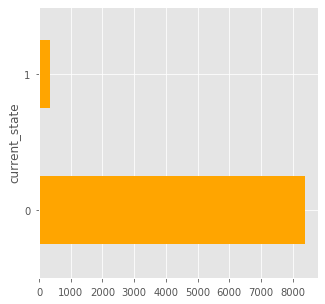

In [10]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['current_state']).size()

print("Promptpay accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='orange')

Promptpay accounts are 2.852072506021042% out of 7889 observations


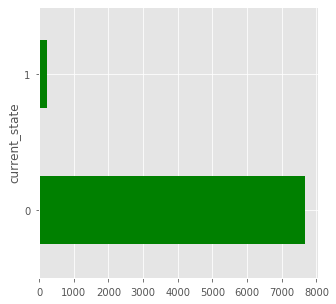

In [11]:
#Test dataset
fig = plt.figure()
fig.set_size_inches(5,5)
d_test = df_test.groupby(['current_state']).size()

print("Promptpay accounts are {}% out of {} observations".format(100* d_test[1]/(d_test[1]+d_test[0]), d_test[1]+d_test[0]))
p_test = d_test.plot(kind='barh', color='green')

### Discussion

We found that this dataset is extremely imbalanced between 2 classes. The dataset will not be good for training. So, we have to make it balance reasonably.

### Non-Sampling data

In [12]:
non_sampling_X = df.loc[:,df.columns != 'current_state']
non_sampling_y = df['current_state']

In [13]:
testset_X = df_test.loc[:,df_test.columns != 'current_state']
testset_y = df_test['current_state']

### Sampling Methods

#### Balancing Method #1 SMOTE
<br>I propose the borderline 2 method, because there is a paper [1] that it is much better than the regular one.<br>
Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning (Hui Han, Wen-Yuan Wang, et al.)[1]

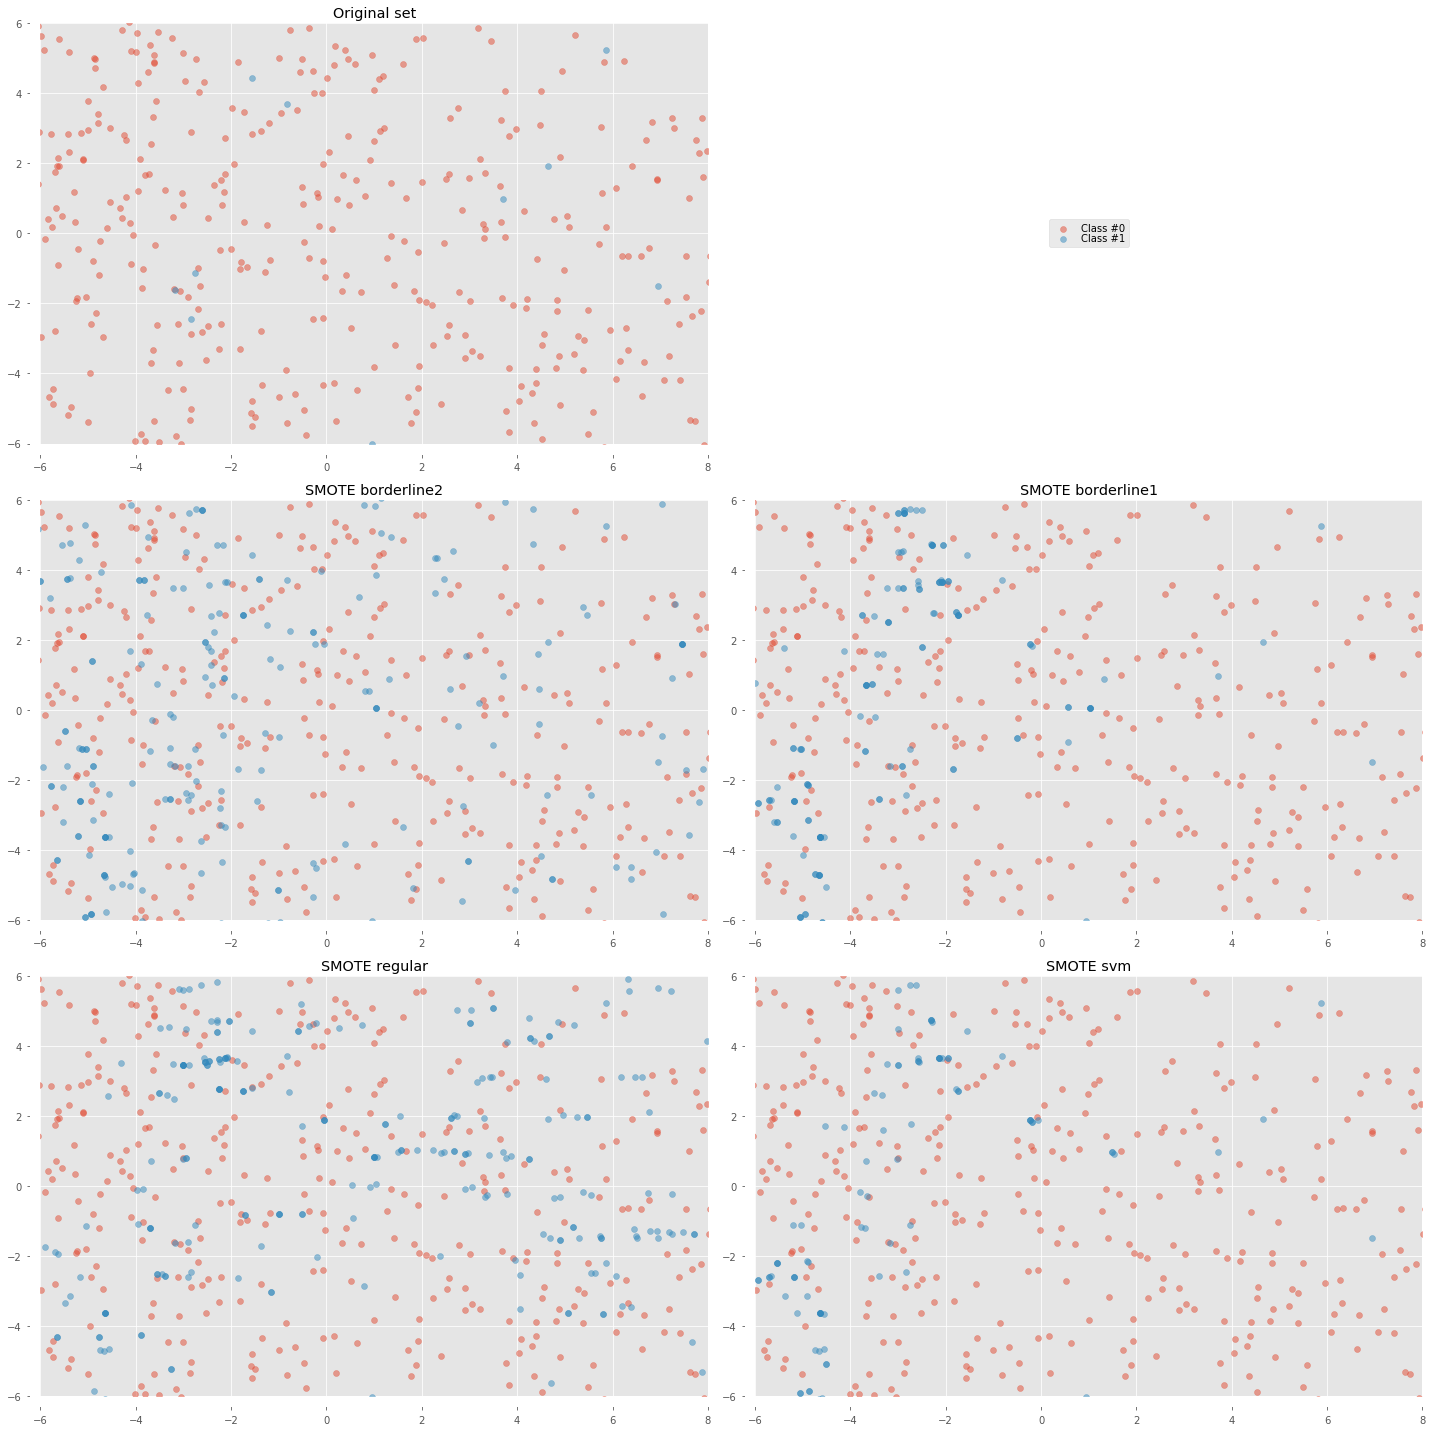

In [14]:
def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

X = df.loc[:,(df.columns != 'current_state') & (df.columns != 'id')]
y = df['current_state']
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['borderline2', 'borderline1', 'regular', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

Promptpay accounts are 50.0% out of 16766 observations


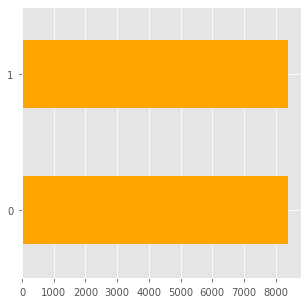

In [15]:
X_resampled_smote_array = np.array(X_resampled[1])
y_resampled_smote_array = np.array(y_resampled[1])

fig = plt.figure()
fig.set_size_inches(5,5)
d_smote = pd.Series([y_resampled_smote_array[y_resampled_smote_array==0].shape[0], \
                     y_resampled_smote_array[y_resampled_smote_array==1].shape[0]])
print("Promptpay accounts are {}% out of {} observations".format(100* d_smote[1]/(d_smote[1]+d_smote[0]), \
                                                                 d_smote[1]+d_smote[0]))
p_smote = d_smote.plot(kind='barh', color='orange')

#### Balancing Method #2 Random Undersampling (Random US)

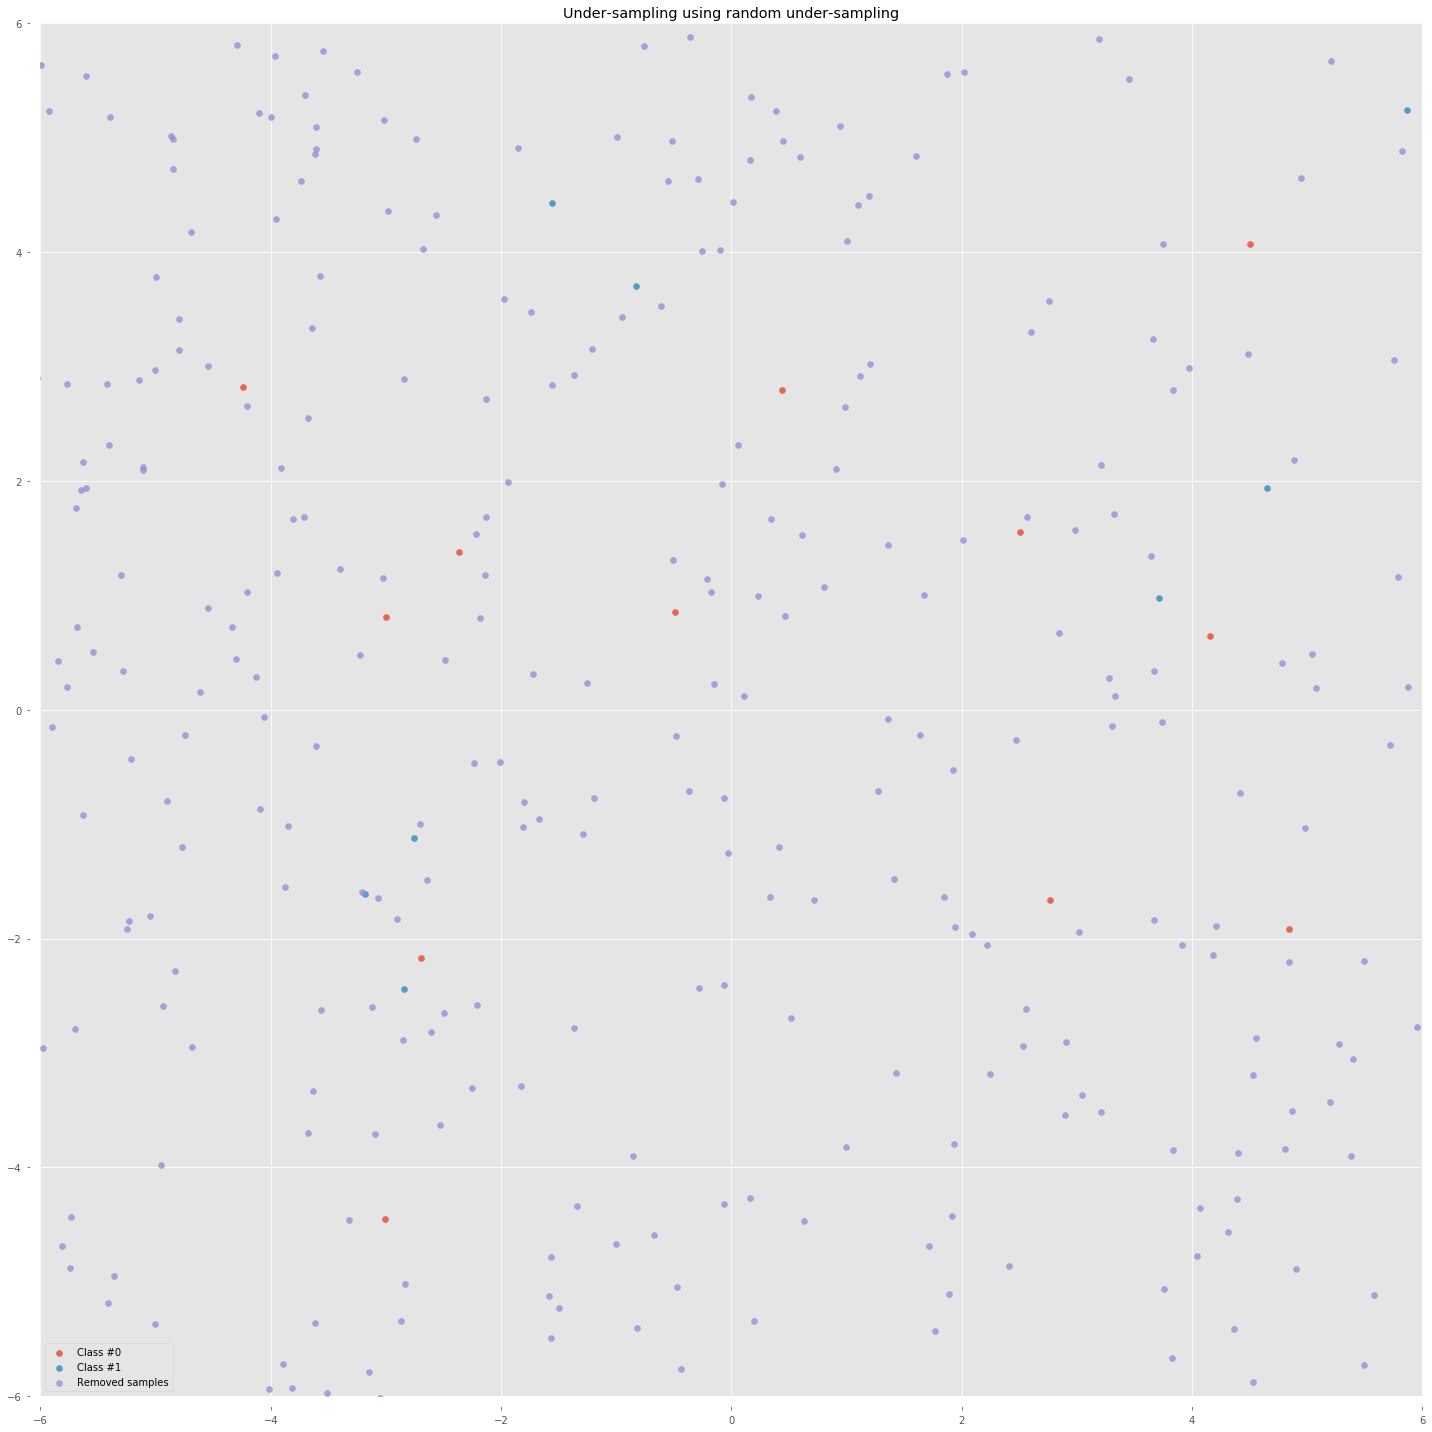

In [16]:
X = df.loc[:,(df.columns != 'current_state') & (df.columns != 'id')]
y = df['current_state']

pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()

Promptpay accounts are 50.0% out of 674 observations


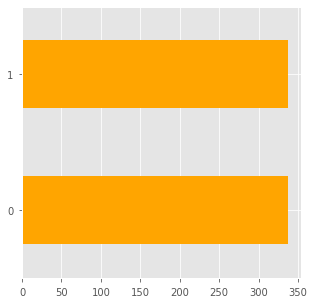

In [17]:
X_resampled_randus_array = np.array(X_resampled)
y_resampled_randus_array = np.array(y_resampled)

fig = plt.figure()
fig.set_size_inches(5,5)
d_randus = pd.Series([y_resampled_randus_array[y_resampled_randus_array==0].shape[0], \
                     y_resampled_randus_array[y_resampled_randus_array==1].shape[0]])
print("Promptpay accounts are {}% out of {} observations".format(100* d_randus[1]/(d_randus[1]+d_randus[0]), \
                                                                 d_randus[1]+d_randus[0]))
p_randus = d_randus.plot(kind='barh', color='orange')

#### Balancing Method #3 Cluster Centroids Resample

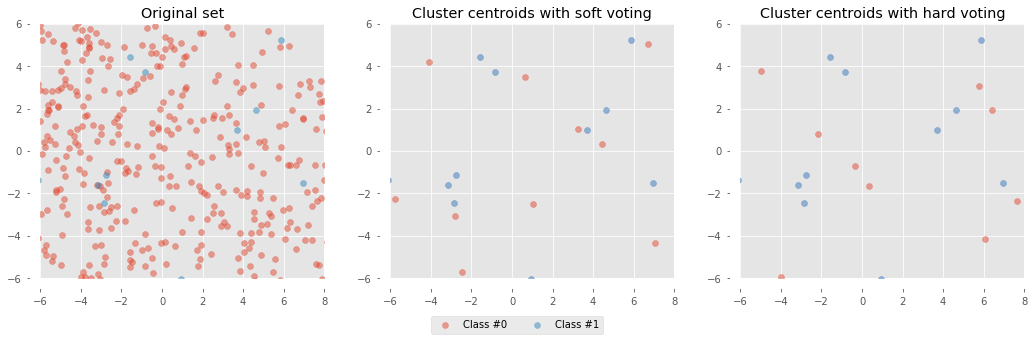

In [18]:
# Generate the dataset
X = df.loc[:,(df.columns != 'current_state') & (df.columns != 'id')]
y = df['current_state']

pca = PCA(n_components=2)

X_vis = pca.fit_transform(X)

cc = ClusterCentroids()
X_resampled, y_resampled = cc.fit_sample(X, y)
X_res_vis_soft = pca.transform(X_resampled)

cc = ClusterCentroids(voting='hard')
X_resampled, y_resampled = cc.fit_sample(X, y)
X_res_vis_hard = pca.transform(X_resampled)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis_soft[y_resampled == 0, 0],
            X_res_vis_soft[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis_soft[y_resampled == 1, 0],
            X_res_vis_soft[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
c2 = ax2.scatter(X_vis[y == 1, 0],
                 X_vis[y == 1, 1], label="Original #1",
                 alpha=0.2)
ax2.set_title('Cluster centroids with soft voting')

ax3.scatter(X_res_vis_hard[y_resampled == 0, 0],
            X_res_vis_hard[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax3.scatter(X_res_vis_hard[y_resampled == 1, 0],
            X_res_vis_hard[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax3.scatter(X_vis[y == 1, 0],
            X_vis[y == 1, 1],
            alpha=0.2)
ax3.set_title('Cluster centroids with hard voting')

# make nice plotting
for ax in (ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1', 'Original Class #1'),
              loc='lower center',
              ncol=3, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

Promptpay accounts are 50.0% out of 674 observations


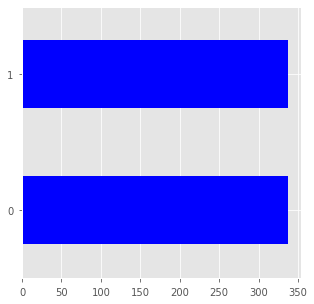

In [19]:
X_resampled_centroids_array = np.array(X_resampled)
y_resampled_centroids_array = np.array(y_resampled)

fig = plt.figure()
fig.set_size_inches(5,5)
d_centroids = pd.Series([y_resampled_centroids_array[y_resampled_centroids_array==0].shape[0], \
                     y_resampled_centroids_array[y_resampled_centroids_array==1].shape[0]])
print("Promptpay accounts are {}% out of {} observations".format(100* d_centroids[1]/(d_centroids[1]+d_centroids[0]), \
                                                                 d_centroids[1]+d_centroids[0]))
p_centroids = d_centroids.plot(kind='barh', color='blue')

### Feature Normalization

#### SMOTE Method

In [20]:
scaled_smote_features = preprocessing.MinMaxScaler()
scaled_smote_features.fit(X_resampled_smote_array)
X_smote_prep = scaled_smote_features.transform(X_resampled_smote_array)

#### Random Undersampling Method

In [21]:
scaled_randus_features = preprocessing.MinMaxScaler()
scaled_randus_features.fit(X_resampled_randus_array)
X_randus_prep = scaled_randus_features.transform(X_resampled_randus_array)

In [22]:
scaled_centroids_features = preprocessing.MinMaxScaler()
scaled_centroids_features.fit(X_resampled_centroids_array)
X_centroids_prep = scaled_centroids_features.transform(X_resampled_centroids_array)

#### Non-sampling Dataset

In [23]:
scaled_non_sampling_features = preprocessing.MinMaxScaler()
scaled_non_sampling_features.fit(non_sampling_X)
X_non_sampling_prep = scaled_non_sampling_features.transform(non_sampling_X)

In [24]:
#Test Dataset
scaled_testset = preprocessing.MinMaxScaler()
scaled_testset.fit(testset_X)
X_testset_prep = scaled_testset.transform(testset_X)

### Feature Selection

### Relief-F Feature Selection

#### Method 1: ReliefF (SMOTE dataset)

In [25]:
fs_smote = ReliefF(n_jobs=-1,verbose=True)
fs_smote.fit(X_smote_prep, y_resampled_smote_array)

Created distance array in 10.946660280227661 seconds.
Feature scoring under way ...
Completed scoring in 331.86156487464905 seconds.


ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=-1,
        n_neighbors=100, verbose=True)

In [26]:
selected_smote_features = {}
for feature_name, feature_score in zip(df.drop('current_state', axis=1).columns,
                                       fs_smote.feature_importances_):
    selected_smote_features[feature_name] = feature_score

df_smote_features = pd.DataFrame(list(selected_smote_features.items()),columns=['Features','Score'])
df_sorted_smote_features = df_smote_features.sort_values(by=['Score'],ascending=False)
new_selected_smote_features = df_sorted_smote_features[df_sorted_smote_features['Score']>=0].index
print(df_sorted_smote_features)
print("The new selected features which have a positive score: ",new_selected_smote_features.shape[0])

                        Features     Score
0                         gender  0.038609
3             transaction_on_tue  0.020614
12   num_time_category_afternoon  0.018344
21     transaction_amt_2000_2999  0.017899
4             transaction_on_wed  0.017457
23     transaction_amt_4000_4999  0.013155
5             transaction_on_thu  0.012000
18         transaction_of_week_5  0.011593
2             transaction_on_mon  0.011398
19         transaction_amt_0_999  0.010382
20     transaction_amt_1000_1999  0.008843
93     transaction_fee_amt_30_59  0.008681
22     transaction_amt_3000_3999  0.008606
25     transaction_amt_6000_6999  0.008271
16         transaction_of_week_3  0.008109
31   transaction_amt_12000_12999  0.008103
14         transaction_of_week_1  0.007608
7             transaction_on_sat  0.007239
39   transaction_amt_20000_20999  0.006901
11     num_time_category_morning  0.006588
6             transaction_on_fri  0.006377
24     transaction_amt_5000_5999  0.006353
27     tran

In [27]:
file_name = 'ReliefF (SMOTE dataset) features.csv'
df_sorted_smote_features.to_csv(file_name, sep='\t', encoding='utf-8')

#### Method 2: ReliefF (Random US dataset)

In [36]:
fs_randus = ReliefF(n_jobs=-1,verbose=True)
fs_randus.fit(X_randus_prep, y_resampled_randus_array)

Created distance array in 0.015163898468017578 seconds.
Feature scoring under way ...
Completed scoring in 2.80422306060791 seconds.


ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=-1,
        n_neighbors=100, verbose=True)

In [37]:
selected_randus_features = {}
for feature_name, feature_score in zip(df.drop('current_state', axis=1).columns,
                                       fs_randus.feature_importances_):
    selected_randus_features[feature_name] = feature_score

df_randus_features = pd.DataFrame(list(selected_randus_features.items()),columns=['Features','Score'])
df_sorted_randus_features = df_randus_features.sort_values(by=['Score'],ascending=False)
new_selected_randus_features = df_sorted_randus_features[df_sorted_randus_features['Score']>=0].index
print(df_sorted_randus_features)
print("The new selected features which have a positive score: ",new_selected_randus_features.shape[0])

                        Features     Score
19         transaction_amt_0_999  0.003277
6             transaction_on_fri  0.003099
3             transaction_on_tue  0.002938
25     transaction_amt_6000_6999  0.002122
0                         gender  0.001914
18         transaction_of_week_5  0.001804
17         transaction_of_week_4  0.001572
11     num_time_category_morning  0.001366
1                            age  0.001315
24     transaction_amt_5000_5999  0.001111
96              num_acc_tranfers  0.000963
20     transaction_amt_1000_1999  0.000936
10  num_of_day_type_business_day  0.000864
9        num_of_day_type_weekend  0.000735
16         transaction_of_week_3  0.000685
4             transaction_on_wed  0.000633
69   transaction_amt_50000_50999  0.000607
98                num_iconfirm_n  0.000538
21     transaction_amt_2000_2999  0.000456
93     transaction_fee_amt_30_59  0.000412
43   transaction_amt_24000_24999  0.000326
97                num_iconfirm_y  0.000310
39   transa

In [38]:
file_name = 'ReliefF (Random US dataset) features.csv'
df_sorted_randus_features.to_csv(file_name, sep='\t', encoding='utf-8')

#### Method 3: ReliefF (Centroids dataset)

In [39]:
fs_centroids = ReliefF(n_jobs=-1,verbose=True)
fs_centroids.fit(X_centroids_prep, y_resampled_centroids_array)

Created distance array in 0.0243380069732666 seconds.
Feature scoring under way ...
Completed scoring in 2.3884389400482178 seconds.


ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=-1,
        n_neighbors=100, verbose=True)

In [41]:
selected_centroids_features = {}
for feature_name, feature_score in zip(df.drop('current_state', axis=1).columns,
                                       fs_centroids.feature_importances_):
    selected_centroids_features[feature_name] = feature_score

df_centroids_features = pd.DataFrame(list(selected_centroids_features.items()),columns=['Features','Score'])
df_sorted_centroids_features = df_centroids_features.sort_values(by=['Score'],ascending=False)
new_selected_centroids_features = df_sorted_centroids_features[df_sorted_centroids_features['Score']>=0].index
print(df_sorted_centroids_features)
print("The new selected features which have a positive score: ",new_selected_centroids_features.shape[0])

                        Features     Score
1                            age  0.049551
11     num_time_category_morning  0.034583
12   num_time_category_afternoon  0.034417
3             transaction_on_tue  0.032437
10  num_of_day_type_business_day  0.024020
4             transaction_on_wed  0.023164
97                num_iconfirm_y  0.022720
96              num_acc_tranfers  0.022153
14         transaction_of_week_1  0.021262
15         transaction_of_week_2  0.019865
5             transaction_on_thu  0.019578
16         transaction_of_week_3  0.019556
17         transaction_of_week_4  0.019440
2             transaction_on_mon  0.019397
98                num_iconfirm_n  0.018236
9        num_of_day_type_weekend  0.018170
93     transaction_fee_amt_30_59  0.015968
20     transaction_amt_1000_1999  0.014121
92      transaction_fee_amt_0_29  0.013850
8             transaction_on_sun  0.013021
6             transaction_on_fri  0.012344
7             transaction_on_sat  0.012314
18         

In [42]:
file_name = 'ReliefF (Centroids dataset) features.csv'
df_sorted_centroids_features.to_csv(file_name, sep='\t', encoding='utf-8')

#### ReliefF (Non-sampling dataset)

In [43]:
fs_non_sampling = ReliefF(n_jobs=-1,verbose=True)
fs_non_sampling.fit(X_non_sampling_prep, non_sampling_y)

Created distance array in 3.0981738567352295 seconds.
Feature scoring under way ...
Completed scoring in 652.8994059562683 seconds.


ReliefF(discrete_threshold=10, n_features_to_select=10, n_jobs=-1,
        n_neighbors=100, verbose=True)

In [44]:
selected_non_sampling_features = {}
for feature_name, feature_score in zip(df.drop('current_state', axis=1).columns,
                                       fs_non_sampling.feature_importances_):
    selected_non_sampling_features[feature_name] = feature_score

df_non_sampling_features = pd.DataFrame(list(selected_non_sampling_features.items()),columns=['Features','Score'])
df_sorted_non_sampling_features = df_non_sampling_features.sort_values(by=['Score'],ascending=False)
new_selected_non_sampling_features = df_sorted_non_sampling_features[df_sorted_non_sampling_features['Score']>=0].index
print(df_sorted_non_sampling_features)
print("The new selected features which have a positive score: ",new_selected_non_sampling_features.shape[0])

                        Features     Score
0                         gender  0.236364
1                            age  0.077593
21     transaction_amt_2000_2999  0.027797
20     transaction_amt_1000_1999  0.027786
12   num_time_category_afternoon  0.024688
3             transaction_on_tue  0.022040
10  num_of_day_type_business_day  0.021852
17         transaction_of_week_4  0.021668
96              num_acc_tranfers  0.021432
11     num_time_category_morning  0.020229
18         transaction_of_week_5  0.019842
97                num_iconfirm_y  0.019835
92      transaction_fee_amt_0_29  0.019784
25     transaction_amt_6000_6999  0.019587
4             transaction_on_wed  0.019120
39   transaction_amt_20000_20999  0.019027
23     transaction_amt_4000_4999  0.017822
8             transaction_on_sun  0.017143
16         transaction_of_week_3  0.017098
22     transaction_amt_3000_3999  0.016600
98                num_iconfirm_n  0.016442
5             transaction_on_thu  0.015885
9        nu

In [45]:
file_name = 'ReliefF (Non-sampling dataset) features.csv'
df_sorted_non_sampling_features.to_csv(file_name, sep='\t', encoding='utf-8')

### Chi-Square Feature Selection

#### Method 1: Chi-Square (SMOTE dataset)

In [46]:
X_smote_chi = SelectKBest(chi2, k=50).fit_transform(X_smote_prep, y_resampled_smote_array)

#### Method 2: Chi-Square (Random US dataset)

In [47]:
X_randus_chi = SelectKBest(chi2, k=50).fit_transform(X_randus_prep, y_resampled_randus_array)

#### Method 3: Chi-Square (Centroids dataset)

In [48]:
X_centroids_chi = SelectKBest(chi2, k=50).fit_transform(X_centroids_prep, y_resampled_centroids_array)

#### Chi-Square (Non-sampling dataset)

In [49]:
X_non_sampling_chi = SelectKBest(chi2, k=50).fit_transform(X_non_sampling_prep, non_sampling_y)

#### From variables to train, test matrices

In [50]:
#SMOTE-ReliefF
X_smote_prep_ReliefF = X_smote_prep[:,new_selected_smote_features]
y_smote_ReliefF = y_resampled_smote_array
print(X_smote_prep_ReliefF.shape,y_smote_ReliefF.shape)

(16766, 57) (16766,)


In [51]:
#Testset with SMOTE-ReliefF Model
X_testset_smote_prep_ReliefF = X_testset_prep[:,new_selected_smote_features]
y_testset_smote_ReliefF = testset_y
print(X_testset_smote_prep_ReliefF.shape,y_testset_smote_ReliefF.shape)

(7889, 57) (7889,)


In [52]:
#Random US-ReliefF
X_randus_prep_ReliefF = X_randus_prep[:,new_selected_randus_features]
y_randus_ReliefF = y_resampled_randus_array
print(X_randus_prep_ReliefF.shape,y_randus_ReliefF.shape)

(674, 57) (674,)


In [53]:
#Centroids-ReliefF
X_centroids_prep_ReliefF = X_centroids_prep[:,new_selected_centroids_features]
y_centroids_ReliefF = y_resampled_centroids_array
print(X_centroids_prep_ReliefF.shape,y_centroids_ReliefF.shape)

(674, 54) (674,)


In [54]:
#Testset with Centroids-ReliefF Model
X_testset_centroids_prep_ReliefF = X_testset_prep[:,new_selected_centroids_features]
y_testset_centroids_ReliefF = testset_y
print(X_testset_centroids_prep_ReliefF.shape,y_testset_centroids_ReliefF.shape)

(7889, 54) (7889,)


In [55]:
#Non-sampling-ReliefF
X_non_sampling_prep_ReliefF = X_non_sampling_prep[:,new_selected_non_sampling_features]
y_non_sampling_ReliefF = non_sampling_y
print(X_non_sampling_prep_ReliefF.shape,y_non_sampling_ReliefF.shape)

(8720, 58) (8720,)


In [56]:
#SMOTE-Chi
X_smote_prep_chi = X_smote_chi
y_smote_chi = y_resampled_smote_array
print(X_smote_prep_chi.shape,y_smote_chi.shape)

(16766, 50) (16766,)


In [57]:
#Random US-Chi
X_randus_prep_chi = X_randus_chi
y_randus_chi = y_resampled_randus_array
print(X_randus_prep_chi.shape,y_randus_chi.shape)

(674, 50) (674,)


In [58]:
#Centroids-Chi
X_centroids_prep_chi = X_centroids_chi
y_centroids_chi = y_resampled_centroids_array
print(X_centroids_prep_chi.shape,y_centroids_chi.shape)

(674, 50) (674,)


In [59]:
#Non-sampling-Chi
X_non_sampling_prep_chi = X_non_sampling_chi
y_non_sampling_chi = non_sampling_y
print(X_non_sampling_prep_chi.shape,y_non_sampling_chi.shape)

(8720, 50) (8720,)


#### Visualization: Confusion matrices and AUC curves

In [60]:
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

#### Model selection and validation

In this case, we use only a single dataset. So, we have to split the dataset into 2 sub-groups.
The 2 sub-groups consist of 80% for training and 20% for testing. And the samples are picked randomly.

In [61]:
#SMOTE-ReliefF

X_smote_train_ReliefF, X_smote_test_ReliefF, y_smote_train_ReliefF, y_smote_test_ReliefF = train_test_split(X_smote_prep_ReliefF, y_smote_ReliefF, test_size=0.2, random_state=42)

In [62]:
#Using SMOTE-ReliefF with testing dataset
X_smote_train_ReliefF = X_smote_prep_ReliefF
X_smote_test_ReliefF = X_testset_smote_prep_ReliefF
y_smote_train_ReliefF = y_smote_ReliefF
y_smote_test_ReliefF = testset_y

In [63]:
#Random US-ReliefF

X_randus_train_ReliefF, X_randus_test_ReliefF, y_randus_train_ReliefF, y_randus_test_ReliefF = train_test_split(X_randus_prep_ReliefF, y_randus_ReliefF, test_size=0.2, random_state=42)

In [64]:
#Centroids-ReliefF

X_centroids_train_ReliefF, X_centroids_test_ReliefF, y_centroids_train_ReliefF, y_centroids_test_ReliefF = train_test_split(X_centroids_prep_ReliefF, y_centroids_ReliefF, test_size=0.2, random_state=42)

In [65]:
#Using Centroids-ReliefF with testing dataset
X_centroids_train_ReliefF = X_centroids_prep_ReliefF
X_centroids_test_ReliefF = X_testset_centroids_prep_ReliefF
y_centroids_train_ReliefF = y_centroids_ReliefF
y_centroids_test_ReliefF = testset_y

In [66]:
#Non-sampling-ReliefF

X_non_sampling_train_ReliefF, X_non_sampling_test_ReliefF, y_non_sampling_train_ReliefF, y_non_sampling_test_ReliefF = train_test_split(X_non_sampling_prep_ReliefF, y_non_sampling_ReliefF, test_size=0.2, random_state=42)

In [67]:
#SMOTE-Chi
X_smote_train_chi, X_smote_test_chi, y_smote_train_chi, y_smote_test_chi = train_test_split(X_smote_prep_chi, y_smote_chi, test_size=0.2, random_state=42)

In [68]:
#Random US-Chi
X_randus_train_chi, X_randus_test_chi, y_randus_train_chi, y_randus_test_chi = train_test_split(X_randus_prep_chi, y_randus_chi, test_size=0.2, random_state=42)

In [69]:
#Non-sampling-Chi
X_non_sampling_train_chi, X_non_sampling_test_chi, y_non_sampling_train_chi, y_non_sampling_test_chi = train_test_split(X_non_sampling_prep_chi, y_non_sampling_chi, test_size=0.2, random_state=42)

### Models

#### Random Forest 

In [70]:
#SMOTE-ReliefF

rf_smote_ReliefF = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_smote_ReliefF.fit(X_smote_train_ReliefF,y_smote_train_ReliefF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
#Random US-ReliefF

rf_randus_ReliefF = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_randus_ReliefF.fit(X_randus_train_ReliefF,y_randus_train_ReliefF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
#Centroids-ReliefF

rf_centroids_ReliefF = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_centroids_ReliefF.fit(X_centroids_train_ReliefF,y_centroids_train_ReliefF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
#Non-sampling-ReliefF

rf_non_sampling_ReliefF = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_non_sampling_ReliefF.fit(X_non_sampling_train_ReliefF,y_non_sampling_train_ReliefF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
#SMOTE-Chi

rf_smote_chi = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_smote_chi.fit(X_smote_train_chi,y_smote_train_chi)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
#Random US-Chi

rf_randus_chi = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_randus_chi.fit(X_randus_train_chi,y_randus_train_chi)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
#Non-sampling-Chi

rf_non_sampling_chi = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf_non_sampling_chi.fit(X_non_sampling_train_chi,y_non_sampling_train_chi)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

            ID  Probability Score
4702  9799A781           0.912621
2449  4AA0F801           0.895216
6460  D0FD0FB2           0.873206
449   07ACB2A5           0.866955
5397  AD95CC95           0.836322
1935  393107EC           0.806654
5339  ABA509B0           0.797433
7507  F3957203           0.796474
2130  405BE1FE           0.781283
4202  85F1F96C           0.768059
4964  9FE685EB           0.754497
1403  270AD29F           0.742409
1561  2BEA3DF9           0.734511
5252  A933935A           0.732188
657   0E7081BA           0.725927
4498  904D0F51           0.725899
5978  BFF6B8EB           0.725066
3634  71F7DF27           0.725024
2641  50CCEBDA           0.714830
4123  82F40EE1           0.713194
6005  C0D7C4D5           0.706302
2946  5B097EC9           0.705488
6269  C9E55849           0.679167
1552  2B795841           0.673034
678   0F28FFB4           0.671813
247   01033EC0           0.667332
291   0294A4AE           0.664358
4399  8CE05080           0.661678
6131  C5227A7A

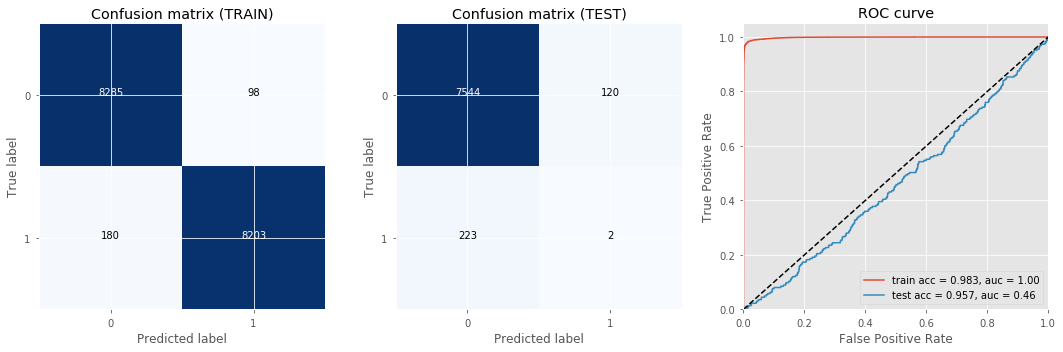

Sensitivity (Recall or True positive rate):  0.01639344262295082
Precision (Positive predictive value):  0.008888888888888889
Specificity (True negative rate):  0.9712887858890177
False positive rate (FPR):  0.02871121411098236
F-measure or balanced F-score (F1 score):  0.011527377521613834


In [78]:
#SMOTE-ReliefF

threshold = 0.5
y_smote_train_pred_ReliefF = rf_smote_ReliefF.predict_proba(X_smote_train_ReliefF)[:,1]
y_smote_test_pred_ReliefF = rf_smote_ReliefF.predict_proba(X_smote_test_ReliefF)[:,1]

testset_result = np.column_stack((y_smote_test_ReliefF,y_smote_test_pred_ReliefF))
testset_FN = testset_result[(y_smote_test_ReliefF==0) & (y_smote_test_pred_ReliefF>=0.5)]
testset_TN = testset_result[(y_smote_test_ReliefF==0) & (y_smote_test_pred_ReliefF<0.5)]
testset_FP = testset_result[(y_smote_test_ReliefF==1) & (y_smote_test_pred_ReliefF<0.5)]
testset_TP = testset_result[(y_smote_test_ReliefF==1) & (y_smote_test_pred_ReliefF>=0.5)]

prob_ranking = pd.DataFrame(y_smote_test_pred_ReliefF,columns=['Probability Score']).sort_values(by=['Probability Score'],ascending=False)

#Get top 500 Accounts
top500_accounts = pd.concat([df_test_id.loc[prob_ranking.index[0:500],'ID'], prob_ranking[0:500]], axis=1)
print(top500_accounts)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

#Test scores
testset_recall = testset_TP.shape[0]/(testset_TP.shape[0]+testset_FN.shape[0])
testset_precision = testset_TP.shape[0]/(testset_TP.shape[0]+testset_FP.shape[0])
testset_specificity = testset_TN.shape[0]/(testset_TN.shape[0]+testset_FP.shape[0])
testset_fpr = testset_FP.shape[0]/(testset_TN.shape[0]+testset_FP.shape[0])
testset_f1score = (2*testset_precision*testset_recall)/(testset_precision+testset_recall)

plot_cm(ax[0],  y_smote_train_ReliefF, y_smote_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_smote_test_ReliefF, y_smote_test_pred_ReliefF,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_smote_train_ReliefF, y_smote_train_pred_ReliefF, y_smote_test_ReliefF, y_smote_test_pred_ReliefF, threshold)
print("SMOTE Borderline Type 2 -> Relief F Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

print("Sensitivity (Recall or True positive rate): ", testset_recall)
print("Precision (Positive predictive value): ", testset_precision)
print("Specificity (True negative rate): ", testset_specificity)
print("False positive rate (FPR): ", testset_fpr)
print("F-measure or balanced F-score (F1 score): ", testset_f1score)

In [79]:
file_name = 'SMOTE-ReliefF-RandomForest.csv'
top500_accounts.to_csv(file_name, sep='\t', encoding='utf-8')

Random Undersampling -> Relief F Feature Selection -> Random Forest


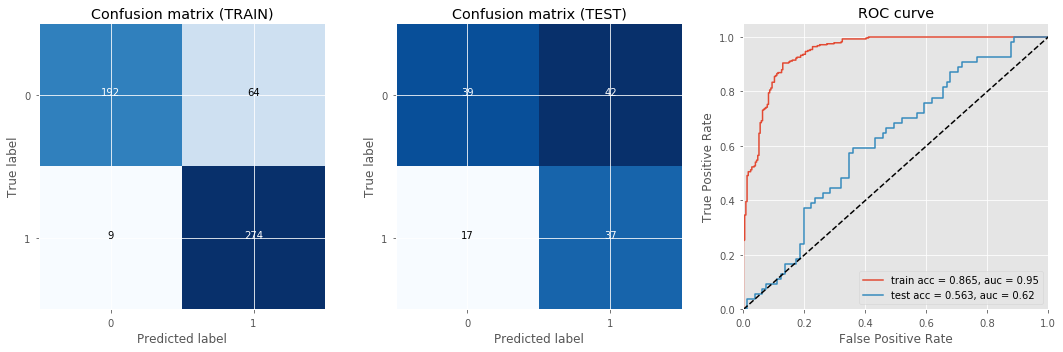

In [80]:
#Random US-ReliefF

threshold = 0.5
y_randus_train_pred_ReliefF = rf_randus_ReliefF.predict_proba(X_randus_train_ReliefF)[:,1]
y_randus_test_pred_ReliefF = rf_randus_ReliefF.predict_proba(X_randus_test_ReliefF)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_randus_train_ReliefF, y_randus_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_randus_test_ReliefF, y_randus_test_pred_ReliefF,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_randus_train_ReliefF, y_randus_train_pred_ReliefF, y_randus_test_ReliefF, y_randus_test_pred_ReliefF, threshold)
print("Random Undersampling -> Relief F Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

            ID  Probability Score
3017  5D160745           0.985161
734   109DACBE           0.983761
5460  AF8274D6           0.983102
5258  A9569B3F           0.982213
4297  8990CE19           0.981994
3660  730E1749           0.981125
1185  1F8DD65A           0.978387
5765  B939987B           0.976951
518   0A062955           0.975957
3749  7636FA2B           0.975849
6692  D88D7556           0.975843
3860  7A5E6846           0.975767
4646  95807CFB           0.975766
3470  6C4FA8BB           0.974917
5824  BB1D66F2           0.974855
6629  D64E72CD           0.974669
3061  5E0A544C           0.974123
3349  67B7ABE1           0.973542
1035  1AE8DA57           0.973535
2718  534FC79F           0.973341
2469  4B46BE20           0.973209
6211  C814F5ED           0.973169
6445  D086A6C4           0.972856
5186  A7307FE3           0.972753
5216  A811D408           0.972753
182   99031532           0.972707
6013  C112E393           0.972674
4489  8FFBABD8           0.972262
2418  49C13B1A

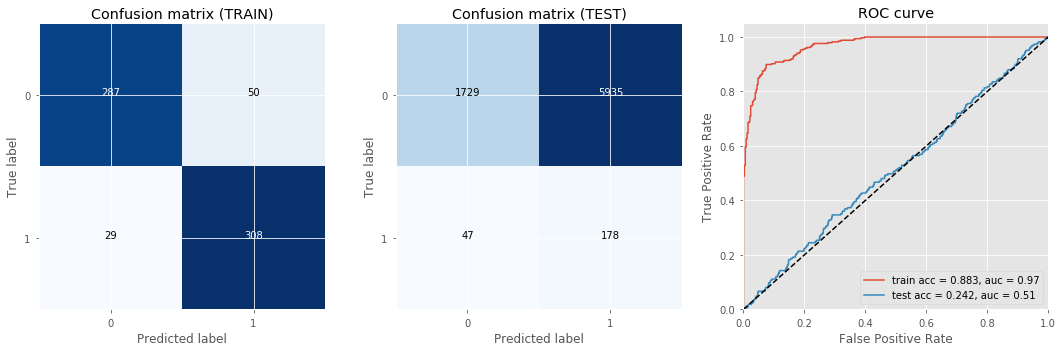

Sensitivity (Recall or True positive rate):  0.029118272533944053
Precision (Positive predictive value):  0.7911111111111111
Specificity (True negative rate):  0.973536036036036
False positive rate (FPR):  0.026463963963963964
F-measure or balanced F-score (F1 score):  0.05616913852950457
(7889,)


In [85]:
#Centroids-ReliefF

threshold = 0.5
y_centroids_train_pred_ReliefF = rf_centroids_ReliefF.predict_proba(X_centroids_train_ReliefF)[:,1]
y_centroids_test_pred_ReliefF = rf_centroids_ReliefF.predict_proba(X_centroids_test_ReliefF)[:,1]

testset_result = np.column_stack((y_centroids_test_ReliefF,y_centroids_test_pred_ReliefF))
testset_FN = testset_result[(y_centroids_test_ReliefF==0) & (y_centroids_test_pred_ReliefF>=0.5)]
testset_TN = testset_result[(y_centroids_test_ReliefF==0) & (y_centroids_test_pred_ReliefF<0.5)]
testset_FP = testset_result[(y_centroids_test_ReliefF==1) & (y_centroids_test_pred_ReliefF<0.5)]
testset_TP = testset_result[(y_centroids_test_ReliefF==1) & (y_centroids_test_pred_ReliefF>=0.5)]

prob_ranking = pd.DataFrame(y_centroids_test_pred_ReliefF,columns=['Probability Score']).sort_values(by=['Probability Score'],ascending=False)

#Get top 500 Accounts
top500_accounts = pd.concat([df_test_id.loc[prob_ranking.index[0:500],'ID'], prob_ranking[0:500]], axis=1)
print(top500_accounts)
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

all_accounts = pd.DataFrame(y_centroids_test_pred_ReliefF)

#Test scores
testset_recall = testset_TP.shape[0]/(testset_TP.shape[0]+testset_FN.shape[0])
testset_precision = testset_TP.shape[0]/(testset_TP.shape[0]+testset_FP.shape[0])
testset_specificity = testset_TN.shape[0]/(testset_TN.shape[0]+testset_FP.shape[0])
testset_fpr = testset_FP.shape[0]/(testset_TN.shape[0]+testset_FP.shape[0])
testset_f1score = (2*testset_precision*testset_recall)/(testset_precision+testset_recall)

plot_cm(ax[0],  y_centroids_train_ReliefF, y_centroids_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_centroids_test_ReliefF, y_centroids_test_pred_ReliefF,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_centroids_train_ReliefF, y_centroids_train_pred_ReliefF, y_centroids_test_ReliefF, y_centroids_test_pred_ReliefF, threshold)
print("Centroids Undersampling -> Relief F Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

print("Sensitivity (Recall or True positive rate): ", testset_recall)
print("Precision (Positive predictive value): ", testset_precision)
print("Specificity (True negative rate): ", testset_specificity)
print("False positive rate (FPR): ", testset_fpr)
print("F-measure or balanced F-score (F1 score): ", testset_f1score)
print(y_centroids_test_pred_ReliefF.shape)

In [86]:
file_name = 'Centroids-ReliefF-RandomForest.csv'
top500_accounts.to_csv(file_name, sep='\t', encoding='utf-8')

In [87]:
file_name = 'Centroids-ReliefF-RandomForest-All.csv'
all_accounts.to_csv(file_name, sep='\t', encoding='utf-8')

Non-sampling Dataset -> Relief F Feature Selection -> Random Forest


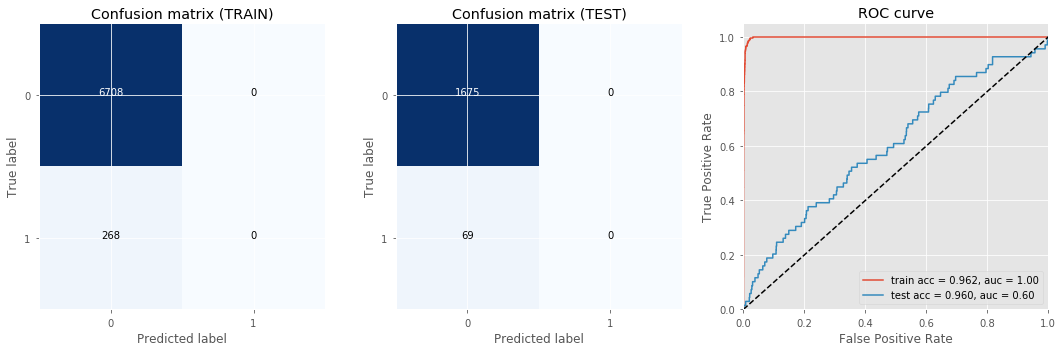

In [88]:
#Non-sampling-ReliefF

threshold = 0.5
y_non_sampling_train_pred_ReliefF = rf_non_sampling_ReliefF.predict_proba(X_non_sampling_train_ReliefF)[:,1]
y_non_sampling_test_pred_ReliefF = rf_non_sampling_ReliefF.predict_proba(X_non_sampling_test_ReliefF)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_non_sampling_train_ReliefF, y_non_sampling_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_non_sampling_test_ReliefF, y_non_sampling_test_pred_ReliefF,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_non_sampling_train_ReliefF, y_non_sampling_train_pred_ReliefF, y_non_sampling_test_ReliefF, y_non_sampling_test_pred_ReliefF, threshold)
print("Non-sampling Dataset -> Relief F Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

SMOTE Borderline Type 2 -> Chi-Square Feature Selection -> Random Forest


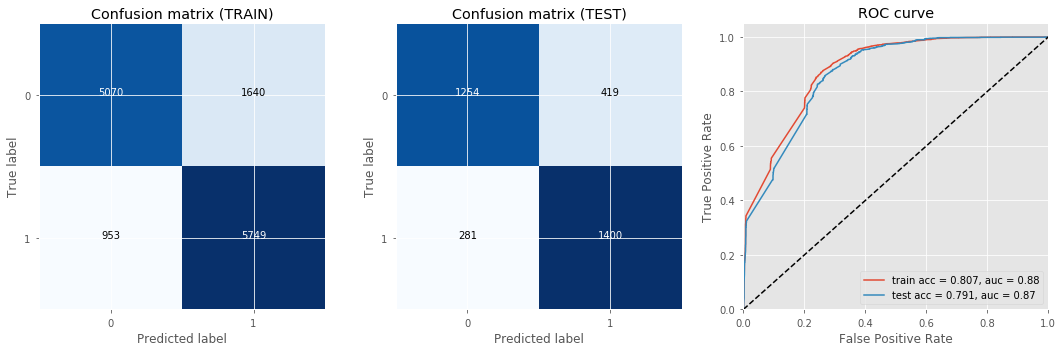

In [89]:
#SMOTE-Chi

threshold = 0.5
y_smote_train_pred_chi = rf_smote_chi.predict_proba(X_smote_train_chi)[:,1]
y_smote_test_pred_chi = rf_smote_chi.predict_proba(X_smote_test_chi)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_smote_train_chi, y_smote_train_pred_chi, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_smote_test_chi, y_smote_test_pred_chi,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_smote_train_chi, y_smote_train_pred_chi, y_smote_test_chi, y_smote_test_pred_chi, threshold)
print("SMOTE Borderline Type 2 -> Chi-Square Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

Random Undersampling -> Chi-Square Feature Selection -> Random Forest


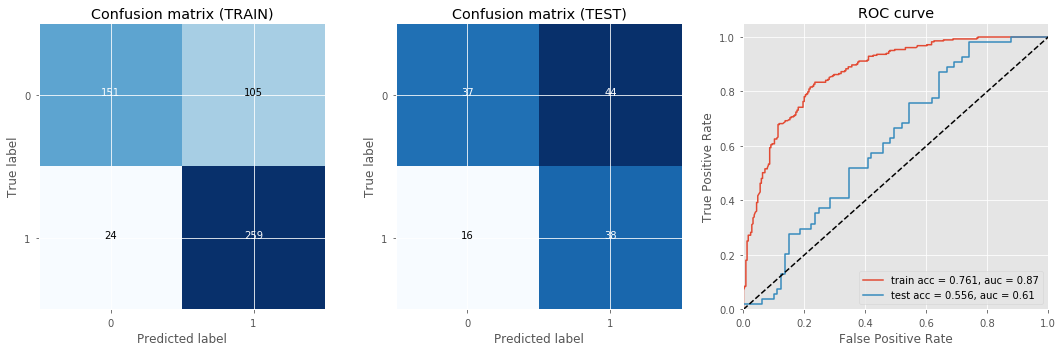

In [90]:
#Random US-Chi

threshold = 0.5
y_randus_train_pred_chi = rf_randus_chi.predict_proba(X_randus_train_chi)[:,1]
y_randus_test_pred_chi = rf_randus_chi.predict_proba(X_randus_test_chi)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_randus_train_chi, y_randus_train_pred_chi, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_randus_test_chi, y_randus_test_pred_chi,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_randus_train_chi, y_randus_train_pred_chi, y_randus_test_chi, y_randus_test_pred_chi, threshold)
print("Random Undersampling -> Chi-Square Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

Non-sampling Dataset -> Chi-Square Feature Selection -> Random Forest


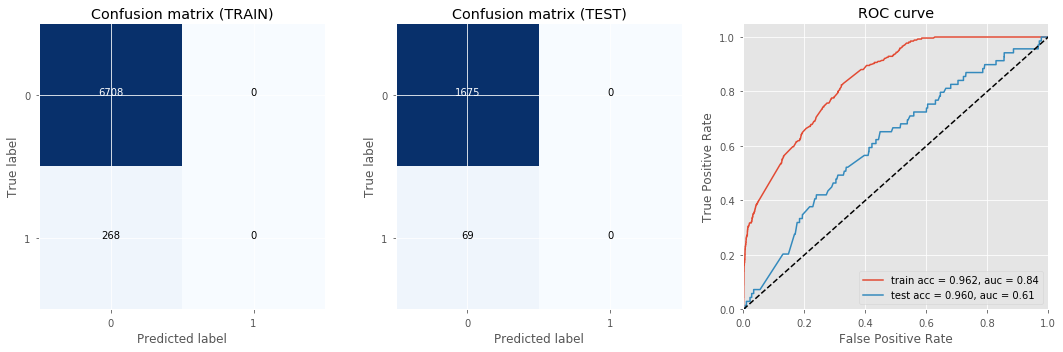

In [91]:
#Non-sampling-Chi

threshold = 0.5
y_non_sampling_train_pred_chi = rf_non_sampling_chi.predict_proba(X_non_sampling_train_chi)[:,1]
y_non_sampling_test_pred_chi = rf_non_sampling_chi.predict_proba(X_non_sampling_test_chi)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_non_sampling_train_chi, y_non_sampling_train_pred_chi, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_non_sampling_test_chi, y_non_sampling_test_pred_chi,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_non_sampling_train_chi, y_non_sampling_train_pred_chi, y_non_sampling_test_chi, y_non_sampling_test_pred_chi, threshold)
print("Non-sampling Dataset -> Chi-Square Feature Selection -> Random Forest")
plt.tight_layout()
plt.show()

#### Feed Forward Deep Neural Nets Classification

In [92]:
#SMOTE-ReliefF
input_dim_smote_ReliefF = X_smote_train_ReliefF.shape[1]

model_smote_ReliefF = Sequential()
model_smote_ReliefF.add(Dense(256, input_shape=(input_dim_smote_ReliefF,), activation='relu'))
model_smote_ReliefF.add(Dense(256, activation='relu'))
model_smote_ReliefF.add(Dense(64, activation='relu'))
model_smote_ReliefF.add(Dense(64, activation='relu'))
model_smote_ReliefF.add(Dense(10, activation='relu'))
model_smote_ReliefF.add(Dense(10, activation='sigmoid'))
model_smote_ReliefF.add(Dense(1,  activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [93]:
#Random US-ReliefF
input_dim_randus_ReliefF = X_randus_train_ReliefF.shape[1]

model_randus_ReliefF = Sequential()
model_randus_ReliefF.add(Dense(256, input_shape=(input_dim_randus_ReliefF,), activation='relu'))
model_randus_ReliefF.add(Dense(256, activation='relu'))
model_randus_ReliefF.add(Dense(64, activation='relu'))
model_randus_ReliefF.add(Dense(64, activation='relu'))
model_randus_ReliefF.add(Dense(10, activation='relu'))
model_randus_ReliefF.add(Dense(10, activation='sigmoid'))
model_randus_ReliefF.add(Dense(1,  activation='sigmoid'))

In [94]:
#Centroids-ReliefF
input_dim_centroids_ReliefF = X_centroids_train_ReliefF.shape[1]

model_centroids_ReliefF = Sequential()
model_centroids_ReliefF.add(Dense(256, input_shape=(input_dim_centroids_ReliefF,), activation='relu'))
model_centroids_ReliefF.add(Dense(256, activation='relu'))
model_centroids_ReliefF.add(Dense(64, activation='relu'))
model_centroids_ReliefF.add(Dense(64, activation='relu'))
model_centroids_ReliefF.add(Dense(10, activation='relu'))
model_centroids_ReliefF.add(Dense(10, activation='sigmoid'))
model_centroids_ReliefF.add(Dense(1,  activation='sigmoid'))

In [95]:
#Non-sampling-ReliefF
input_dim_non_sampling_ReliefF = X_non_sampling_train_ReliefF.shape[1]

model_non_sampling_ReliefF = Sequential()
model_non_sampling_ReliefF.add(Dense(256, input_shape=(input_dim_non_sampling_ReliefF,), activation='relu'))
model_non_sampling_ReliefF.add(Dense(256, activation='relu'))
model_non_sampling_ReliefF.add(Dense(64, activation='relu'))
model_non_sampling_ReliefF.add(Dense(64, activation='relu'))
model_non_sampling_ReliefF.add(Dense(10, activation='relu'))
model_non_sampling_ReliefF.add(Dense(10, activation='sigmoid'))
model_non_sampling_ReliefF.add(Dense(1,  activation='sigmoid'))

In [96]:
#SMOTE-Chi
input_dim_smote_chi = X_smote_train_chi.shape[1]

model_smote_chi = Sequential()
model_smote_chi.add(Dense(256, input_shape=(input_dim_smote_chi,), activation='relu'))
model_smote_chi.add(Dense(256, activation='relu'))
model_smote_chi.add(Dense(64, activation='relu'))
model_smote_chi.add(Dense(64, activation='relu'))
model_smote_chi.add(Dense(10, activation='relu'))
model_smote_chi.add(Dense(10, activation='sigmoid'))
model_smote_chi.add(Dense(1,  activation='sigmoid'))

In [97]:
#Random US-Chi
input_dim_randus_chi = X_randus_train_chi.shape[1]

model_randus_chi = Sequential()
model_randus_chi.add(Dense(256, input_shape=(input_dim_randus_chi,), activation='relu'))
model_randus_chi.add(Dense(256, activation='relu'))
model_randus_chi.add(Dense(64, activation='relu'))
model_randus_chi.add(Dense(64, activation='relu'))
model_randus_chi.add(Dense(10, activation='relu'))
model_randus_chi.add(Dense(10, activation='sigmoid'))
model_randus_chi.add(Dense(1,  activation='sigmoid'))

In [98]:
#Non-sampling-Chi
input_dim_non_sampling_chi = X_non_sampling_train_chi.shape[1]

model_non_sampling_chi = Sequential()
model_non_sampling_chi.add(Dense(256, input_shape=(input_dim_non_sampling_chi,), activation='relu'))
model_non_sampling_chi.add(Dense(256, activation='relu'))
model_non_sampling_chi.add(Dense(64, activation='relu'))
model_non_sampling_chi.add(Dense(64, activation='relu'))
model_non_sampling_chi.add(Dense(10, activation='relu'))
model_non_sampling_chi.add(Dense(10, activation='sigmoid'))
model_non_sampling_chi.add(Dense(1,  activation='sigmoid'))

In [99]:
#SMOTE-ReliefF
model_smote_ReliefF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
#Random US-ReliefF
model_randus_ReliefF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
#Centroids-ReliefF
model_centroids_ReliefF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
#Non-sampling-ReliefF
model_non_sampling_ReliefF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
#SMOTE-Chi
model_smote_chi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
#Random US-Chi
model_randus_chi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
#Non-sampling-Chi
model_non_sampling_chi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
#SMOTE-ReliefF

class BatchLogger_smote_ReliefF(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_smote_ReliefF = BatchLogger_smote_ReliefF()

In [107]:
#Random US-ReliefF

class BatchLogger_randus_ReliefF(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_randus_ReliefF = BatchLogger_randus_ReliefF()

In [108]:
#Centroids-ReliefF

class BatchLogger_centroids_ReliefF(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_centroids_ReliefF = BatchLogger_centroids_ReliefF()

In [109]:
#Non-sampling-ReliefF

class BatchLogger_non_sampling_ReliefF(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_non_sampling_ReliefF = BatchLogger_non_sampling_ReliefF()

In [110]:
#SMOTE-Chi

class BatchLogger_smote_chi(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_smote_chi = BatchLogger_smote_chi()

In [111]:
#Random US-Chi

class BatchLogger_randus_chi(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_randus_chi = BatchLogger_randus_chi()

In [112]:
#Non-sampling-Chi

class BatchLogger_non_sampling_chi(Callback):
    def on_train_begin(self, epoch, logs={}):
        self.log_values = {}
        for k in self.params['metrics']:
            self.log_values[k] = []

    def on_epoch_end(self, batch, logs={}):
        for k in self.params['metrics']:
            if k in logs:
                self.log_values[k].append(logs[k])
    
    def get_values(self, metric_name, window):
        d =  pd.Series(self.log_values[metric_name])
        return d.rolling(window,center=False).mean()

bl_non_sampling_chi = BatchLogger_non_sampling_chi()

In [113]:
#SMOTE-ReliefF
history_smote_ReliefF = model_smote_ReliefF.fit(
              np.array(X_smote_train_ReliefF), np.array(y_smote_train_ReliefF),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_smote_ReliefF],
              validation_data=(np.array(X_smote_test_ReliefF), np.array(y_smote_test_ReliefF)))

Instructions for updating:
Use tf.cast instead.
Train on 16766 samples, validate on 7889 samples
Epoch 1/1000
16766/16766 [==============================] - 3s 207us/step - loss: 0.6868 - acc: 0.5463 - val_loss: 0.7037 - val_acc: 0.4528
Epoch 2/1000
16766/16766 [==============================] - 1s 87us/step - loss: 0.6281 - acc: 0.6473 - val_loss: 0.5089 - val_acc: 0.7125
Epoch 3/1000
16766/16766 [==============================] - 1s 88us/step - loss: 0.5844 - acc: 0.6861 - val_loss: 0.5559 - val_acc: 0.6801
Epoch 4/1000
16766/16766 [==============================] - 1s 88us/step - loss: 0.5522 - acc: 0.7111 - val_loss: 0.5717 - val_acc: 0.6432
Epoch 5/1000
16766/16766 [==============================] - 1s 79us/step - loss: 0.5136 - acc: 0.7439 - val_loss: 0.4242 - val_acc: 0.8035
Epoch 6/1000
16766/16766 [==============================] - 1s 89us/step - loss: 0.4881 - acc: 0.7608 - val_loss: 0.4094 - val_acc: 0.8039
Epoch 7/1000
16766/16766 [==============================] - 2s 92us/

16766/16766 [==============================] - 2s 107us/step - loss: 0.1311 - acc: 0.9544 - val_loss: 0.1869 - val_acc: 0.9487
Epoch 58/1000
16766/16766 [==============================] - 2s 109us/step - loss: 0.1342 - acc: 0.9540 - val_loss: 0.1871 - val_acc: 0.9483
Epoch 59/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.1331 - acc: 0.9535 - val_loss: 0.2814 - val_acc: 0.9077
Epoch 60/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.1398 - acc: 0.9501 - val_loss: 0.2273 - val_acc: 0.9317
Epoch 61/1000
16766/16766 [==============================] - 1s 89us/step - loss: 0.1317 - acc: 0.9534 - val_loss: 0.1998 - val_acc: 0.9459
Epoch 62/1000
16766/16766 [==============================] - 2s 98us/step - loss: 0.1451 - acc: 0.9467 - val_loss: 0.1980 - val_acc: 0.9447
Epoch 63/1000
16766/16766 [==============================] - 2s 99us/step - loss: 0.1262 - acc: 0.9563 - val_loss: 0.2577 - val_acc: 0.9174
Epoch 64/1000
16766/16766 [===

16766/16766 [==============================] - 2s 98us/step - loss: 0.0876 - acc: 0.9719 - val_loss: 0.2845 - val_acc: 0.9162
Epoch 116/1000
16766/16766 [==============================] - 2s 98us/step - loss: 0.0921 - acc: 0.9701 - val_loss: 0.2142 - val_acc: 0.9452
Epoch 117/1000
16766/16766 [==============================] - 2s 98us/step - loss: 0.0859 - acc: 0.9721 - val_loss: 0.2049 - val_acc: 0.9513
Epoch 118/1000
16766/16766 [==============================] - 2s 97us/step - loss: 0.0939 - acc: 0.9694 - val_loss: 0.2001 - val_acc: 0.9509
Epoch 119/1000
16766/16766 [==============================] - 1s 88us/step - loss: 0.0902 - acc: 0.9691 - val_loss: 0.2105 - val_acc: 0.9482
Epoch 120/1000
16766/16766 [==============================] - 2s 98us/step - loss: 0.0881 - acc: 0.9718 - val_loss: 0.2601 - val_acc: 0.9322
Epoch 121/1000
16766/16766 [==============================] - 2s 97us/step - loss: 0.0852 - acc: 0.9720 - val_loss: 0.1845 - val_acc: 0.9587
Epoch 122/1000
16766/16766 [

Epoch 173/1000
16766/16766 [==============================] - 2s 97us/step - loss: 0.0665 - acc: 0.9794 - val_loss: 0.2538 - val_acc: 0.9418
Epoch 174/1000
16766/16766 [==============================] - 2s 107us/step - loss: 0.0705 - acc: 0.9770 - val_loss: 0.2774 - val_acc: 0.9321
Epoch 175/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0731 - acc: 0.9766 - val_loss: 0.2233 - val_acc: 0.9479
Epoch 176/1000
16766/16766 [==============================] - 2s 106us/step - loss: 0.0723 - acc: 0.9761 - val_loss: 0.2721 - val_acc: 0.9285
Epoch 177/1000
16766/16766 [==============================] - 2s 98us/step - loss: 0.0660 - acc: 0.9797 - val_loss: 0.2643 - val_acc: 0.9360
Epoch 178/1000
16766/16766 [==============================] - 2s 99us/step - loss: 0.0667 - acc: 0.9790 - val_loss: 0.2114 - val_acc: 0.9537
Epoch 179/1000
16766/16766 [==============================] - 2s 100us/step - loss: 0.0651 - acc: 0.9787 - val_loss: 0.2317 - val_acc: 0.9489
Epoch 180

Epoch 231/1000
16766/16766 [==============================] - 2s 102us/step - loss: 0.0616 - acc: 0.9796 - val_loss: 0.2246 - val_acc: 0.9509
Epoch 232/1000
16766/16766 [==============================] - 2s 102us/step - loss: 0.0586 - acc: 0.9798 - val_loss: 0.2445 - val_acc: 0.9446
Epoch 233/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.0537 - acc: 0.9829 - val_loss: 0.2429 - val_acc: 0.9487
Epoch 234/1000
16766/16766 [==============================] - 2s 102us/step - loss: 0.0503 - acc: 0.9849 - val_loss: 0.2423 - val_acc: 0.9494
Epoch 235/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.0561 - acc: 0.9828 - val_loss: 0.2418 - val_acc: 0.9461
Epoch 236/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.0521 - acc: 0.9841 - val_loss: 0.2379 - val_acc: 0.9503
Epoch 237/1000
16766/16766 [==============================] - 2s 104us/step - loss: 0.0536 - acc: 0.9826 - val_loss: 0.2129 - val_acc: 0.9565
Epoch 

Epoch 289/1000
16766/16766 [==============================] - 2s 91us/step - loss: 0.0412 - acc: 0.9867 - val_loss: 0.2964 - val_acc: 0.9370
Epoch 290/1000
16766/16766 [==============================] - 2s 95us/step - loss: 0.0372 - acc: 0.9883 - val_loss: 0.2497 - val_acc: 0.9507
Epoch 291/1000
16766/16766 [==============================] - 2s 95us/step - loss: 0.0413 - acc: 0.9864 - val_loss: 0.3465 - val_acc: 0.9309
Epoch 292/1000
16766/16766 [==============================] - 2s 95us/step - loss: 0.0357 - acc: 0.9883 - val_loss: 0.2609 - val_acc: 0.9494
Epoch 293/1000
16766/16766 [==============================] - 2s 96us/step - loss: 0.0428 - acc: 0.9861 - val_loss: 0.2516 - val_acc: 0.9501
Epoch 294/1000
16766/16766 [==============================] - 2s 95us/step - loss: 0.0327 - acc: 0.9893 - val_loss: 0.2628 - val_acc: 0.9488
Epoch 295/1000
16766/16766 [==============================] - 1s 88us/step - loss: 0.0439 - acc: 0.9853 - val_loss: 0.2380 - val_acc: 0.9541
Epoch 296/100

Epoch 347/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.0271 - acc: 0.9899 - val_loss: 0.3230 - val_acc: 0.9413
Epoch 348/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.0321 - acc: 0.9877 - val_loss: 0.2749 - val_acc: 0.9526
Epoch 349/1000
16766/16766 [==============================] - 2s 103us/step - loss: 0.0263 - acc: 0.9896 - val_loss: 0.2913 - val_acc: 0.9487
Epoch 350/1000
16766/16766 [==============================] - 2s 105us/step - loss: 0.0347 - acc: 0.9871 - val_loss: 0.2836 - val_acc: 0.9515
Epoch 351/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0368 - acc: 0.9860 - val_loss: 0.2706 - val_acc: 0.9511
Epoch 352/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0288 - acc: 0.9887 - val_loss: 0.2842 - val_acc: 0.9499
Epoch 353/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0275 - acc: 0.9894 - val_loss: 0.2999 - val_acc: 0.9413
Epoch 

Epoch 405/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0271 - acc: 0.9908 - val_loss: 0.3279 - val_acc: 0.9395
Epoch 406/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0167 - acc: 0.9936 - val_loss: 0.3496 - val_acc: 0.9414
Epoch 407/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0201 - acc: 0.9931 - val_loss: 0.3296 - val_acc: 0.9416
Epoch 408/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0237 - acc: 0.9914 - val_loss: 0.3879 - val_acc: 0.9223
Epoch 409/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0269 - acc: 0.9907 - val_loss: 0.3196 - val_acc: 0.9466
Epoch 410/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0210 - acc: 0.9928 - val_loss: 0.4084 - val_acc: 0.9252
Epoch 411/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0204 - acc: 0.9933 - val_loss: 0.3193 - val_acc: 0.9463
Epoch 

Epoch 463/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0156 - acc: 0.9943 - val_loss: 0.3403 - val_acc: 0.9480
Epoch 464/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0210 - acc: 0.9921 - val_loss: 0.3467 - val_acc: 0.9394
Epoch 465/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0143 - acc: 0.9946 - val_loss: 0.3405 - val_acc: 0.9504
Epoch 466/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0205 - acc: 0.9931 - val_loss: 0.3554 - val_acc: 0.9435
Epoch 467/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0310 - acc: 0.9899 - val_loss: 0.3212 - val_acc: 0.9431
Epoch 468/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0150 - acc: 0.9950 - val_loss: 0.3432 - val_acc: 0.9452
Epoch 469/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0191 - acc: 0.9937 - val_loss: 0.3956 - val_acc: 0.9206
Epoch 

Epoch 521/1000
16766/16766 [==============================] - 2s 120us/step - loss: 0.0120 - acc: 0.9961 - val_loss: 0.4099 - val_acc: 0.9397
Epoch 522/1000
16766/16766 [==============================] - 2s 121us/step - loss: 0.0135 - acc: 0.9950 - val_loss: 0.3861 - val_acc: 0.9402
Epoch 523/1000
16766/16766 [==============================] - 2s 121us/step - loss: 0.0159 - acc: 0.9951 - val_loss: 0.3218 - val_acc: 0.9492
Epoch 524/1000
16766/16766 [==============================] - 2s 121us/step - loss: 0.0180 - acc: 0.9943 - val_loss: 0.3446 - val_acc: 0.9478
Epoch 525/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0123 - acc: 0.9957 - val_loss: 0.3596 - val_acc: 0.9461
Epoch 526/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0272 - acc: 0.9911 - val_loss: 0.3330 - val_acc: 0.9479
Epoch 527/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0134 - acc: 0.9949 - val_loss: 0.3330 - val_acc: 0.9484
Epoch 

16766/16766 [==============================] - 2s 112us/step - loss: 0.0073 - acc: 0.9976 - val_loss: 0.4006 - val_acc: 0.9451
Epoch 579/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0216 - acc: 0.9925 - val_loss: 0.3790 - val_acc: 0.9428
Epoch 580/1000
16766/16766 [==============================] - 2s 109us/step - loss: 0.0132 - acc: 0.9951 - val_loss: 0.3850 - val_acc: 0.9437
Epoch 581/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0091 - acc: 0.9967 - val_loss: 0.4659 - val_acc: 0.9304
Epoch 582/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0144 - acc: 0.9958 - val_loss: 0.3965 - val_acc: 0.9450
Epoch 583/1000
16766/16766 [==============================] - 2s 109us/step - loss: 0.0121 - acc: 0.9955 - val_loss: 0.4212 - val_acc: 0.9384
Epoch 584/1000
16766/16766 [==============================] - 2s 111us/step - loss: 0.0093 - acc: 0.9972 - val_loss: 0.4102 - val_acc: 0.9404
Epoch 585/1000
16766/

Epoch 636/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0102 - acc: 0.9966 - val_loss: 0.3990 - val_acc: 0.9430
Epoch 637/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0103 - acc: 0.9964 - val_loss: 0.3567 - val_acc: 0.9503
Epoch 638/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0134 - acc: 0.9955 - val_loss: 0.4130 - val_acc: 0.9399
Epoch 639/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0134 - acc: 0.9952 - val_loss: 0.3691 - val_acc: 0.9435
Epoch 640/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0198 - acc: 0.9933 - val_loss: 0.3283 - val_acc: 0.9534
Epoch 641/1000
16766/16766 [==============================] - 2s 121us/step - loss: 0.0092 - acc: 0.9974 - val_loss: 0.3550 - val_acc: 0.9504
Epoch 642/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0077 - acc: 0.9974 - val_loss: 0.3953 - val_acc: 0.9433
Epoch 

Epoch 694/1000
16766/16766 [==============================] - 2s 121us/step - loss: 0.0088 - acc: 0.9970 - val_loss: 0.4037 - val_acc: 0.9446
Epoch 695/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0084 - acc: 0.9971 - val_loss: 0.4362 - val_acc: 0.9417
Epoch 696/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0151 - acc: 0.9949 - val_loss: 0.4155 - val_acc: 0.9426
Epoch 697/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0087 - acc: 0.9973 - val_loss: 0.4042 - val_acc: 0.9464
Epoch 698/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0163 - acc: 0.9952 - val_loss: 0.4083 - val_acc: 0.9430
Epoch 699/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0068 - acc: 0.9978 - val_loss: 0.3648 - val_acc: 0.9508
Epoch 700/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0073 - acc: 0.9977 - val_loss: 0.3890 - val_acc: 0.9476
Epoch 

Epoch 752/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0144 - acc: 0.9955 - val_loss: 0.3743 - val_acc: 0.9502
Epoch 753/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0079 - acc: 0.9973 - val_loss: 0.4302 - val_acc: 0.9423
Epoch 754/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0064 - acc: 0.9979 - val_loss: 0.5451 - val_acc: 0.9213
Epoch 755/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0162 - acc: 0.9947 - val_loss: 0.4107 - val_acc: 0.9444
Epoch 756/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0065 - acc: 0.9976 - val_loss: 0.4173 - val_acc: 0.9438
Epoch 757/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0087 - acc: 0.9972 - val_loss: 0.4487 - val_acc: 0.9399
Epoch 758/1000
16766/16766 [==============================] - 2s 120us/step - loss: 0.0100 - acc: 0.9968 - val_loss: 0.4737 - val_acc: 0.9364
Epoch 

Epoch 810/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.4482 - val_acc: 0.9357
Epoch 811/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0150 - acc: 0.9959 - val_loss: 0.3958 - val_acc: 0.9418
Epoch 812/1000
16766/16766 [==============================] - 2s 128us/step - loss: 0.0070 - acc: 0.9976 - val_loss: 0.3934 - val_acc: 0.9445
Epoch 813/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0125 - acc: 0.9958 - val_loss: 0.4806 - val_acc: 0.9328
Epoch 814/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0049 - acc: 0.9982 - val_loss: 0.4511 - val_acc: 0.9404
Epoch 815/1000
16766/16766 [==============================] - 2s 115us/step - loss: 0.0118 - acc: 0.9957 - val_loss: 0.4098 - val_acc: 0.9452
Epoch 816/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0078 - acc: 0.9967 - val_loss: 0.4264 - val_acc: 0.9437
Epoch 

16766/16766 [==============================] - 2s 112us/step - loss: 0.0070 - acc: 0.9977 - val_loss: 0.4419 - val_acc: 0.9422
Epoch 868/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.4479 - val_acc: 0.9437
Epoch 869/1000
16766/16766 [==============================] - 2s 111us/step - loss: 0.0053 - acc: 0.9980 - val_loss: 0.4215 - val_acc: 0.9471
Epoch 870/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0190 - acc: 0.9941 - val_loss: 0.3623 - val_acc: 0.9563
Epoch 871/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.3748 - val_acc: 0.9497
Epoch 872/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0075 - acc: 0.9973 - val_loss: 0.4103 - val_acc: 0.9457
Epoch 873/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.4371 - val_acc: 0.9450
Epoch 874/1000
16766/

Epoch 925/1000
16766/16766 [==============================] - 2s 115us/step - loss: 0.0090 - acc: 0.9973 - val_loss: 0.4554 - val_acc: 0.9373
Epoch 926/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0057 - acc: 0.9980 - val_loss: 0.4552 - val_acc: 0.9413
Epoch 927/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.4786 - val_acc: 0.9399
Epoch 928/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0019 - acc: 0.9993 - val_loss: 0.4428 - val_acc: 0.9474
Epoch 929/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.4825 - val_acc: 0.9373
Epoch 930/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0131 - acc: 0.9955 - val_loss: 0.4259 - val_acc: 0.9449
Epoch 931/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0036 - acc: 0.9985 - val_loss: 0.4465 - val_acc: 0.9463
Epoch 

16766/16766 [==============================] - 2s 112us/step - loss: 0.0060 - acc: 0.9976 - val_loss: 0.4496 - val_acc: 0.9463
Epoch 983/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0031 - acc: 0.9989 - val_loss: 0.4651 - val_acc: 0.9461
Epoch 984/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.4794 - val_acc: 0.9417
Epoch 985/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0069 - acc: 0.9977 - val_loss: 0.5129 - val_acc: 0.9356
Epoch 986/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0172 - acc: 0.9952 - val_loss: 0.4506 - val_acc: 0.9426
Epoch 987/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0053 - acc: 0.9983 - val_loss: 0.4437 - val_acc: 0.9450
Epoch 988/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0102 - acc: 0.9966 - val_loss: 0.5141 - val_acc: 0.9342
Epoch 989/1000
16766/

In [114]:
#Using SMOTE-ReliefF with testing dataset
history_smote_ReliefF = model_smote_ReliefF.fit(
              np.array(X_smote_train_ReliefF), np.array(y_smote_train_ReliefF),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_smote_ReliefF],
              validation_data=(np.array(X_smote_test_ReliefF), np.array(y_smote_test_ReliefF)))


Train on 16766 samples, validate on 7889 samples
Epoch 1/1000
16766/16766 [==============================] - 1s 77us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.4519 - val_acc: 0.9456
Epoch 2/1000
16766/16766 [==============================] - 1s 87us/step - loss: 0.0018 - acc: 0.9992 - val_loss: 0.4569 - val_acc: 0.9464
Epoch 3/1000
16766/16766 [==============================] - 1s 87us/step - loss: 0.0080 - acc: 0.9976 - val_loss: 0.4714 - val_acc: 0.9369
Epoch 4/1000
16766/16766 [==============================] - 1s 88us/step - loss: 0.0074 - acc: 0.9975 - val_loss: 0.4548 - val_acc: 0.9403
Epoch 5/1000
16766/16766 [==============================] - 1s 78us/step - loss: 0.0119 - acc: 0.9963 - val_loss: 0.5166 - val_acc: 0.9286
Epoch 6/1000
16766/16766 [==============================] - 1s 89us/step - loss: 0.0102 - acc: 0.9962 - val_loss: 0.4776 - val_acc: 0.9373
Epoch 7/1000
16766/16766 [==============================] - 2s 92us/step - loss: 0.0037 - acc: 0.9987 - val_loss: 0.4

16766/16766 [==============================] - 2s 115us/step - loss: 0.0058 - acc: 0.9981 - val_loss: 0.4802 - val_acc: 0.9398
Epoch 60/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.4535 - val_acc: 0.9465
Epoch 61/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0056 - acc: 0.9979 - val_loss: 0.4226 - val_acc: 0.9502
Epoch 62/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0057 - acc: 0.9983 - val_loss: 0.4645 - val_acc: 0.9452
Epoch 63/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0083 - acc: 0.9974 - val_loss: 0.5071 - val_acc: 0.9371
Epoch 64/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.4514 - val_acc: 0.9450
Epoch 65/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0048 - acc: 0.9986 - val_loss: 0.4845 - val_acc: 0.9425
Epoch 66/1000
16766/16766 [

16766/16766 [==============================] - 2s 112us/step - loss: 0.0071 - acc: 0.9985 - val_loss: 0.4231 - val_acc: 0.9445
Epoch 118/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0032 - acc: 0.9988 - val_loss: 0.4308 - val_acc: 0.9442
Epoch 119/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0015 - acc: 0.9993 - val_loss: 0.4623 - val_acc: 0.9421
Epoch 120/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0021 - acc: 0.9994 - val_loss: 0.4655 - val_acc: 0.9414
Epoch 121/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0072 - acc: 0.9977 - val_loss: 0.4865 - val_acc: 0.9303
Epoch 122/1000
16766/16766 [==============================] - 2s 108us/step - loss: 0.0115 - acc: 0.9962 - val_loss: 0.4308 - val_acc: 0.9438
Epoch 123/1000
16766/16766 [==============================] - 2s 109us/step - loss: 0.0043 - acc: 0.9983 - val_loss: 0.4289 - val_acc: 0.9442
Epoch 124/1000
16766/

Epoch 175/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0038 - acc: 0.9986 - val_loss: 0.4595 - val_acc: 0.9426
Epoch 176/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0062 - acc: 0.9979 - val_loss: 0.4634 - val_acc: 0.9413
Epoch 177/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0056 - acc: 0.9980 - val_loss: 0.4303 - val_acc: 0.9490
Epoch 178/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0100 - acc: 0.9966 - val_loss: 0.4245 - val_acc: 0.9476
Epoch 179/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.4621 - val_acc: 0.9454
Epoch 180/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0012 - acc: 0.9995 - val_loss: 0.4793 - val_acc: 0.9452
Epoch 181/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.4569 - val_acc: 0.9488
Epoch 

16766/16766 [==============================] - 2s 116us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.4741 - val_acc: 0.9403
Epoch 233/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0049 - acc: 0.9984 - val_loss: 0.4284 - val_acc: 0.9484
Epoch 234/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0030 - acc: 0.9992 - val_loss: 0.4867 - val_acc: 0.9407
Epoch 235/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0052 - acc: 0.9982 - val_loss: 0.4978 - val_acc: 0.9390
Epoch 236/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0024 - acc: 0.9990 - val_loss: 0.4583 - val_acc: 0.9471
Epoch 237/1000
16766/16766 [==============================] - 2s 120us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.4979 - val_acc: 0.9393
Epoch 238/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0087 - acc: 0.9968 - val_loss: 0.4838 - val_acc: 0.9374
Epoch 239/1000
16766/

Epoch 290/1000
16766/16766 [==============================] - 2s 115us/step - loss: 0.0041 - acc: 0.9985 - val_loss: 0.4482 - val_acc: 0.9460
Epoch 291/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0087 - acc: 0.9970 - val_loss: 0.4836 - val_acc: 0.9400
Epoch 292/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.4634 - val_acc: 0.9482
Epoch 293/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.4678 - val_acc: 0.9425
Epoch 294/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.4713 - val_acc: 0.9413
Epoch 295/1000
16766/16766 [==============================] - 2s 115us/step - loss: 0.0092 - acc: 0.9973 - val_loss: 0.4540 - val_acc: 0.9452
Epoch 296/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0036 - acc: 0.9985 - val_loss: 0.5090 - val_acc: 0.9365
Epoch 

16766/16766 [==============================] - 2s 132us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.4479 - val_acc: 0.9478
Epoch 348/1000
16766/16766 [==============================] - 2s 132us/step - loss: 0.0058 - acc: 0.9980 - val_loss: 0.5150 - val_acc: 0.9351
Epoch 349/1000
16766/16766 [==============================] - 2s 131us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.4705 - val_acc: 0.9450
Epoch 350/1000
16766/16766 [==============================] - 2s 130us/step - loss: 0.0035 - acc: 0.9987 - val_loss: 0.4778 - val_acc: 0.9384
Epoch 351/1000
16766/16766 [==============================] - 2s 131us/step - loss: 0.0055 - acc: 0.9980 - val_loss: 0.5259 - val_acc: 0.9351
Epoch 352/1000
16766/16766 [==============================] - 2s 138us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.4920 - val_acc: 0.9427
Epoch 353/1000
16766/16766 [==============================] - 2s 124us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.4813 - val_acc: 0.9417
Epoch 354/1000
16766/

16766/16766 [==============================] - 2s 117us/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.4677 - val_acc: 0.9482
Epoch 405/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0068 - acc: 0.9981 - val_loss: 0.5620 - val_acc: 0.9291
Epoch 406/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0106 - acc: 0.9965 - val_loss: 0.4435 - val_acc: 0.9478
Epoch 407/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0083 - acc: 0.9971 - val_loss: 0.5469 - val_acc: 0.9270
Epoch 408/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0102 - acc: 0.9971 - val_loss: 0.4921 - val_acc: 0.9386
Epoch 409/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0016 - acc: 0.9993 - val_loss: 0.4791 - val_acc: 0.9433
Epoch 410/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0010 - acc: 0.9997 - val_loss: 0.4565 - val_acc: 0.9479
Epoch 411/1000
16766/

Epoch 462/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0060 - acc: 0.9979 - val_loss: 0.4940 - val_acc: 0.9406
Epoch 463/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.4942 - val_acc: 0.9423
Epoch 464/1000
16766/16766 [==============================] - 2s 111us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.5672 - val_acc: 0.9342
Epoch 465/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0049 - acc: 0.9982 - val_loss: 0.5082 - val_acc: 0.9400
Epoch 466/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.4801 - val_acc: 0.9402
Epoch 467/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0060 - acc: 0.9981 - val_loss: 0.4771 - val_acc: 0.9421
Epoch 468/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.4668 - val_acc: 0.9455
Epoch 

16766/16766 [==============================] - 2s 118us/step - loss: 0.0013 - acc: 0.9995 - val_loss: 0.4383 - val_acc: 0.9475
Epoch 520/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0010 - acc: 0.9995 - val_loss: 0.4421 - val_acc: 0.9489
Epoch 521/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.4505 - val_acc: 0.9473
Epoch 522/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0091 - acc: 0.9973 - val_loss: 0.4568 - val_acc: 0.9402
Epoch 523/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.4363 - val_acc: 0.9457
Epoch 524/1000
16766/16766 [==============================] - 2s 114us/step - loss: 0.0019 - acc: 0.9993 - val_loss: 0.4746 - val_acc: 0.9451
Epoch 525/1000
16766/16766 [==============================] - 2s 111us/step - loss: 0.0033 - acc: 0.9989 - val_loss: 0.4870 - val_acc: 0.9421
Epoch 526/1000
16766/

Epoch 577/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.5038 - val_acc: 0.9445
Epoch 578/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.4444 - val_acc: 0.9484
Epoch 579/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0042 - acc: 0.9982 - val_loss: 0.4987 - val_acc: 0.9432
Epoch 580/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.4998 - val_acc: 0.9451
Epoch 581/1000
16766/16766 [==============================] - 2s 120us/step - loss: 7.3964e-04 - acc: 0.9997 - val_loss: 0.5015 - val_acc: 0.9461
Epoch 582/1000
16766/16766 [==============================] - 2s 120us/step - loss: 9.0733e-04 - acc: 0.9995 - val_loss: 0.5095 - val_acc: 0.9449
Epoch 583/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.5472 - val_acc: 0.937

16766/16766 [==============================] - 2s 112us/step - loss: 0.0095 - acc: 0.9968 - val_loss: 0.4546 - val_acc: 0.9426
Epoch 635/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.4823 - val_acc: 0.9450
Epoch 636/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0028 - acc: 0.9989 - val_loss: 0.5149 - val_acc: 0.9374
Epoch 637/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.5013 - val_acc: 0.9445
Epoch 638/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0124 - acc: 0.9963 - val_loss: 0.4536 - val_acc: 0.9285
Epoch 639/1000
16766/16766 [==============================] - 2s 112us/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.4644 - val_acc: 0.9440
Epoch 640/1000
16766/16766 [==============================] - 2s 113us/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.4809 - val_acc: 0.9437
Epoch 641/1000
16766/

16766/16766 [==============================] - 2s 112us/step - loss: 7.9715e-04 - acc: 0.9997 - val_loss: 0.5185 - val_acc: 0.9441
Epoch 692/1000
16766/16766 [==============================] - 2s 112us/step - loss: 6.7834e-04 - acc: 0.9996 - val_loss: 0.4949 - val_acc: 0.9473
Epoch 693/1000
16766/16766 [==============================] - 2s 108us/step - loss: 7.5695e-04 - acc: 0.9995 - val_loss: 0.5167 - val_acc: 0.9450
Epoch 694/1000
16766/16766 [==============================] - 2s 108us/step - loss: 6.2410e-04 - acc: 0.9997 - val_loss: 0.5114 - val_acc: 0.9457
Epoch 695/1000
16766/16766 [==============================] - 2s 108us/step - loss: 9.3643e-04 - acc: 0.9995 - val_loss: 0.5159 - val_acc: 0.9440
Epoch 696/1000
16766/16766 [==============================] - 2s 109us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.4863 - val_acc: 0.9374
Epoch 697/1000
16766/16766 [==============================] - 2s 109us/step - loss: 0.0120 - acc: 0.9963 - val_loss: 0.4638 - val_acc: 0.9390
E

16766/16766 [==============================] - 2s 114us/step - loss: 0.0021 - acc: 0.9995 - val_loss: 0.4863 - val_acc: 0.9441
Epoch 749/1000
16766/16766 [==============================] - 2s 115us/step - loss: 0.0086 - acc: 0.9972 - val_loss: 0.4783 - val_acc: 0.9428
Epoch 750/1000
16766/16766 [==============================] - 2s 116us/step - loss: 0.0055 - acc: 0.9982 - val_loss: 0.4684 - val_acc: 0.9444
Epoch 751/1000
16766/16766 [==============================] - 2s 120us/step - loss: 0.0037 - acc: 0.9986 - val_loss: 0.4319 - val_acc: 0.9494
Epoch 752/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0047 - acc: 0.9985 - val_loss: 0.4667 - val_acc: 0.9440
Epoch 753/1000
16766/16766 [==============================] - 2s 120us/step - loss: 0.0035 - acc: 0.9987 - val_loss: 0.5084 - val_acc: 0.9388
Epoch 754/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.4998 - val_acc: 0.9432
Epoch 755/1000
16766/

16766/16766 [==============================] - 2s 121us/step - loss: 0.0018 - acc: 0.9995 - val_loss: 0.5002 - val_acc: 0.9445
Epoch 806/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0016 - acc: 0.9993 - val_loss: 0.4997 - val_acc: 0.9454
Epoch 807/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.5067 - val_acc: 0.9414
Epoch 808/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0248 - acc: 0.9942 - val_loss: 0.4731 - val_acc: 0.9422
Epoch 809/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.4442 - val_acc: 0.9488
Epoch 810/1000
16766/16766 [==============================] - 2s 122us/step - loss: 0.0047 - acc: 0.9983 - val_loss: 0.5261 - val_acc: 0.9378
Epoch 811/1000
16766/16766 [==============================] - 2s 126us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.4546 - val_acc: 0.9478
Epoch 812/1000
16766/

16766/16766 [==============================] - 2s 129us/step - loss: 0.0068 - acc: 0.9976 - val_loss: 0.4702 - val_acc: 0.9404
Epoch 863/1000
16766/16766 [==============================] - 2s 127us/step - loss: 0.0078 - acc: 0.9979 - val_loss: 0.4365 - val_acc: 0.9445
Epoch 864/1000
16766/16766 [==============================] - 2s 128us/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.4780 - val_acc: 0.9430
Epoch 865/1000
16766/16766 [==============================] - 2s 129us/step - loss: 0.0078 - acc: 0.9980 - val_loss: 0.4917 - val_acc: 0.9384
Epoch 866/1000
16766/16766 [==============================] - 2s 140us/step - loss: 0.0017 - acc: 0.9993 - val_loss: 0.4803 - val_acc: 0.9440
Epoch 867/1000
16766/16766 [==============================] - 2s 129us/step - loss: 0.0020 - acc: 0.9992 - val_loss: 0.4795 - val_acc: 0.9451
Epoch 868/1000
16766/16766 [==============================] - 2s 128us/step - loss: 0.0017 - acc: 0.9992 - val_loss: 0.5135 - val_acc: 0.9419
Epoch 869/1000
16766/

16766/16766 [==============================] - 2s 115us/step - loss: 0.0091 - acc: 0.9974 - val_loss: 0.4981 - val_acc: 0.9428
Epoch 920/1000
16766/16766 [==============================] - 2s 117us/step - loss: 0.0050 - acc: 0.9980 - val_loss: 0.4783 - val_acc: 0.9455
Epoch 921/1000
16766/16766 [==============================] - 2s 120us/step - loss: 0.0037 - acc: 0.9986 - val_loss: 0.5455 - val_acc: 0.9373
Epoch 922/1000
16766/16766 [==============================] - 2s 118us/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.4784 - val_acc: 0.9440
Epoch 923/1000
16766/16766 [==============================] - 2s 119us/step - loss: 0.0034 - acc: 0.9986 - val_loss: 0.5160 - val_acc: 0.9379
Epoch 924/1000
16766/16766 [==============================] - 2s 128us/step - loss: 0.0019 - acc: 0.9992 - val_loss: 0.4980 - val_acc: 0.9428
Epoch 925/1000
16766/16766 [==============================] - 2s 120us/step - loss: 7.8420e-04 - acc: 0.9996 - val_loss: 0.5168 - val_acc: 0.9414
Epoch 926/1000
16

16766/16766 [==============================] - 2s 123us/step - loss: 0.0014 - acc: 0.9995 - val_loss: 0.4852 - val_acc: 0.9465
Epoch 977/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0056 - acc: 0.9983 - val_loss: 0.4797 - val_acc: 0.9442
Epoch 978/1000
16766/16766 [==============================] - 2s 123us/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.5152 - val_acc: 0.9395
Epoch 979/1000
16766/16766 [==============================] - 2s 125us/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.5123 - val_acc: 0.9395
Epoch 980/1000
16766/16766 [==============================] - 2s 128us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.5194 - val_acc: 0.9395
Epoch 981/1000
16766/16766 [==============================] - 2s 125us/step - loss: 0.0018 - acc: 0.9993 - val_loss: 0.4975 - val_acc: 0.9442
Epoch 982/1000
16766/16766 [==============================] - 2s 126us/step - loss: 0.0031 - acc: 0.9987 - val_loss: 0.5065 - val_acc: 0.9413
Epoch 983/1000
16766/

In [115]:
#Random US-ReliefF
history_randus_ReliefF = model_randus_ReliefF.fit(
              np.array(X_randus_train_ReliefF), np.array(y_randus_train_ReliefF),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_randus_ReliefF],
              validation_data=(np.array(X_randus_test_ReliefF), np.array(y_randus_test_ReliefF)))

Train on 539 samples, validate on 135 samples
Epoch 1/1000
539/539 [==============================] - 1s 3ms/step - loss: 0.6958 - acc: 0.4750 - val_loss: 0.6894 - val_acc: 0.5630
Epoch 2/1000
539/539 [==============================] - 0s 79us/step - loss: 0.6921 - acc: 0.5139 - val_loss: 0.7043 - val_acc: 0.4074
Epoch 3/1000
539/539 [==============================] - 0s 83us/step - loss: 0.6881 - acc: 0.5269 - val_loss: 0.7101 - val_acc: 0.4148
Epoch 4/1000
539/539 [==============================] - 0s 86us/step - loss: 0.6868 - acc: 0.5288 - val_loss: 0.7039 - val_acc: 0.4593
Epoch 5/1000
539/539 [==============================] - 0s 85us/step - loss: 0.6853 - acc: 0.5807 - val_loss: 0.7133 - val_acc: 0.4296
Epoch 6/1000
539/539 [==============================] - 0s 86us/step - loss: 0.6827 - acc: 0.5788 - val_loss: 0.6990 - val_acc: 0.5037
Epoch 7/1000
539/539 [==============================] - 0s 85us/step - loss: 0.6827 - acc: 0.5826 - val_loss: 0.7020 - val_acc: 0.4815
Epoch 8/10

Epoch 61/1000
539/539 [==============================] - 0s 86us/step - loss: 0.3734 - acc: 0.8275 - val_loss: 0.8480 - val_acc: 0.5556
Epoch 62/1000
539/539 [==============================] - 0s 86us/step - loss: 0.3575 - acc: 0.8442 - val_loss: 0.8892 - val_acc: 0.5556
Epoch 63/1000
539/539 [==============================] - 0s 86us/step - loss: 0.3512 - acc: 0.8571 - val_loss: 0.9724 - val_acc: 0.5037
Epoch 64/1000
539/539 [==============================] - 0s 87us/step - loss: 0.3848 - acc: 0.8349 - val_loss: 0.9718 - val_acc: 0.5111
Epoch 65/1000
539/539 [==============================] - 0s 89us/step - loss: 0.3664 - acc: 0.8367 - val_loss: 0.9999 - val_acc: 0.4963
Epoch 66/1000
539/539 [==============================] - 0s 90us/step - loss: 0.3617 - acc: 0.8330 - val_loss: 0.9395 - val_acc: 0.5333
Epoch 67/1000
539/539 [==============================] - 0s 87us/step - loss: 0.3556 - acc: 0.8423 - val_loss: 0.9762 - val_acc: 0.5185
Epoch 68/1000
539/539 [=========================

539/539 [==============================] - 0s 85us/step - loss: 0.2161 - acc: 0.9147 - val_loss: 1.2580 - val_acc: 0.5407
Epoch 122/1000
539/539 [==============================] - 0s 85us/step - loss: 0.2272 - acc: 0.9109 - val_loss: 1.3050 - val_acc: 0.5111
Epoch 123/1000
539/539 [==============================] - 0s 85us/step - loss: 0.2421 - acc: 0.9054 - val_loss: 1.3372 - val_acc: 0.4815
Epoch 124/1000
539/539 [==============================] - 0s 85us/step - loss: 0.2230 - acc: 0.9091 - val_loss: 1.2773 - val_acc: 0.5259
Epoch 125/1000
539/539 [==============================] - 0s 87us/step - loss: 0.2151 - acc: 0.9276 - val_loss: 1.3264 - val_acc: 0.4889
Epoch 126/1000
539/539 [==============================] - 0s 86us/step - loss: 0.2157 - acc: 0.9091 - val_loss: 1.2823 - val_acc: 0.5259
Epoch 127/1000
539/539 [==============================] - 0s 88us/step - loss: 0.2078 - acc: 0.9258 - val_loss: 1.2115 - val_acc: 0.5778
Epoch 128/1000
539/539 [==============================] 

Epoch 181/1000
539/539 [==============================] - 0s 91us/step - loss: 0.1827 - acc: 0.9406 - val_loss: 1.4207 - val_acc: 0.5556
Epoch 182/1000
539/539 [==============================] - 0s 92us/step - loss: 0.1493 - acc: 0.9481 - val_loss: 1.4413 - val_acc: 0.5481
Epoch 183/1000
539/539 [==============================] - 0s 93us/step - loss: 0.1370 - acc: 0.9629 - val_loss: 1.4216 - val_acc: 0.5407
Epoch 184/1000
539/539 [==============================] - 0s 92us/step - loss: 0.1308 - acc: 0.9610 - val_loss: 1.4568 - val_acc: 0.5333
Epoch 185/1000
539/539 [==============================] - 0s 92us/step - loss: 0.1457 - acc: 0.9499 - val_loss: 1.4371 - val_acc: 0.5407
Epoch 186/1000
539/539 [==============================] - 0s 93us/step - loss: 0.1364 - acc: 0.9573 - val_loss: 1.4905 - val_acc: 0.5037
Epoch 187/1000
539/539 [==============================] - 0s 93us/step - loss: 0.1479 - acc: 0.9499 - val_loss: 1.5202 - val_acc: 0.5333
Epoch 188/1000
539/539 [=================

Epoch 241/1000
539/539 [==============================] - 0s 94us/step - loss: 0.1248 - acc: 0.9629 - val_loss: 1.5466 - val_acc: 0.5481
Epoch 242/1000
539/539 [==============================] - 0s 94us/step - loss: 0.1030 - acc: 0.9666 - val_loss: 1.6004 - val_acc: 0.5037
Epoch 243/1000
539/539 [==============================] - 0s 95us/step - loss: 0.1044 - acc: 0.9740 - val_loss: 1.5962 - val_acc: 0.5407
Epoch 244/1000
539/539 [==============================] - 0s 95us/step - loss: 0.1019 - acc: 0.9703 - val_loss: 1.6138 - val_acc: 0.5185
Epoch 245/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0942 - acc: 0.9759 - val_loss: 1.6294 - val_acc: 0.5037
Epoch 246/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0965 - acc: 0.9740 - val_loss: 1.6277 - val_acc: 0.5259
Epoch 247/1000
539/539 [==============================] - 0s 404us/step - loss: 0.0925 - acc: 0.9740 - val_loss: 1.6456 - val_acc: 0.5111
Epoch 248/1000
539/539 [================

Epoch 301/1000
539/539 [==============================] - 0s 98us/step - loss: 0.1038 - acc: 0.9722 - val_loss: 1.8509 - val_acc: 0.4889
Epoch 302/1000
539/539 [==============================] - 0s 95us/step - loss: 0.1479 - acc: 0.9573 - val_loss: 1.7320 - val_acc: 0.5259
Epoch 303/1000
539/539 [==============================] - 0s 95us/step - loss: 0.1193 - acc: 0.9592 - val_loss: 1.6534 - val_acc: 0.5333
Epoch 304/1000
539/539 [==============================] - 0s 95us/step - loss: 0.1148 - acc: 0.9703 - val_loss: 1.8313 - val_acc: 0.5111
Epoch 305/1000
539/539 [==============================] - 0s 96us/step - loss: 0.1008 - acc: 0.9685 - val_loss: 1.8410 - val_acc: 0.4963
Epoch 306/1000
539/539 [==============================] - 0s 94us/step - loss: 0.1000 - acc: 0.9703 - val_loss: 1.7761 - val_acc: 0.5111
Epoch 307/1000
539/539 [==============================] - 0s 94us/step - loss: 0.0920 - acc: 0.9722 - val_loss: 1.8853 - val_acc: 0.4741
Epoch 308/1000
539/539 [=================

539/539 [==============================] - 0s 99us/step - loss: 0.0736 - acc: 0.9796 - val_loss: 1.9050 - val_acc: 0.5185
Epoch 361/1000
539/539 [==============================] - 0s 101us/step - loss: 0.0678 - acc: 0.9852 - val_loss: 1.8844 - val_acc: 0.5111
Epoch 362/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0707 - acc: 0.9833 - val_loss: 1.9015 - val_acc: 0.5111
Epoch 363/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0857 - acc: 0.9740 - val_loss: 1.8153 - val_acc: 0.5185
Epoch 364/1000
539/539 [==============================] - 0s 100us/step - loss: 0.0799 - acc: 0.9796 - val_loss: 1.8742 - val_acc: 0.5259
Epoch 365/1000
539/539 [==============================] - 0s 100us/step - loss: 0.0819 - acc: 0.9796 - val_loss: 1.9024 - val_acc: 0.5185
Epoch 366/1000
539/539 [==============================] - 0s 101us/step - loss: 0.0814 - acc: 0.9796 - val_loss: 1.9352 - val_acc: 0.4963
Epoch 367/1000
539/539 [============================

Epoch 420/1000
539/539 [==============================] - 0s 94us/step - loss: 0.0691 - acc: 0.9833 - val_loss: 1.7413 - val_acc: 0.5185
Epoch 421/1000
539/539 [==============================] - 0s 94us/step - loss: 0.0697 - acc: 0.9852 - val_loss: 1.7458 - val_acc: 0.5259
Epoch 422/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0678 - acc: 0.9870 - val_loss: 1.7475 - val_acc: 0.5333
Epoch 423/1000
539/539 [==============================] - 0s 93us/step - loss: 0.0667 - acc: 0.9833 - val_loss: 1.7477 - val_acc: 0.5259
Epoch 424/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0660 - acc: 0.9833 - val_loss: 1.7629 - val_acc: 0.5259
Epoch 425/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0673 - acc: 0.9870 - val_loss: 1.7730 - val_acc: 0.5259
Epoch 426/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0657 - acc: 0.9833 - val_loss: 1.7682 - val_acc: 0.5407
Epoch 427/1000
539/539 [=================

Epoch 480/1000
539/539 [==============================] - 0s 91us/step - loss: 0.0652 - acc: 0.9814 - val_loss: 1.9502 - val_acc: 0.5185
Epoch 481/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0620 - acc: 0.9870 - val_loss: 1.9490 - val_acc: 0.5111
Epoch 482/1000
539/539 [==============================] - 0s 93us/step - loss: 0.0627 - acc: 0.9852 - val_loss: 1.9482 - val_acc: 0.5111
Epoch 483/1000
539/539 [==============================] - 0s 93us/step - loss: 0.0636 - acc: 0.9852 - val_loss: 1.9477 - val_acc: 0.5185
Epoch 484/1000
539/539 [==============================] - 0s 93us/step - loss: 0.0725 - acc: 0.9814 - val_loss: 1.9595 - val_acc: 0.5111
Epoch 485/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0806 - acc: 0.9833 - val_loss: 1.9491 - val_acc: 0.5111
Epoch 486/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0733 - acc: 0.9833 - val_loss: 1.9482 - val_acc: 0.5185
Epoch 487/1000
539/539 [=================

Epoch 540/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0695 - acc: 0.9833 - val_loss: 1.8986 - val_acc: 0.5111
Epoch 541/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0692 - acc: 0.9833 - val_loss: 1.8691 - val_acc: 0.5259
Epoch 542/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0676 - acc: 0.9852 - val_loss: 1.8807 - val_acc: 0.5333
Epoch 543/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0675 - acc: 0.9852 - val_loss: 1.8863 - val_acc: 0.5111
Epoch 544/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0663 - acc: 0.9814 - val_loss: 1.8828 - val_acc: 0.5407
Epoch 545/1000
539/539 [==============================] - 0s 408us/step - loss: 0.0626 - acc: 0.9852 - val_loss: 1.8884 - val_acc: 0.5259
Epoch 546/1000
539/539 [==============================] - 0s 92us/step - loss: 0.0626 - acc: 0.9870 - val_loss: 1.8895 - val_acc: 0.5407
Epoch 547/1000
539/539 [================

Epoch 600/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0630 - acc: 0.9833 - val_loss: 1.9818 - val_acc: 0.5111
Epoch 601/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0603 - acc: 0.9889 - val_loss: 1.9813 - val_acc: 0.5259
Epoch 602/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0628 - acc: 0.9833 - val_loss: 1.9901 - val_acc: 0.5185
Epoch 603/1000
539/539 [==============================] - 0s 94us/step - loss: 0.0784 - acc: 0.9796 - val_loss: 1.9870 - val_acc: 0.4889
Epoch 604/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0817 - acc: 0.9777 - val_loss: 1.9763 - val_acc: 0.5259
Epoch 605/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0745 - acc: 0.9833 - val_loss: 1.9945 - val_acc: 0.5185
Epoch 606/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0681 - acc: 0.9796 - val_loss: 1.9883 - val_acc: 0.5259
Epoch 607/1000
539/539 [=================

Epoch 660/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0683 - acc: 0.9833 - val_loss: 2.0228 - val_acc: 0.5037
Epoch 661/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0628 - acc: 0.9852 - val_loss: 2.0134 - val_acc: 0.5185
Epoch 662/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0603 - acc: 0.9870 - val_loss: 2.0303 - val_acc: 0.5037
Epoch 663/1000
539/539 [==============================] - 0s 94us/step - loss: 0.0618 - acc: 0.9852 - val_loss: 2.0253 - val_acc: 0.5037
Epoch 664/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0618 - acc: 0.9833 - val_loss: 2.0186 - val_acc: 0.5037
Epoch 665/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0624 - acc: 0.9852 - val_loss: 2.0166 - val_acc: 0.5111
Epoch 666/1000
539/539 [==============================] - 0s 100us/step - loss: 0.0596 - acc: 0.9870 - val_loss: 2.0423 - val_acc: 0.4889
Epoch 667/1000
539/539 [================

Epoch 720/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0712 - acc: 0.9814 - val_loss: 2.0987 - val_acc: 0.4815
Epoch 721/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0646 - acc: 0.9833 - val_loss: 2.1018 - val_acc: 0.4889
Epoch 722/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0599 - acc: 0.9852 - val_loss: 2.1171 - val_acc: 0.4815
Epoch 723/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0618 - acc: 0.9852 - val_loss: 2.1062 - val_acc: 0.4815
Epoch 724/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0702 - acc: 0.9833 - val_loss: 2.1370 - val_acc: 0.4963
Epoch 725/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0714 - acc: 0.9814 - val_loss: 2.1262 - val_acc: 0.4963
Epoch 726/1000
539/539 [==============================] - 0s 94us/step - loss: 0.0632 - acc: 0.9833 - val_loss: 2.0930 - val_acc: 0.5037
Epoch 727/1000
539/539 [=================

Epoch 780/1000
539/539 [==============================] - 0s 96us/step - loss: 0.1051 - acc: 0.9722 - val_loss: 1.6546 - val_acc: 0.5259
Epoch 781/1000
539/539 [==============================] - 0s 97us/step - loss: 0.1186 - acc: 0.9722 - val_loss: 1.6719 - val_acc: 0.5259
Epoch 782/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0870 - acc: 0.9777 - val_loss: 1.6746 - val_acc: 0.5407
Epoch 783/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0774 - acc: 0.9833 - val_loss: 1.6895 - val_acc: 0.5481
Epoch 784/1000
539/539 [==============================] - 0s 100us/step - loss: 0.0715 - acc: 0.9870 - val_loss: 1.6890 - val_acc: 0.5407
Epoch 785/1000
539/539 [==============================] - 0s 100us/step - loss: 0.0652 - acc: 0.9870 - val_loss: 1.7082 - val_acc: 0.5407
Epoch 786/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0721 - acc: 0.9833 - val_loss: 1.7306 - val_acc: 0.5481
Epoch 787/1000
539/539 [===============

539/539 [==============================] - 0s 102us/step - loss: 0.0663 - acc: 0.9814 - val_loss: 1.9323 - val_acc: 0.5259
Epoch 840/1000
539/539 [==============================] - 0s 418us/step - loss: 0.0611 - acc: 0.9870 - val_loss: 1.8939 - val_acc: 0.5259
Epoch 841/1000
539/539 [==============================] - 0s 95us/step - loss: 0.0626 - acc: 0.9889 - val_loss: 1.9173 - val_acc: 0.5111
Epoch 842/1000
539/539 [==============================] - 0s 96us/step - loss: 0.0691 - acc: 0.9833 - val_loss: 1.9194 - val_acc: 0.5259
Epoch 843/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0623 - acc: 0.9833 - val_loss: 1.9097 - val_acc: 0.5333
Epoch 844/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0610 - acc: 0.9852 - val_loss: 1.9335 - val_acc: 0.5111
Epoch 845/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0664 - acc: 0.9852 - val_loss: 1.9438 - val_acc: 0.5111
Epoch 846/1000
539/539 [==============================

539/539 [==============================] - 0s 99us/step - loss: 0.0602 - acc: 0.9870 - val_loss: 1.9868 - val_acc: 0.5111
Epoch 899/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0615 - acc: 0.9852 - val_loss: 1.9988 - val_acc: 0.5111
Epoch 900/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0612 - acc: 0.9852 - val_loss: 1.9905 - val_acc: 0.5111
Epoch 901/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0750 - acc: 0.9796 - val_loss: 2.0008 - val_acc: 0.5037
Epoch 902/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0662 - acc: 0.9870 - val_loss: 1.9956 - val_acc: 0.5259
Epoch 903/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0615 - acc: 0.9870 - val_loss: 2.0441 - val_acc: 0.5185
Epoch 904/1000
539/539 [==============================] - 0s 407us/step - loss: 0.0656 - acc: 0.9833 - val_loss: 2.0083 - val_acc: 0.5111
Epoch 905/1000
539/539 [==============================]

Epoch 958/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0690 - acc: 0.9852 - val_loss: 1.8317 - val_acc: 0.5407
Epoch 959/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0682 - acc: 0.9833 - val_loss: 1.8501 - val_acc: 0.5259
Epoch 960/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0662 - acc: 0.9833 - val_loss: 1.8608 - val_acc: 0.5259
Epoch 961/1000
539/539 [==============================] - 0s 99us/step - loss: 0.0638 - acc: 0.9852 - val_loss: 1.8615 - val_acc: 0.5259
Epoch 962/1000
539/539 [==============================] - 0s 97us/step - loss: 0.0659 - acc: 0.9870 - val_loss: 1.8413 - val_acc: 0.5333
Epoch 963/1000
539/539 [==============================] - 0s 98us/step - loss: 0.0643 - acc: 0.9833 - val_loss: 1.8256 - val_acc: 0.5407
Epoch 964/1000
539/539 [==============================] - 0s 100us/step - loss: 0.0637 - acc: 0.9833 - val_loss: 1.8491 - val_acc: 0.5259
Epoch 965/1000
539/539 [================

In [116]:
#Using Centroids-ReliefF with testing dataset
history_centroids_ReliefF = model_centroids_ReliefF.fit(
              np.array(X_centroids_train_ReliefF), np.array(y_centroids_train_ReliefF),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_centroids_ReliefF],
              validation_data=(np.array(X_centroids_test_ReliefF), np.array(y_centroids_test_ReliefF)))


Train on 674 samples, validate on 7889 samples
Epoch 1/1000
674/674 [==============================] - 2s 2ms/step - loss: 0.6950 - acc: 0.5000 - val_loss: 0.6567 - val_acc: 0.9715
Epoch 2/1000
674/674 [==============================] - 0s 335us/step - loss: 0.6859 - acc: 0.5534 - val_loss: 0.7176 - val_acc: 0.4208
Epoch 3/1000
674/674 [==============================] - 0s 334us/step - loss: 0.6737 - acc: 0.6053 - val_loss: 0.7543 - val_acc: 0.2397
Epoch 4/1000
674/674 [==============================] - 0s 337us/step - loss: 0.6562 - acc: 0.6899 - val_loss: 0.8152 - val_acc: 0.0881
Epoch 5/1000
674/674 [==============================] - 0s 341us/step - loss: 0.6307 - acc: 0.7433 - val_loss: 0.7993 - val_acc: 0.1658
Epoch 6/1000
674/674 [==============================] - 0s 337us/step - loss: 0.5914 - acc: 0.7849 - val_loss: 0.9137 - val_acc: 0.1335
Epoch 7/1000
674/674 [==============================] - 0s 567us/step - loss: 0.5505 - acc: 0.7878 - val_loss: 0.8931 - val_acc: 0.1989
Epo

674/674 [==============================] - 0s 348us/step - loss: 0.4052 - acc: 0.8338 - val_loss: 1.2015 - val_acc: 0.2889
Epoch 61/1000
674/674 [==============================] - 0s 349us/step - loss: 0.3975 - acc: 0.8398 - val_loss: 1.3831 - val_acc: 0.2207
Epoch 62/1000
674/674 [==============================] - 0s 361us/step - loss: 0.4031 - acc: 0.8309 - val_loss: 1.0768 - val_acc: 0.3056
Epoch 63/1000
674/674 [==============================] - 0s 354us/step - loss: 0.4012 - acc: 0.8353 - val_loss: 1.3703 - val_acc: 0.2360
Epoch 64/1000
674/674 [==============================] - 0s 361us/step - loss: 0.3967 - acc: 0.8323 - val_loss: 1.1938 - val_acc: 0.2844
Epoch 65/1000
674/674 [==============================] - 0s 363us/step - loss: 0.3964 - acc: 0.8383 - val_loss: 1.2550 - val_acc: 0.2574
Epoch 66/1000
674/674 [==============================] - 0s 362us/step - loss: 0.3902 - acc: 0.8398 - val_loss: 1.3001 - val_acc: 0.2490
Epoch 67/1000
674/674 [==============================] 

Epoch 120/1000
674/674 [==============================] - 0s 361us/step - loss: 0.3389 - acc: 0.8783 - val_loss: 1.2799 - val_acc: 0.3302
Epoch 121/1000
674/674 [==============================] - 0s 360us/step - loss: 0.3379 - acc: 0.8739 - val_loss: 1.3082 - val_acc: 0.3170
Epoch 122/1000
674/674 [==============================] - 0s 352us/step - loss: 0.3329 - acc: 0.8917 - val_loss: 1.3047 - val_acc: 0.3191
Epoch 123/1000
674/674 [==============================] - 0s 350us/step - loss: 0.3377 - acc: 0.8739 - val_loss: 1.4698 - val_acc: 0.2785
Epoch 124/1000
674/674 [==============================] - 0s 601us/step - loss: 0.3444 - acc: 0.8709 - val_loss: 1.6463 - val_acc: 0.2230
Epoch 125/1000
674/674 [==============================] - 0s 357us/step - loss: 0.3550 - acc: 0.8635 - val_loss: 1.3933 - val_acc: 0.3027
Epoch 126/1000
674/674 [==============================] - 0s 354us/step - loss: 0.3510 - acc: 0.8665 - val_loss: 1.1681 - val_acc: 0.3900
Epoch 127/1000
674/674 [==========

674/674 [==============================] - 0s 372us/step - loss: 0.3001 - acc: 0.9050 - val_loss: 1.5752 - val_acc: 0.2770
Epoch 180/1000
674/674 [==============================] - 0s 369us/step - loss: 0.2936 - acc: 0.9095 - val_loss: 1.3803 - val_acc: 0.3296
Epoch 181/1000
674/674 [==============================] - 0s 599us/step - loss: 0.2946 - acc: 0.9021 - val_loss: 1.2979 - val_acc: 0.3609
Epoch 182/1000
674/674 [==============================] - 0s 355us/step - loss: 0.2932 - acc: 0.9036 - val_loss: 1.3921 - val_acc: 0.3326
Epoch 183/1000
674/674 [==============================] - 0s 382us/step - loss: 0.2915 - acc: 0.9050 - val_loss: 1.6000 - val_acc: 0.2725
Epoch 184/1000
674/674 [==============================] - 0s 371us/step - loss: 0.2973 - acc: 0.8947 - val_loss: 1.3325 - val_acc: 0.3504
Epoch 185/1000
674/674 [==============================] - 0s 376us/step - loss: 0.2880 - acc: 0.9110 - val_loss: 1.3739 - val_acc: 0.3352
Epoch 186/1000
674/674 [=========================

674/674 [==============================] - 0s 374us/step - loss: 0.2629 - acc: 0.9125 - val_loss: 1.6863 - val_acc: 0.2689
Epoch 239/1000
674/674 [==============================] - 0s 383us/step - loss: 0.2689 - acc: 0.9050 - val_loss: 1.6254 - val_acc: 0.2898
Epoch 240/1000
674/674 [==============================] - 0s 390us/step - loss: 0.2709 - acc: 0.9095 - val_loss: 1.4653 - val_acc: 0.3207
Epoch 241/1000
674/674 [==============================] - 0s 382us/step - loss: 0.2681 - acc: 0.9154 - val_loss: 1.2414 - val_acc: 0.3807
Epoch 242/1000
674/674 [==============================] - 0s 384us/step - loss: 0.2702 - acc: 0.9065 - val_loss: 1.3578 - val_acc: 0.3401
Epoch 243/1000
674/674 [==============================] - 0s 384us/step - loss: 0.2556 - acc: 0.9199 - val_loss: 1.4002 - val_acc: 0.3281
Epoch 244/1000
674/674 [==============================] - 0s 594us/step - loss: 0.2606 - acc: 0.9154 - val_loss: 1.5169 - val_acc: 0.3163
Epoch 245/1000
674/674 [=========================

674/674 [==============================] - 0s 383us/step - loss: 0.2417 - acc: 0.9184 - val_loss: 1.6801 - val_acc: 0.2972
Epoch 298/1000
674/674 [==============================] - 0s 601us/step - loss: 0.2573 - acc: 0.9125 - val_loss: 1.7574 - val_acc: 0.2950
Epoch 299/1000
674/674 [==============================] - 0s 381us/step - loss: 0.2429 - acc: 0.9214 - val_loss: 1.4823 - val_acc: 0.3158
Epoch 300/1000
674/674 [==============================] - 0s 383us/step - loss: 0.2435 - acc: 0.9243 - val_loss: 1.4411 - val_acc: 0.3405
Epoch 301/1000
674/674 [==============================] - 0s 380us/step - loss: 0.2524 - acc: 0.9214 - val_loss: 1.5448 - val_acc: 0.3386
Epoch 302/1000
674/674 [==============================] - 0s 381us/step - loss: 0.2628 - acc: 0.9139 - val_loss: 1.3563 - val_acc: 0.3499
Epoch 303/1000
674/674 [==============================] - 0s 384us/step - loss: 0.2551 - acc: 0.9154 - val_loss: 1.7508 - val_acc: 0.3083
Epoch 304/1000
674/674 [=========================

674/674 [==============================] - 0s 427us/step - loss: 0.2218 - acc: 0.9303 - val_loss: 1.7265 - val_acc: 0.3225
Epoch 357/1000
674/674 [==============================] - 0s 429us/step - loss: 0.2252 - acc: 0.9273 - val_loss: 1.7802 - val_acc: 0.3154
Epoch 358/1000
674/674 [==============================] - 0s 641us/step - loss: 0.2335 - acc: 0.9243 - val_loss: 1.5387 - val_acc: 0.3332
Epoch 359/1000
674/674 [==============================] - 0s 430us/step - loss: 0.2397 - acc: 0.9228 - val_loss: 1.3872 - val_acc: 0.3591
Epoch 360/1000
674/674 [==============================] - 0s 433us/step - loss: 0.2328 - acc: 0.9228 - val_loss: 1.8134 - val_acc: 0.2946
Epoch 361/1000
674/674 [==============================] - 0s 429us/step - loss: 0.2265 - acc: 0.9243 - val_loss: 1.3936 - val_acc: 0.3727
Epoch 362/1000
674/674 [==============================] - 0s 439us/step - loss: 0.2213 - acc: 0.9303 - val_loss: 1.5219 - val_acc: 0.3539
Epoch 363/1000
674/674 [=========================

674/674 [==============================] - 0s 443us/step - loss: 0.2470 - acc: 0.9095 - val_loss: 1.3071 - val_acc: 0.3911
Epoch 416/1000
674/674 [==============================] - 0s 441us/step - loss: 0.2541 - acc: 0.9154 - val_loss: 2.1339 - val_acc: 0.2487
Epoch 417/1000
674/674 [==============================] - 0s 669us/step - loss: 0.2202 - acc: 0.9303 - val_loss: 1.3899 - val_acc: 0.3922
Epoch 418/1000
674/674 [==============================] - 0s 446us/step - loss: 0.2084 - acc: 0.9332 - val_loss: 2.0411 - val_acc: 0.2683
Epoch 419/1000
674/674 [==============================] - 0s 443us/step - loss: 0.2024 - acc: 0.9303 - val_loss: 1.6805 - val_acc: 0.3529
Epoch 420/1000
674/674 [==============================] - 0s 442us/step - loss: 0.2151 - acc: 0.9347 - val_loss: 1.5696 - val_acc: 0.3586
Epoch 421/1000
674/674 [==============================] - 0s 439us/step - loss: 0.2210 - acc: 0.9273 - val_loss: 2.0759 - val_acc: 0.2568
Epoch 422/1000
674/674 [=========================

674/674 [==============================] - 0s 422us/step - loss: 0.2260 - acc: 0.9273 - val_loss: 1.8028 - val_acc: 0.3391
Epoch 475/1000
674/674 [==============================] - 0s 423us/step - loss: 0.1958 - acc: 0.9392 - val_loss: 1.7432 - val_acc: 0.3629
Epoch 476/1000
674/674 [==============================] - 0s 421us/step - loss: 0.1944 - acc: 0.9392 - val_loss: 1.9919 - val_acc: 0.2990
Epoch 477/1000
674/674 [==============================] - 0s 657us/step - loss: 0.1992 - acc: 0.9407 - val_loss: 2.2491 - val_acc: 0.2827
Epoch 478/1000
674/674 [==============================] - 0s 425us/step - loss: 0.1990 - acc: 0.9392 - val_loss: 1.6627 - val_acc: 0.3850
Epoch 479/1000
674/674 [==============================] - 0s 421us/step - loss: 0.2046 - acc: 0.9347 - val_loss: 1.4878 - val_acc: 0.4224
Epoch 480/1000
674/674 [==============================] - 0s 422us/step - loss: 0.2275 - acc: 0.9258 - val_loss: 1.8869 - val_acc: 0.3112
Epoch 481/1000
674/674 [=========================

674/674 [==============================] - 0s 671us/step - loss: 0.1607 - acc: 0.9525 - val_loss: 2.2505 - val_acc: 0.2900
Epoch 534/1000
674/674 [==============================] - 0s 417us/step - loss: 0.1607 - acc: 0.9510 - val_loss: 2.2134 - val_acc: 0.2976
Epoch 535/1000
674/674 [==============================] - 0s 425us/step - loss: 0.1628 - acc: 0.9540 - val_loss: 2.1067 - val_acc: 0.3232
Epoch 536/1000
674/674 [==============================] - 0s 424us/step - loss: 0.1556 - acc: 0.9570 - val_loss: 1.7128 - val_acc: 0.4244
Epoch 537/1000
674/674 [==============================] - 0s 426us/step - loss: 0.1590 - acc: 0.9570 - val_loss: 2.0390 - val_acc: 0.3411
Epoch 538/1000
674/674 [==============================] - 0s 420us/step - loss: 0.1499 - acc: 0.9599 - val_loss: 2.0290 - val_acc: 0.3449
Epoch 539/1000
674/674 [==============================] - 0s 640us/step - loss: 0.1517 - acc: 0.9599 - val_loss: 2.0782 - val_acc: 0.3289
Epoch 540/1000
674/674 [=========================

674/674 [==============================] - 0s 428us/step - loss: 0.1580 - acc: 0.9570 - val_loss: 1.9225 - val_acc: 0.3900
Epoch 593/1000
674/674 [==============================] - 0s 430us/step - loss: 0.1664 - acc: 0.9555 - val_loss: 2.0928 - val_acc: 0.3401
Epoch 594/1000
674/674 [==============================] - 0s 677us/step - loss: 0.1472 - acc: 0.9629 - val_loss: 2.0989 - val_acc: 0.3424
Epoch 595/1000
674/674 [==============================] - 0s 436us/step - loss: 0.1467 - acc: 0.9614 - val_loss: 1.8976 - val_acc: 0.3883
Epoch 596/1000
674/674 [==============================] - 0s 431us/step - loss: 0.1349 - acc: 0.9659 - val_loss: 2.0282 - val_acc: 0.3638
Epoch 597/1000
674/674 [==============================] - 0s 426us/step - loss: 0.1387 - acc: 0.9644 - val_loss: 1.9025 - val_acc: 0.3989
Epoch 598/1000
674/674 [==============================] - 0s 427us/step - loss: 0.1330 - acc: 0.9688 - val_loss: 2.0429 - val_acc: 0.3701
Epoch 599/1000
674/674 [=========================

674/674 [==============================] - 0s 413us/step - loss: 0.1305 - acc: 0.9674 - val_loss: 2.3279 - val_acc: 0.3246
Epoch 652/1000
674/674 [==============================] - 0s 413us/step - loss: 0.1631 - acc: 0.9496 - val_loss: 2.4252 - val_acc: 0.3019
Epoch 653/1000
674/674 [==============================] - 0s 414us/step - loss: 0.1760 - acc: 0.9510 - val_loss: 1.8234 - val_acc: 0.4454
Epoch 654/1000
674/674 [==============================] - 0s 404us/step - loss: 0.1394 - acc: 0.9674 - val_loss: 2.3750 - val_acc: 0.2983
Epoch 655/1000
674/674 [==============================] - 0s 403us/step - loss: 0.1930 - acc: 0.9392 - val_loss: 2.5801 - val_acc: 0.2695
Epoch 656/1000
674/674 [==============================] - 0s 630us/step - loss: 0.3103 - acc: 0.9169 - val_loss: 2.3188 - val_acc: 0.3390
Epoch 657/1000
674/674 [==============================] - 0s 416us/step - loss: 0.3563 - acc: 0.9006 - val_loss: 2.4965 - val_acc: 0.2710
Epoch 658/1000
674/674 [=========================

674/674 [==============================] - 0s 424us/step - loss: 0.1333 - acc: 0.9659 - val_loss: 2.1864 - val_acc: 0.3461
Epoch 711/1000
674/674 [==============================] - 0s 653us/step - loss: 0.1333 - acc: 0.9674 - val_loss: 1.9638 - val_acc: 0.4101
Epoch 712/1000
674/674 [==============================] - 0s 428us/step - loss: 0.1374 - acc: 0.9659 - val_loss: 2.2035 - val_acc: 0.3495
Epoch 713/1000
674/674 [==============================] - 0s 429us/step - loss: 0.1410 - acc: 0.9674 - val_loss: 2.1116 - val_acc: 0.3666
Epoch 714/1000
674/674 [==============================] - 0s 424us/step - loss: 0.1290 - acc: 0.9688 - val_loss: 1.9188 - val_acc: 0.4192
Epoch 715/1000
674/674 [==============================] - 0s 430us/step - loss: 0.1322 - acc: 0.9659 - val_loss: 2.1824 - val_acc: 0.3586
Epoch 716/1000
674/674 [==============================] - 0s 434us/step - loss: 0.1288 - acc: 0.9703 - val_loss: 2.0716 - val_acc: 0.3819
Epoch 717/1000
674/674 [=========================

674/674 [==============================] - 0s 426us/step - loss: 0.1248 - acc: 0.9703 - val_loss: 2.0545 - val_acc: 0.3876
Epoch 770/1000
674/674 [==============================] - 0s 433us/step - loss: 0.1203 - acc: 0.9733 - val_loss: 2.2137 - val_acc: 0.3500
Epoch 771/1000
674/674 [==============================] - 0s 427us/step - loss: 0.1295 - acc: 0.9688 - val_loss: 2.2341 - val_acc: 0.3443
Epoch 772/1000
674/674 [==============================] - 0s 675us/step - loss: 0.1204 - acc: 0.9688 - val_loss: 1.9897 - val_acc: 0.4063
Epoch 773/1000
674/674 [==============================] - 0s 427us/step - loss: 0.1254 - acc: 0.9688 - val_loss: 2.2416 - val_acc: 0.3433
Epoch 774/1000
674/674 [==============================] - 0s 427us/step - loss: 0.1242 - acc: 0.9733 - val_loss: 2.1441 - val_acc: 0.3682
Epoch 775/1000
674/674 [==============================] - 0s 431us/step - loss: 0.1250 - acc: 0.9688 - val_loss: 2.0657 - val_acc: 0.3904
Epoch 776/1000
674/674 [=========================

674/674 [==============================] - 0s 409us/step - loss: 0.2151 - acc: 0.9421 - val_loss: 2.0718 - val_acc: 0.4001
Epoch 829/1000
674/674 [==============================] - 0s 409us/step - loss: 0.1866 - acc: 0.9510 - val_loss: 2.3484 - val_acc: 0.3201
Epoch 830/1000
674/674 [==============================] - 0s 413us/step - loss: 0.1759 - acc: 0.9555 - val_loss: 2.0842 - val_acc: 0.3886
Epoch 831/1000
674/674 [==============================] - 0s 420us/step - loss: 0.1503 - acc: 0.9614 - val_loss: 2.3019 - val_acc: 0.3273
Epoch 832/1000
674/674 [==============================] - 0s 414us/step - loss: 0.1387 - acc: 0.9659 - val_loss: 2.0843 - val_acc: 0.3824
Epoch 833/1000
674/674 [==============================] - 0s 633us/step - loss: 0.1414 - acc: 0.9659 - val_loss: 2.0962 - val_acc: 0.3838
Epoch 834/1000
674/674 [==============================] - 0s 405us/step - loss: 0.1310 - acc: 0.9703 - val_loss: 2.0069 - val_acc: 0.4045
Epoch 835/1000
674/674 [=========================

674/674 [==============================] - 0s 438us/step - loss: 0.1177 - acc: 0.9718 - val_loss: 2.2726 - val_acc: 0.3525
Epoch 888/1000
674/674 [==============================] - 0s 687us/step - loss: 0.1246 - acc: 0.9688 - val_loss: 2.0999 - val_acc: 0.3935
Epoch 889/1000
674/674 [==============================] - 0s 435us/step - loss: 0.1199 - acc: 0.9703 - val_loss: 2.3216 - val_acc: 0.3415
Epoch 890/1000
674/674 [==============================] - 0s 437us/step - loss: 0.1182 - acc: 0.9748 - val_loss: 2.1113 - val_acc: 0.3974
Epoch 891/1000
674/674 [==============================] - 0s 442us/step - loss: 0.1179 - acc: 0.9718 - val_loss: 2.2083 - val_acc: 0.3736
Epoch 892/1000
674/674 [==============================] - 0s 443us/step - loss: 0.1158 - acc: 0.9733 - val_loss: 2.2070 - val_acc: 0.3737
Epoch 893/1000
674/674 [==============================] - 0s 442us/step - loss: 0.1196 - acc: 0.9718 - val_loss: 2.1164 - val_acc: 0.3988
Epoch 894/1000
674/674 [=========================

674/674 [==============================] - 0s 676us/step - loss: 0.1254 - acc: 0.9688 - val_loss: 2.0716 - val_acc: 0.3862
Epoch 947/1000
674/674 [==============================] - 0s 435us/step - loss: 0.1237 - acc: 0.9688 - val_loss: 2.3139 - val_acc: 0.3292
Epoch 948/1000
674/674 [==============================] - 0s 433us/step - loss: 0.1354 - acc: 0.9674 - val_loss: 2.4656 - val_acc: 0.2981
Epoch 949/1000
674/674 [==============================] - 0s 440us/step - loss: 0.1523 - acc: 0.9599 - val_loss: 2.0889 - val_acc: 0.3903
Epoch 950/1000
674/674 [==============================] - 0s 439us/step - loss: 0.1237 - acc: 0.9718 - val_loss: 2.1731 - val_acc: 0.3568
Epoch 951/1000
674/674 [==============================] - 0s 439us/step - loss: 0.1229 - acc: 0.9733 - val_loss: 2.0599 - val_acc: 0.3947
Epoch 952/1000
674/674 [==============================] - 0s 670us/step - loss: 0.1194 - acc: 0.9733 - val_loss: 2.1410 - val_acc: 0.3794
Epoch 953/1000
674/674 [=========================

In [117]:
#Non-sampling-ReliefF
history_non_sampling_ReliefF = model_non_sampling_ReliefF.fit(
              np.array(X_non_sampling_train_ReliefF), np.array(y_non_sampling_train_ReliefF),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_non_sampling_ReliefF],
              validation_data=(np.array(X_non_sampling_test_ReliefF), np.array(y_non_sampling_test_ReliefF)))

Train on 6976 samples, validate on 1744 samples
Epoch 1/1000
6976/6976 [==============================] - 2s 287us/step - loss: 0.3520 - acc: 0.8442 - val_loss: 0.2083 - val_acc: 0.9604
Epoch 2/1000
6976/6976 [==============================] - 1s 98us/step - loss: 0.1972 - acc: 0.9616 - val_loss: 0.1918 - val_acc: 0.9604
Epoch 3/1000
6976/6976 [==============================] - 1s 73us/step - loss: 0.1838 - acc: 0.9616 - val_loss: 0.1816 - val_acc: 0.9604
Epoch 4/1000
6976/6976 [==============================] - 1s 74us/step - loss: 0.1754 - acc: 0.9616 - val_loss: 0.1754 - val_acc: 0.9604
Epoch 5/1000
6976/6976 [==============================] - 1s 74us/step - loss: 0.1703 - acc: 0.9616 - val_loss: 0.1716 - val_acc: 0.9604
Epoch 6/1000
6976/6976 [==============================] - 1s 98us/step - loss: 0.1672 - acc: 0.9616 - val_loss: 0.1694 - val_acc: 0.9604
Epoch 7/1000
6976/6976 [==============================] - 1s 74us/step - loss: 0.1654 - acc: 0.9616 - val_loss: 0.1681 - val_acc:

Epoch 60/1000
6976/6976 [==============================] - 1s 92us/step - loss: 0.1625 - acc: 0.9616 - val_loss: 0.1667 - val_acc: 0.9604
Epoch 61/1000
6976/6976 [==============================] - 1s 115us/step - loss: 0.1626 - acc: 0.9616 - val_loss: 0.1654 - val_acc: 0.9604
Epoch 62/1000
6976/6976 [==============================] - 1s 88us/step - loss: 0.1624 - acc: 0.9616 - val_loss: 0.1650 - val_acc: 0.9604
Epoch 63/1000
6976/6976 [==============================] - 1s 92us/step - loss: 0.1623 - acc: 0.9616 - val_loss: 0.1645 - val_acc: 0.9604
Epoch 64/1000
6976/6976 [==============================] - 1s 114us/step - loss: 0.1619 - acc: 0.9616 - val_loss: 0.1638 - val_acc: 0.9604
Epoch 65/1000
6976/6976 [==============================] - 1s 91us/step - loss: 0.1617 - acc: 0.9616 - val_loss: 0.1636 - val_acc: 0.9604
Epoch 66/1000
6976/6976 [==============================] - 1s 90us/step - loss: 0.1614 - acc: 0.9616 - val_loss: 0.1639 - val_acc: 0.9604
Epoch 67/1000
6976/6976 [=======

6976/6976 [==============================] - 1s 95us/step - loss: 0.1486 - acc: 0.9640 - val_loss: 0.1662 - val_acc: 0.9599
Epoch 120/1000
6976/6976 [==============================] - 1s 118us/step - loss: 0.1475 - acc: 0.9646 - val_loss: 0.1672 - val_acc: 0.9593
Epoch 121/1000
6976/6976 [==============================] - 1s 93us/step - loss: 0.1502 - acc: 0.9633 - val_loss: 0.1672 - val_acc: 0.9599
Epoch 122/1000
6976/6976 [==============================] - 1s 93us/step - loss: 0.1497 - acc: 0.9633 - val_loss: 0.1668 - val_acc: 0.9599
Epoch 123/1000
6976/6976 [==============================] - 1s 115us/step - loss: 0.1475 - acc: 0.9643 - val_loss: 0.1766 - val_acc: 0.9564
Epoch 124/1000
6976/6976 [==============================] - 1s 93us/step - loss: 0.1466 - acc: 0.9643 - val_loss: 0.1661 - val_acc: 0.9599
Epoch 125/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.1462 - acc: 0.9643 - val_loss: 0.1684 - val_acc: 0.9593
Epoch 126/1000
6976/6976 [==============

Epoch 178/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1372 - acc: 0.9663 - val_loss: 0.1771 - val_acc: 0.9553
Epoch 179/1000
6976/6976 [==============================] - 1s 135us/step - loss: 0.1366 - acc: 0.9666 - val_loss: 0.1771 - val_acc: 0.9564
Epoch 180/1000
6976/6976 [==============================] - 1s 113us/step - loss: 0.1370 - acc: 0.9667 - val_loss: 0.1775 - val_acc: 0.9564
Epoch 181/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.1354 - acc: 0.9667 - val_loss: 0.1758 - val_acc: 0.9576
Epoch 182/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1368 - acc: 0.9657 - val_loss: 0.1766 - val_acc: 0.9576
Epoch 183/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.1353 - acc: 0.9667 - val_loss: 0.1796 - val_acc: 0.9564
Epoch 184/1000
6976/6976 [==============================] - 1s 113us/step - loss: 0.1338 - acc: 0.9676 - val_loss: 0.1775 - val_acc: 0.9581
Epoch 185/1000
6976/

6976/6976 [==============================] - 1s 127us/step - loss: 0.1237 - acc: 0.9686 - val_loss: 0.1915 - val_acc: 0.9558
Epoch 237/1000
6976/6976 [==============================] - 1s 104us/step - loss: 0.1259 - acc: 0.9682 - val_loss: 0.1868 - val_acc: 0.9570
Epoch 238/1000
6976/6976 [==============================] - 1s 101us/step - loss: 0.1276 - acc: 0.9677 - val_loss: 0.1848 - val_acc: 0.9564
Epoch 239/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1247 - acc: 0.9679 - val_loss: 0.1894 - val_acc: 0.9536
Epoch 240/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.1227 - acc: 0.9688 - val_loss: 0.1879 - val_acc: 0.9558
Epoch 241/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1255 - acc: 0.9680 - val_loss: 0.1977 - val_acc: 0.9524
Epoch 242/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.1261 - acc: 0.9682 - val_loss: 0.1895 - val_acc: 0.9564
Epoch 243/1000
6976/6976 [=========

Epoch 295/1000
6976/6976 [==============================] - 1s 95us/step - loss: 0.1069 - acc: 0.9722 - val_loss: 0.1998 - val_acc: 0.9558
Epoch 296/1000
6976/6976 [==============================] - 1s 95us/step - loss: 0.1093 - acc: 0.9708 - val_loss: 0.1987 - val_acc: 0.9576
Epoch 297/1000
6976/6976 [==============================] - 1s 118us/step - loss: 0.1089 - acc: 0.9715 - val_loss: 0.2065 - val_acc: 0.9524
Epoch 298/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.1063 - acc: 0.9728 - val_loss: 0.2009 - val_acc: 0.9536
Epoch 299/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.1057 - acc: 0.9722 - val_loss: 0.2081 - val_acc: 0.9507
Epoch 300/1000
6976/6976 [==============================] - 1s 118us/step - loss: 0.1023 - acc: 0.9736 - val_loss: 0.2005 - val_acc: 0.9547
Epoch 301/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.1050 - acc: 0.9720 - val_loss: 0.2179 - val_acc: 0.9467
Epoch 302/1000
6976/6976 

Epoch 354/1000
6976/6976 [==============================] - 1s 118us/step - loss: 0.0998 - acc: 0.9739 - val_loss: 0.2129 - val_acc: 0.9541
Epoch 355/1000
6976/6976 [==============================] - 1s 95us/step - loss: 0.0956 - acc: 0.9762 - val_loss: 0.2076 - val_acc: 0.9530
Epoch 356/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.1007 - acc: 0.9735 - val_loss: 0.2198 - val_acc: 0.9478
Epoch 357/1000
6976/6976 [==============================] - 1s 118us/step - loss: 0.0980 - acc: 0.9743 - val_loss: 0.2214 - val_acc: 0.9490
Epoch 358/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.0936 - acc: 0.9751 - val_loss: 0.2091 - val_acc: 0.9507
Epoch 359/1000
6976/6976 [==============================] - 1s 94us/step - loss: 0.0915 - acc: 0.9759 - val_loss: 0.1985 - val_acc: 0.9570
Epoch 360/1000
6976/6976 [==============================] - 1s 118us/step - loss: 0.0916 - acc: 0.9768 - val_loss: 0.2132 - val_acc: 0.9524
Epoch 361/1000
6976/6976

6976/6976 [==============================] - 1s 114us/step - loss: 0.0834 - acc: 0.9772 - val_loss: 0.2334 - val_acc: 0.9490
Epoch 413/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0915 - acc: 0.9768 - val_loss: 0.2301 - val_acc: 0.9467
Epoch 414/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0858 - acc: 0.9772 - val_loss: 0.2115 - val_acc: 0.9541
Epoch 415/1000
6976/6976 [==============================] - 1s 135us/step - loss: 0.0865 - acc: 0.9772 - val_loss: 0.2362 - val_acc: 0.9438
Epoch 416/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0929 - acc: 0.9752 - val_loss: 0.2232 - val_acc: 0.9472
Epoch 417/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0869 - acc: 0.9775 - val_loss: 0.2263 - val_acc: 0.9467
Epoch 418/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0854 - acc: 0.9774 - val_loss: 0.2124 - val_acc: 0.9536
Epoch 419/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 122us/step - loss: 0.0720 - acc: 0.9808 - val_loss: 0.2263 - val_acc: 0.9518
Epoch 471/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.0859 - acc: 0.9768 - val_loss: 0.2175 - val_acc: 0.9524
Epoch 472/1000
6976/6976 [==============================] - 1s 124us/step - loss: 0.0837 - acc: 0.9763 - val_loss: 0.2414 - val_acc: 0.9461
Epoch 473/1000
6976/6976 [==============================] - 1s 101us/step - loss: 0.0791 - acc: 0.9782 - val_loss: 0.2350 - val_acc: 0.9478
Epoch 474/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.0729 - acc: 0.9798 - val_loss: 0.2438 - val_acc: 0.9455
Epoch 475/1000
6976/6976 [==============================] - 1s 125us/step - loss: 0.0877 - acc: 0.9756 - val_loss: 0.2245 - val_acc: 0.9513
Epoch 476/1000
6976/6976 [==============================] - 1s 101us/step - loss: 0.0821 - acc: 0.9776 - val_loss: 0.2253 - val_acc: 0.9524
Epoch 477/1000
6976/6976 [==========

6976/6976 [==============================] - 1s 113us/step - loss: 0.0674 - acc: 0.9829 - val_loss: 0.2493 - val_acc: 0.9432
Epoch 529/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0656 - acc: 0.9827 - val_loss: 0.2447 - val_acc: 0.9472
Epoch 530/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0650 - acc: 0.9818 - val_loss: 0.2453 - val_acc: 0.9455
Epoch 531/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.0763 - acc: 0.9784 - val_loss: 0.2427 - val_acc: 0.9461
Epoch 532/1000
6976/6976 [==============================] - 1s 135us/step - loss: 0.0656 - acc: 0.9825 - val_loss: 0.2593 - val_acc: 0.9415
Epoch 533/1000
6976/6976 [==============================] - 1s 113us/step - loss: 0.0694 - acc: 0.9809 - val_loss: 0.2416 - val_acc: 0.9507
Epoch 534/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0636 - acc: 0.9834 - val_loss: 0.2649 - val_acc: 0.9346
Epoch 535/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 113us/step - loss: 0.0669 - acc: 0.9822 - val_loss: 0.2481 - val_acc: 0.9455
Epoch 587/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0617 - acc: 0.9837 - val_loss: 0.2477 - val_acc: 0.9427
Epoch 588/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0541 - acc: 0.9854 - val_loss: 0.2392 - val_acc: 0.9513
Epoch 589/1000
6976/6976 [==============================] - 1s 113us/step - loss: 0.0587 - acc: 0.9842 - val_loss: 0.2582 - val_acc: 0.9438
Epoch 590/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0589 - acc: 0.9838 - val_loss: 0.2588 - val_acc: 0.9409
Epoch 591/1000
6976/6976 [==============================] - 1s 113us/step - loss: 0.0563 - acc: 0.9858 - val_loss: 0.2594 - val_acc: 0.9358
Epoch 592/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0573 - acc: 0.9837 - val_loss: 0.2688 - val_acc: 0.9375
Epoch 593/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 106us/step - loss: 0.0511 - acc: 0.9860 - val_loss: 0.2816 - val_acc: 0.9381
Epoch 645/1000
6976/6976 [==============================] - 1s 129us/step - loss: 0.0572 - acc: 0.9848 - val_loss: 0.2519 - val_acc: 0.9478
Epoch 646/1000
6976/6976 [==============================] - 1s 106us/step - loss: 0.0516 - acc: 0.9861 - val_loss: 0.2514 - val_acc: 0.9461
Epoch 647/1000
6976/6976 [==============================] - 1s 106us/step - loss: 0.0503 - acc: 0.9870 - val_loss: 0.2505 - val_acc: 0.9478
Epoch 648/1000
6976/6976 [==============================] - 1s 131us/step - loss: 0.0538 - acc: 0.9847 - val_loss: 0.2580 - val_acc: 0.9450
Epoch 649/1000
6976/6976 [==============================] - 1s 106us/step - loss: 0.0541 - acc: 0.9855 - val_loss: 0.2503 - val_acc: 0.9507
Epoch 650/1000
6976/6976 [==============================] - 1s 130us/step - loss: 0.0564 - acc: 0.9848 - val_loss: 0.2594 - val_acc: 0.9461
Epoch 651/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 102us/step - loss: 0.0546 - acc: 0.9849 - val_loss: 0.2586 - val_acc: 0.9455
Epoch 703/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.2682 - val_acc: 0.9427
Epoch 704/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.0530 - acc: 0.9861 - val_loss: 0.2528 - val_acc: 0.9490
Epoch 705/1000
6976/6976 [==============================] - 1s 125us/step - loss: 0.0526 - acc: 0.9858 - val_loss: 0.2608 - val_acc: 0.9421
Epoch 706/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.0526 - acc: 0.9861 - val_loss: 0.3051 - val_acc: 0.9283
Epoch 707/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.0472 - acc: 0.9880 - val_loss: 0.2797 - val_acc: 0.9369
Epoch 708/1000
6976/6976 [==============================] - 1s 121us/step - loss: 0.0461 - acc: 0.9882 - val_loss: 0.2669 - val_acc: 0.9415
Epoch 709/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 146us/step - loss: 0.0508 - acc: 0.9867 - val_loss: 0.2597 - val_acc: 0.9455
Epoch 761/1000
6976/6976 [==============================] - 1s 122us/step - loss: 0.0580 - acc: 0.9838 - val_loss: 0.2420 - val_acc: 0.9432
Epoch 762/1000
6976/6976 [==============================] - 1s 145us/step - loss: 0.0480 - acc: 0.9891 - val_loss: 0.2556 - val_acc: 0.9444
Epoch 763/1000
6976/6976 [==============================] - 1s 122us/step - loss: 0.0479 - acc: 0.9884 - val_loss: 0.2635 - val_acc: 0.9438
Epoch 764/1000
6976/6976 [==============================] - 1s 146us/step - loss: 0.0416 - acc: 0.9894 - val_loss: 0.2564 - val_acc: 0.9472
Epoch 765/1000
6976/6976 [==============================] - 1s 121us/step - loss: 0.0381 - acc: 0.9901 - val_loss: 0.2893 - val_acc: 0.9409
Epoch 766/1000
6976/6976 [==============================] - 1s 143us/step - loss: 0.0414 - acc: 0.9907 - val_loss: 0.2889 - val_acc: 0.9364
Epoch 767/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 125us/step - loss: 0.0497 - acc: 0.9867 - val_loss: 0.2726 - val_acc: 0.9432
Epoch 819/1000
6976/6976 [==============================] - 1s 101us/step - loss: 0.0411 - acc: 0.9895 - val_loss: 0.2842 - val_acc: 0.9432
Epoch 820/1000
6976/6976 [==============================] - 1s 124us/step - loss: 0.0414 - acc: 0.9892 - val_loss: 0.2734 - val_acc: 0.9450
Epoch 821/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.0485 - acc: 0.9868 - val_loss: 0.2779 - val_acc: 0.9381
Epoch 822/1000
6976/6976 [==============================] - 1s 104us/step - loss: 0.0436 - acc: 0.9881 - val_loss: 0.2880 - val_acc: 0.9450
Epoch 823/1000
6976/6976 [==============================] - 1s 129us/step - loss: 0.0368 - acc: 0.9911 - val_loss: 0.2883 - val_acc: 0.9369
Epoch 824/1000
6976/6976 [==============================] - 1s 106us/step - loss: 0.0360 - acc: 0.9914 - val_loss: 0.2766 - val_acc: 0.9450
Epoch 825/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 136us/step - loss: 0.0395 - acc: 0.9908 - val_loss: 0.2616 - val_acc: 0.9495
Epoch 877/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0336 - acc: 0.9911 - val_loss: 0.2995 - val_acc: 0.9352
Epoch 878/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0380 - acc: 0.9907 - val_loss: 0.2843 - val_acc: 0.9375
Epoch 879/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0387 - acc: 0.9904 - val_loss: 0.2789 - val_acc: 0.9392
Epoch 880/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.0389 - acc: 0.9903 - val_loss: 0.2774 - val_acc: 0.9415
Epoch 881/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.0562 - acc: 0.9845 - val_loss: 0.2501 - val_acc: 0.9427
Epoch 882/1000
6976/6976 [==============================] - 1s 114us/step - loss: 0.0405 - acc: 0.9900 - val_loss: 0.2647 - val_acc: 0.9461
Epoch 883/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 132us/step - loss: 0.0421 - acc: 0.9892 - val_loss: 0.2705 - val_acc: 0.9455
Epoch 935/1000
6976/6976 [==============================] - 1s 109us/step - loss: 0.0339 - acc: 0.9917 - val_loss: 0.2848 - val_acc: 0.9386
Epoch 936/1000
6976/6976 [==============================] - 1s 135us/step - loss: 0.0320 - acc: 0.9934 - val_loss: 0.2719 - val_acc: 0.9461
Epoch 937/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.0291 - acc: 0.9947 - val_loss: 0.2773 - val_acc: 0.9461
Epoch 938/1000
6976/6976 [==============================] - 1s 135us/step - loss: 0.0370 - acc: 0.9913 - val_loss: 0.2706 - val_acc: 0.9455
Epoch 939/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.0368 - acc: 0.9907 - val_loss: 0.2780 - val_acc: 0.9409
Epoch 940/1000
6976/6976 [==============================] - 1s 110us/step - loss: 0.0305 - acc: 0.9943 - val_loss: 0.2805 - val_acc: 0.9432
Epoch 941/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 126us/step - loss: 0.0329 - acc: 0.9933 - val_loss: 0.2782 - val_acc: 0.9467
Epoch 993/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.0384 - acc: 0.9904 - val_loss: 0.2802 - val_acc: 0.9438
Epoch 994/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.0380 - acc: 0.9907 - val_loss: 0.2799 - val_acc: 0.9427
Epoch 995/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.0327 - acc: 0.9933 - val_loss: 0.2850 - val_acc: 0.9398
Epoch 996/1000
6976/6976 [==============================] - 1s 98us/step - loss: 0.0304 - acc: 0.9937 - val_loss: 0.3038 - val_acc: 0.9364
Epoch 997/1000
6976/6976 [==============================] - 1s 121us/step - loss: 0.0354 - acc: 0.9924 - val_loss: 0.3124 - val_acc: 0.9352
Epoch 998/1000
6976/6976 [==============================] - 1s 98us/step - loss: 0.0639 - acc: 0.9842 - val_loss: 0.2580 - val_acc: 0.9386
Epoch 999/1000
6976/6976 [===========

In [118]:
#SMOTE-Chi
history_smote_chi = model_smote_chi.fit(
              np.array(X_smote_train_chi), np.array(y_smote_train_chi),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_smote_chi],
              validation_data=(np.array(X_smote_test_chi), np.array(y_smote_test_chi)))

Train on 13412 samples, validate on 3354 samples
Epoch 1/1000
13412/13412 [==============================] - 3s 194us/step - loss: 0.6875 - acc: 0.5473 - val_loss: 0.6874 - val_acc: 0.5805
Epoch 2/1000
13412/13412 [==============================] - 1s 74us/step - loss: 0.6444 - acc: 0.6136 - val_loss: 0.6366 - val_acc: 0.5945
Epoch 3/1000
13412/13412 [==============================] - 1s 87us/step - loss: 0.6271 - acc: 0.6308 - val_loss: 0.6146 - val_acc: 0.6619
Epoch 4/1000
13412/13412 [==============================] - 1s 86us/step - loss: 0.6139 - acc: 0.6458 - val_loss: 0.6264 - val_acc: 0.6348
Epoch 5/1000
13412/13412 [==============================] - 1s 74us/step - loss: 0.6076 - acc: 0.6570 - val_loss: 0.6000 - val_acc: 0.6625
Epoch 6/1000
13412/13412 [==============================] - 1s 87us/step - loss: 0.5970 - acc: 0.6678 - val_loss: 0.6310 - val_acc: 0.6154
Epoch 7/1000
13412/13412 [==============================] - 1s 75us/step - loss: 0.5950 - acc: 0.6696 - val_loss: 0.

13412/13412 [==============================] - 1s 100us/step - loss: 0.4745 - acc: 0.7631 - val_loss: 0.4878 - val_acc: 0.7612
Epoch 60/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.4681 - acc: 0.7669 - val_loss: 0.4902 - val_acc: 0.7418
Epoch 61/1000
13412/13412 [==============================] - 1s 89us/step - loss: 0.4667 - acc: 0.7676 - val_loss: 0.4907 - val_acc: 0.7487
Epoch 62/1000
13412/13412 [==============================] - 1s 105us/step - loss: 0.4700 - acc: 0.7645 - val_loss: 0.4868 - val_acc: 0.7516
Epoch 63/1000
13412/13412 [==============================] - 1s 108us/step - loss: 0.4658 - acc: 0.7715 - val_loss: 0.4850 - val_acc: 0.7499
Epoch 64/1000
13412/13412 [==============================] - 2s 112us/step - loss: 0.4648 - acc: 0.7692 - val_loss: 0.4847 - val_acc: 0.7487
Epoch 65/1000
13412/13412 [==============================] - 1s 100us/step - loss: 0.4627 - acc: 0.7695 - val_loss: 0.4804 - val_acc: 0.7642
Epoch 66/1000
13412/13412 [=

13412/13412 [==============================] - 1s 97us/step - loss: 0.4045 - acc: 0.7941 - val_loss: 0.4289 - val_acc: 0.7913
Epoch 118/1000
13412/13412 [==============================] - 1s 110us/step - loss: 0.4053 - acc: 0.7969 - val_loss: 0.4310 - val_acc: 0.7886
Epoch 119/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.4006 - acc: 0.7988 - val_loss: 0.4332 - val_acc: 0.7901
Epoch 120/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.4037 - acc: 0.7973 - val_loss: 0.4282 - val_acc: 0.7868
Epoch 121/1000
13412/13412 [==============================] - 1s 98us/step - loss: 0.4022 - acc: 0.7963 - val_loss: 0.4419 - val_acc: 0.7770
Epoch 122/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.4053 - acc: 0.8000 - val_loss: 0.4284 - val_acc: 0.7946
Epoch 123/1000
13412/13412 [==============================] - 2s 112us/step - loss: 0.4001 - acc: 0.8000 - val_loss: 0.4339 - val_acc: 0.7877
Epoch 124/1000
13412/13

Epoch 175/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.3846 - acc: 0.8120 - val_loss: 0.4257 - val_acc: 0.7993
Epoch 176/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.3851 - acc: 0.8117 - val_loss: 0.4315 - val_acc: 0.7970
Epoch 177/1000
13412/13412 [==============================] - 1s 99us/step - loss: 0.3866 - acc: 0.8097 - val_loss: 0.4365 - val_acc: 0.7931
Epoch 178/1000
13412/13412 [==============================] - 2s 112us/step - loss: 0.3806 - acc: 0.8123 - val_loss: 0.4280 - val_acc: 0.8002
Epoch 179/1000
13412/13412 [==============================] - 2s 113us/step - loss: 0.3815 - acc: 0.8110 - val_loss: 0.4302 - val_acc: 0.7964
Epoch 180/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3775 - acc: 0.8144 - val_loss: 0.4252 - val_acc: 0.7999
Epoch 181/1000
13412/13412 [==============================] - 1s 101us/step - loss: 0.3804 - acc: 0.8126 - val_loss: 0.4345 - val_acc: 0.7925
Epoch 1

Epoch 233/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3704 - acc: 0.8178 - val_loss: 0.4529 - val_acc: 0.7925
Epoch 234/1000
13412/13412 [==============================] - 1s 106us/step - loss: 0.3875 - acc: 0.8097 - val_loss: 0.4275 - val_acc: 0.8020
Epoch 235/1000
13412/13412 [==============================] - 2s 116us/step - loss: 0.3679 - acc: 0.8188 - val_loss: 0.4315 - val_acc: 0.7984
Epoch 236/1000
13412/13412 [==============================] - 2s 113us/step - loss: 0.3770 - acc: 0.8139 - val_loss: 0.4273 - val_acc: 0.7987
Epoch 237/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3713 - acc: 0.8176 - val_loss: 0.4230 - val_acc: 0.8014
Epoch 238/1000
13412/13412 [==============================] - 2s 113us/step - loss: 0.3682 - acc: 0.8188 - val_loss: 0.4400 - val_acc: 0.7970
Epoch 239/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3663 - acc: 0.8210 - val_loss: 0.4246 - val_acc: 0.8005
Epoch 

Epoch 291/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3590 - acc: 0.8232 - val_loss: 0.4184 - val_acc: 0.8071
Epoch 292/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3590 - acc: 0.8235 - val_loss: 0.4341 - val_acc: 0.7976
Epoch 293/1000
13412/13412 [==============================] - 2s 113us/step - loss: 0.3649 - acc: 0.8220 - val_loss: 0.4210 - val_acc: 0.8035
Epoch 294/1000
13412/13412 [==============================] - 2s 113us/step - loss: 0.3635 - acc: 0.8199 - val_loss: 0.4195 - val_acc: 0.8017
Epoch 295/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3598 - acc: 0.8232 - val_loss: 0.4216 - val_acc: 0.8017
Epoch 296/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3573 - acc: 0.8228 - val_loss: 0.4270 - val_acc: 0.8056
Epoch 297/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3569 - acc: 0.8244 - val_loss: 0.4206 - val_acc: 0.8008
Epoch 

Epoch 349/1000
13412/13412 [==============================] - 2s 126us/step - loss: 0.3647 - acc: 0.8212 - val_loss: 0.4307 - val_acc: 0.7993
Epoch 350/1000
13412/13412 [==============================] - 2s 127us/step - loss: 0.3599 - acc: 0.8231 - val_loss: 0.4167 - val_acc: 0.8065
Epoch 351/1000
13412/13412 [==============================] - 2s 124us/step - loss: 0.3549 - acc: 0.8242 - val_loss: 0.4264 - val_acc: 0.8065
Epoch 352/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3579 - acc: 0.8247 - val_loss: 0.4280 - val_acc: 0.8029
Epoch 353/1000
13412/13412 [==============================] - 2s 122us/step - loss: 0.3597 - acc: 0.8219 - val_loss: 0.4209 - val_acc: 0.8065
Epoch 354/1000
13412/13412 [==============================] - 1s 105us/step - loss: 0.3556 - acc: 0.8251 - val_loss: 0.4325 - val_acc: 0.8056
Epoch 355/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3535 - acc: 0.8262 - val_loss: 0.4301 - val_acc: 0.8053
Epoch 

Epoch 407/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.3523 - acc: 0.8279 - val_loss: 0.4286 - val_acc: 0.8032
Epoch 408/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3526 - acc: 0.8261 - val_loss: 0.4112 - val_acc: 0.8116
Epoch 409/1000
13412/13412 [==============================] - 1s 103us/step - loss: 0.3516 - acc: 0.8266 - val_loss: 0.4223 - val_acc: 0.8068
Epoch 410/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3545 - acc: 0.8251 - val_loss: 0.4317 - val_acc: 0.8047
Epoch 411/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3530 - acc: 0.8260 - val_loss: 0.4198 - val_acc: 0.8047
Epoch 412/1000
13412/13412 [==============================] - 2s 122us/step - loss: 0.3513 - acc: 0.8275 - val_loss: 0.4266 - val_acc: 0.8071
Epoch 413/1000
13412/13412 [==============================] - 2s 125us/step - loss: 0.3513 - acc: 0.8269 - val_loss: 0.4241 - val_acc: 0.8050
Epoch 

Epoch 465/1000
13412/13412 [==============================] - 2s 120us/step - loss: 0.3505 - acc: 0.8269 - val_loss: 0.4256 - val_acc: 0.8068
Epoch 466/1000
13412/13412 [==============================] - 2s 121us/step - loss: 0.3538 - acc: 0.8247 - val_loss: 0.4245 - val_acc: 0.8095
Epoch 467/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3514 - acc: 0.8280 - val_loss: 0.4147 - val_acc: 0.8095
Epoch 468/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3487 - acc: 0.8288 - val_loss: 0.4241 - val_acc: 0.8074
Epoch 469/1000
13412/13412 [==============================] - 1s 107us/step - loss: 0.3568 - acc: 0.8255 - val_loss: 0.4165 - val_acc: 0.8065
Epoch 470/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3597 - acc: 0.8231 - val_loss: 0.4260 - val_acc: 0.8074
Epoch 471/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3494 - acc: 0.8280 - val_loss: 0.4313 - val_acc: 0.8077
Epoch 

Epoch 523/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3492 - acc: 0.8287 - val_loss: 0.4275 - val_acc: 0.8086
Epoch 524/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3470 - acc: 0.8280 - val_loss: 0.4265 - val_acc: 0.8092
Epoch 525/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3529 - acc: 0.8259 - val_loss: 0.4282 - val_acc: 0.8101
Epoch 526/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3502 - acc: 0.8281 - val_loss: 0.4264 - val_acc: 0.8095
Epoch 527/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3520 - acc: 0.8261 - val_loss: 0.4229 - val_acc: 0.8080
Epoch 528/1000
13412/13412 [==============================] - 2s 112us/step - loss: 0.3637 - acc: 0.8193 - val_loss: 0.4234 - val_acc: 0.8083
Epoch 529/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3494 - acc: 0.8264 - val_loss: 0.4149 - val_acc: 0.8116
Epoch 

Epoch 581/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3503 - acc: 0.8271 - val_loss: 0.4286 - val_acc: 0.8083
Epoch 582/1000
13412/13412 [==============================] - 1s 111us/step - loss: 0.3499 - acc: 0.8273 - val_loss: 0.4352 - val_acc: 0.8092
Epoch 583/1000
13412/13412 [==============================] - 2s 124us/step - loss: 0.3504 - acc: 0.8281 - val_loss: 0.4287 - val_acc: 0.8110
Epoch 584/1000
13412/13412 [==============================] - 2s 124us/step - loss: 0.3469 - acc: 0.8276 - val_loss: 0.4299 - val_acc: 0.8095
Epoch 585/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3477 - acc: 0.8281 - val_loss: 0.4197 - val_acc: 0.8092
Epoch 586/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3482 - acc: 0.8278 - val_loss: 0.4289 - val_acc: 0.8098
Epoch 587/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3465 - acc: 0.8289 - val_loss: 0.4242 - val_acc: 0.8083
Epoch 

Epoch 639/1000
13412/13412 [==============================] - 2s 123us/step - loss: 0.3461 - acc: 0.8283 - val_loss: 0.4232 - val_acc: 0.8092
Epoch 640/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3467 - acc: 0.8275 - val_loss: 0.4370 - val_acc: 0.8092
Epoch 641/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3473 - acc: 0.8284 - val_loss: 0.4412 - val_acc: 0.8104
Epoch 642/1000
13412/13412 [==============================] - 2s 120us/step - loss: 0.3459 - acc: 0.8289 - val_loss: 0.4231 - val_acc: 0.8110
Epoch 643/1000
13412/13412 [==============================] - 1s 107us/step - loss: 0.3532 - acc: 0.8258 - val_loss: 0.4278 - val_acc: 0.8092
Epoch 644/1000
13412/13412 [==============================] - 2s 120us/step - loss: 0.3523 - acc: 0.8255 - val_loss: 0.4203 - val_acc: 0.8104
Epoch 645/1000
13412/13412 [==============================] - 2s 120us/step - loss: 0.3571 - acc: 0.8246 - val_loss: 0.4248 - val_acc: 0.8116
Epoch 

Epoch 697/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3472 - acc: 0.8285 - val_loss: 0.4200 - val_acc: 0.8110
Epoch 698/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3533 - acc: 0.8259 - val_loss: 0.4139 - val_acc: 0.8143
Epoch 699/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3477 - acc: 0.8278 - val_loss: 0.4171 - val_acc: 0.8104
Epoch 700/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3525 - acc: 0.8250 - val_loss: 0.4786 - val_acc: 0.7886
Epoch 701/1000
13412/13412 [==============================] - 2s 120us/step - loss: 0.3567 - acc: 0.8231 - val_loss: 0.4219 - val_acc: 0.8107
Epoch 702/1000
13412/13412 [==============================] - 2s 121us/step - loss: 0.3465 - acc: 0.8285 - val_loss: 0.4152 - val_acc: 0.8095
Epoch 703/1000
13412/13412 [==============================] - 1s 112us/step - loss: 0.3456 - acc: 0.8292 - val_loss: 0.4222 - val_acc: 0.8116
Epoch 

Epoch 755/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3462 - acc: 0.8290 - val_loss: 0.4250 - val_acc: 0.8089
Epoch 756/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3450 - acc: 0.8287 - val_loss: 0.4245 - val_acc: 0.8116
Epoch 757/1000
13412/13412 [==============================] - 1s 103us/step - loss: 0.3447 - acc: 0.8289 - val_loss: 0.4284 - val_acc: 0.8080
Epoch 758/1000
13412/13412 [==============================] - 2s 116us/step - loss: 0.3459 - acc: 0.8287 - val_loss: 0.4270 - val_acc: 0.8104
Epoch 759/1000
13412/13412 [==============================] - 2s 116us/step - loss: 0.3478 - acc: 0.8281 - val_loss: 0.4273 - val_acc: 0.8071
Epoch 760/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3502 - acc: 0.8281 - val_loss: 0.4314 - val_acc: 0.8098
Epoch 761/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3481 - acc: 0.8285 - val_loss: 0.5609 - val_acc: 0.7728
Epoch 

Epoch 813/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3451 - acc: 0.8294 - val_loss: 0.4246 - val_acc: 0.8110
Epoch 814/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3447 - acc: 0.8298 - val_loss: 0.4258 - val_acc: 0.8107
Epoch 815/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3496 - acc: 0.8262 - val_loss: 0.4274 - val_acc: 0.8086
Epoch 816/1000
13412/13412 [==============================] - 1s 107us/step - loss: 0.3446 - acc: 0.8293 - val_loss: 0.4296 - val_acc: 0.8101
Epoch 817/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3434 - acc: 0.8302 - val_loss: 0.4267 - val_acc: 0.8110
Epoch 818/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3462 - acc: 0.8283 - val_loss: 0.4339 - val_acc: 0.8083
Epoch 819/1000
13412/13412 [==============================] - 2s 120us/step - loss: 0.3468 - acc: 0.8285 - val_loss: 0.4256 - val_acc: 0.8116
Epoch 

Epoch 871/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3432 - acc: 0.8302 - val_loss: 0.4243 - val_acc: 0.8104
Epoch 872/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3437 - acc: 0.8298 - val_loss: 0.4179 - val_acc: 0.8077
Epoch 873/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3486 - acc: 0.8272 - val_loss: 0.4566 - val_acc: 0.7973
Epoch 874/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3518 - acc: 0.8272 - val_loss: 0.4260 - val_acc: 0.8092
Epoch 875/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3457 - acc: 0.8283 - val_loss: 0.4260 - val_acc: 0.8089
Epoch 876/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3455 - acc: 0.8292 - val_loss: 0.4321 - val_acc: 0.8083
Epoch 877/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3447 - acc: 0.8288 - val_loss: 0.4275 - val_acc: 0.8110
Epoch 

Epoch 929/1000
13412/13412 [==============================] - 2s 115us/step - loss: 0.3480 - acc: 0.8287 - val_loss: 0.4206 - val_acc: 0.8104
Epoch 930/1000
13412/13412 [==============================] - 2s 114us/step - loss: 0.3458 - acc: 0.8292 - val_loss: 0.4209 - val_acc: 0.8098
Epoch 931/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3443 - acc: 0.8294 - val_loss: 0.4227 - val_acc: 0.8113
Epoch 932/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3429 - acc: 0.8302 - val_loss: 0.4202 - val_acc: 0.8122
Epoch 933/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3440 - acc: 0.8298 - val_loss: 0.4187 - val_acc: 0.8116
Epoch 934/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3441 - acc: 0.8297 - val_loss: 0.4340 - val_acc: 0.8017
Epoch 935/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3444 - acc: 0.8302 - val_loss: 0.4279 - val_acc: 0.8113
Epoch 

Epoch 987/1000
13412/13412 [==============================] - 1s 106us/step - loss: 0.3635 - acc: 0.8212 - val_loss: 0.4205 - val_acc: 0.8098
Epoch 988/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3484 - acc: 0.8275 - val_loss: 0.4214 - val_acc: 0.8125
Epoch 989/1000
13412/13412 [==============================] - 2s 119us/step - loss: 0.3477 - acc: 0.8275 - val_loss: 0.4322 - val_acc: 0.8083
Epoch 990/1000
13412/13412 [==============================] - 2s 117us/step - loss: 0.3529 - acc: 0.8252 - val_loss: 0.4292 - val_acc: 0.8086
Epoch 991/1000
13412/13412 [==============================] - 2s 113us/step - loss: 0.3434 - acc: 0.8296 - val_loss: 0.4275 - val_acc: 0.8110
Epoch 992/1000
13412/13412 [==============================] - 1s 102us/step - loss: 0.3427 - acc: 0.8305 - val_loss: 0.4303 - val_acc: 0.8101
Epoch 993/1000
13412/13412 [==============================] - 2s 118us/step - loss: 0.3422 - acc: 0.8304 - val_loss: 0.4293 - val_acc: 0.8101
Epoch 

In [119]:
#Random US-Chi
history_randus_chi = model_randus_chi.fit(
              np.array(X_randus_train_chi), np.array(y_randus_train_chi),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_randus_chi],
              validation_data=(np.array(X_randus_test_chi), np.array(y_randus_test_chi)))

Train on 539 samples, validate on 135 samples
Epoch 1/1000
539/539 [==============================] - 2s 3ms/step - loss: 0.6919 - acc: 0.5250 - val_loss: 0.7051 - val_acc: 0.4000
Epoch 2/1000
539/539 [==============================] - 0s 81us/step - loss: 0.6909 - acc: 0.5250 - val_loss: 0.7046 - val_acc: 0.4000
Epoch 3/1000
539/539 [==============================] - 0s 85us/step - loss: 0.6894 - acc: 0.5250 - val_loss: 0.7062 - val_acc: 0.4000
Epoch 4/1000
539/539 [==============================] - 0s 86us/step - loss: 0.6878 - acc: 0.5269 - val_loss: 0.7056 - val_acc: 0.4000
Epoch 5/1000
539/539 [==============================] - 0s 87us/step - loss: 0.6856 - acc: 0.5603 - val_loss: 0.7005 - val_acc: 0.4296
Epoch 6/1000
539/539 [==============================] - 0s 86us/step - loss: 0.6803 - acc: 0.5659 - val_loss: 0.7129 - val_acc: 0.4222
Epoch 7/1000
539/539 [==============================] - 0s 87us/step - loss: 0.6775 - acc: 0.5826 - val_loss: 0.7031 - val_acc: 0.4963
Epoch 8/10

Epoch 61/1000
539/539 [==============================] - 0s 97us/step - loss: 0.3823 - acc: 0.8312 - val_loss: 0.8132 - val_acc: 0.5630
Epoch 62/1000
539/539 [==============================] - 0s 96us/step - loss: 0.3794 - acc: 0.8349 - val_loss: 0.8330 - val_acc: 0.5630
Epoch 63/1000
539/539 [==============================] - 0s 100us/step - loss: 0.3587 - acc: 0.8479 - val_loss: 0.8736 - val_acc: 0.5852
Epoch 64/1000
539/539 [==============================] - 0s 100us/step - loss: 0.3829 - acc: 0.8404 - val_loss: 0.9195 - val_acc: 0.5333
Epoch 65/1000
539/539 [==============================] - 0s 99us/step - loss: 0.3676 - acc: 0.8237 - val_loss: 0.9551 - val_acc: 0.5333
Epoch 66/1000
539/539 [==============================] - 0s 99us/step - loss: 0.3583 - acc: 0.8590 - val_loss: 0.8635 - val_acc: 0.5556
Epoch 67/1000
539/539 [==============================] - 0s 100us/step - loss: 0.3556 - acc: 0.8553 - val_loss: 0.8513 - val_acc: 0.5852
Epoch 68/1000
539/539 [======================

Epoch 121/1000
539/539 [==============================] - 0s 109us/step - loss: 0.2391 - acc: 0.8998 - val_loss: 1.0211 - val_acc: 0.6222
Epoch 122/1000
539/539 [==============================] - 0s 110us/step - loss: 0.2508 - acc: 0.9017 - val_loss: 1.0517 - val_acc: 0.5556
Epoch 123/1000
539/539 [==============================] - 0s 111us/step - loss: 0.2725 - acc: 0.8720 - val_loss: 1.0226 - val_acc: 0.6148
Epoch 124/1000
539/539 [==============================] - 0s 110us/step - loss: 0.3106 - acc: 0.8664 - val_loss: 1.1997 - val_acc: 0.5037
Epoch 125/1000
539/539 [==============================] - 0s 110us/step - loss: 0.2948 - acc: 0.8720 - val_loss: 1.0287 - val_acc: 0.5852
Epoch 126/1000
539/539 [==============================] - 0s 110us/step - loss: 0.2678 - acc: 0.8813 - val_loss: 0.9971 - val_acc: 0.6222
Epoch 127/1000
539/539 [==============================] - 0s 111us/step - loss: 0.2528 - acc: 0.8924 - val_loss: 1.0929 - val_acc: 0.5556
Epoch 128/1000
539/539 [==========

539/539 [==============================] - 0s 116us/step - loss: 0.2194 - acc: 0.9054 - val_loss: 1.1568 - val_acc: 0.5852
Epoch 181/1000
539/539 [==============================] - 0s 116us/step - loss: 0.2080 - acc: 0.9276 - val_loss: 1.1268 - val_acc: 0.5852
Epoch 182/1000
539/539 [==============================] - 0s 116us/step - loss: 0.2081 - acc: 0.9147 - val_loss: 1.2867 - val_acc: 0.5556
Epoch 183/1000
539/539 [==============================] - 0s 114us/step - loss: 0.2038 - acc: 0.9184 - val_loss: 1.3075 - val_acc: 0.5407
Epoch 184/1000
539/539 [==============================] - 0s 116us/step - loss: 0.2191 - acc: 0.9147 - val_loss: 1.2204 - val_acc: 0.5630
Epoch 185/1000
539/539 [==============================] - 0s 116us/step - loss: 0.2132 - acc: 0.8998 - val_loss: 1.1467 - val_acc: 0.5556
Epoch 186/1000
539/539 [==============================] - 0s 115us/step - loss: 0.2429 - acc: 0.8776 - val_loss: 1.2147 - val_acc: 0.5556
Epoch 187/1000
539/539 [=========================

539/539 [==============================] - 0s 116us/step - loss: 0.1580 - acc: 0.9369 - val_loss: 1.3272 - val_acc: 0.5630
Epoch 240/1000
539/539 [==============================] - 0s 116us/step - loss: 0.1577 - acc: 0.9369 - val_loss: 1.3376 - val_acc: 0.5778
Epoch 241/1000
539/539 [==============================] - 0s 116us/step - loss: 0.1558 - acc: 0.9388 - val_loss: 1.3305 - val_acc: 0.5704
Epoch 242/1000
539/539 [==============================] - 0s 118us/step - loss: 0.1575 - acc: 0.9351 - val_loss: 1.3467 - val_acc: 0.5481
Epoch 243/1000
539/539 [==============================] - 0s 116us/step - loss: 0.1660 - acc: 0.9295 - val_loss: 1.3008 - val_acc: 0.5630
Epoch 244/1000
539/539 [==============================] - 0s 116us/step - loss: 0.1661 - acc: 0.9295 - val_loss: 1.3301 - val_acc: 0.5556
Epoch 245/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1663 - acc: 0.9332 - val_loss: 1.3032 - val_acc: 0.5852
Epoch 246/1000
539/539 [=========================

539/539 [==============================] - 0s 117us/step - loss: 0.1287 - acc: 0.9481 - val_loss: 1.5157 - val_acc: 0.5556
Epoch 299/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1193 - acc: 0.9536 - val_loss: 1.5158 - val_acc: 0.5704
Epoch 300/1000
539/539 [==============================] - 0s 116us/step - loss: 0.1295 - acc: 0.9462 - val_loss: 1.5492 - val_acc: 0.5481
Epoch 301/1000
539/539 [==============================] - 0s 118us/step - loss: 0.1391 - acc: 0.9406 - val_loss: 1.5399 - val_acc: 0.5556
Epoch 302/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1443 - acc: 0.9443 - val_loss: 1.5892 - val_acc: 0.5185
Epoch 303/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1652 - acc: 0.9276 - val_loss: 1.4564 - val_acc: 0.6000
Epoch 304/1000
539/539 [==============================] - 0s 118us/step - loss: 0.2516 - acc: 0.8887 - val_loss: 1.3894 - val_acc: 0.6000
Epoch 305/1000
539/539 [=========================

539/539 [==============================] - 0s 118us/step - loss: 0.1663 - acc: 0.9314 - val_loss: 1.6814 - val_acc: 0.5630
Epoch 358/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1731 - acc: 0.9276 - val_loss: 1.6567 - val_acc: 0.5556
Epoch 359/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1782 - acc: 0.9221 - val_loss: 1.6933 - val_acc: 0.5259
Epoch 360/1000
539/539 [==============================] - 0s 117us/step - loss: 0.2144 - acc: 0.9202 - val_loss: 1.6809 - val_acc: 0.5556
Epoch 361/1000
539/539 [==============================] - 0s 118us/step - loss: 0.1954 - acc: 0.9258 - val_loss: 1.6355 - val_acc: 0.5556
Epoch 362/1000
539/539 [==============================] - 0s 118us/step - loss: 0.1675 - acc: 0.9388 - val_loss: 1.5392 - val_acc: 0.5704
Epoch 363/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1519 - acc: 0.9351 - val_loss: 1.5278 - val_acc: 0.5778
Epoch 364/1000
539/539 [=========================

539/539 [==============================] - 0s 118us/step - loss: 0.1127 - acc: 0.9518 - val_loss: 1.8006 - val_acc: 0.5407
Epoch 417/1000
539/539 [==============================] - 0s 117us/step - loss: 0.1059 - acc: 0.9573 - val_loss: 1.8495 - val_acc: 0.5259
Epoch 418/1000
539/539 [==============================] - 0s 425us/step - loss: 0.1013 - acc: 0.9610 - val_loss: 1.8390 - val_acc: 0.5481
Epoch 419/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0995 - acc: 0.9610 - val_loss: 1.8505 - val_acc: 0.5259
Epoch 420/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0958 - acc: 0.9647 - val_loss: 1.8338 - val_acc: 0.5481
Epoch 421/1000
539/539 [==============================] - 0s 118us/step - loss: 0.0973 - acc: 0.9610 - val_loss: 1.8856 - val_acc: 0.5185
Epoch 422/1000
539/539 [==============================] - 0s 119us/step - loss: 0.1033 - acc: 0.9536 - val_loss: 1.8974 - val_acc: 0.4963
Epoch 423/1000
539/539 [=========================

539/539 [==============================] - 0s 117us/step - loss: 0.0884 - acc: 0.9629 - val_loss: 1.8493 - val_acc: 0.5481
Epoch 476/1000
539/539 [==============================] - 0s 114us/step - loss: 0.0859 - acc: 0.9647 - val_loss: 1.8897 - val_acc: 0.5481
Epoch 477/1000
539/539 [==============================] - 0s 117us/step - loss: 0.0900 - acc: 0.9629 - val_loss: 1.9044 - val_acc: 0.5259
Epoch 478/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0871 - acc: 0.9610 - val_loss: 1.9045 - val_acc: 0.5481
Epoch 479/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0870 - acc: 0.9610 - val_loss: 1.9054 - val_acc: 0.5556
Epoch 480/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0850 - acc: 0.9629 - val_loss: 1.9056 - val_acc: 0.5481
Epoch 481/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0871 - acc: 0.9629 - val_loss: 1.9017 - val_acc: 0.5556
Epoch 482/1000
539/539 [=========================

539/539 [==============================] - 0s 119us/step - loss: 0.0864 - acc: 0.9573 - val_loss: 1.9756 - val_acc: 0.5259
Epoch 535/1000
539/539 [==============================] - 0s 117us/step - loss: 0.0823 - acc: 0.9647 - val_loss: 2.0080 - val_acc: 0.5185
Epoch 536/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0777 - acc: 0.9629 - val_loss: 2.0443 - val_acc: 0.5259
Epoch 537/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0781 - acc: 0.9629 - val_loss: 2.0399 - val_acc: 0.5333
Epoch 538/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0771 - acc: 0.9610 - val_loss: 2.0528 - val_acc: 0.5407
Epoch 539/1000
539/539 [==============================] - 0s 118us/step - loss: 0.0757 - acc: 0.9629 - val_loss: 2.0651 - val_acc: 0.5333
Epoch 540/1000
539/539 [==============================] - 0s 117us/step - loss: 0.0753 - acc: 0.9647 - val_loss: 2.0426 - val_acc: 0.5407
Epoch 541/1000
539/539 [=========================

539/539 [==============================] - 0s 119us/step - loss: 0.0817 - acc: 0.9573 - val_loss: 2.1600 - val_acc: 0.5259
Epoch 594/1000
539/539 [==============================] - 0s 119us/step - loss: 0.0867 - acc: 0.9592 - val_loss: 2.2228 - val_acc: 0.5111
Epoch 595/1000
539/539 [==============================] - 0s 118us/step - loss: 0.0758 - acc: 0.9666 - val_loss: 2.2052 - val_acc: 0.5259
Epoch 596/1000
539/539 [==============================] - 0s 120us/step - loss: 0.0837 - acc: 0.9555 - val_loss: 2.2296 - val_acc: 0.5111
Epoch 597/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0717 - acc: 0.9666 - val_loss: 2.2248 - val_acc: 0.5259
Epoch 598/1000
539/539 [==============================] - 0s 120us/step - loss: 0.0680 - acc: 0.9610 - val_loss: 2.1976 - val_acc: 0.5333
Epoch 599/1000
539/539 [==============================] - 0s 120us/step - loss: 0.0685 - acc: 0.9610 - val_loss: 2.1958 - val_acc: 0.5259
Epoch 600/1000
539/539 [=========================

539/539 [==============================] - 0s 122us/step - loss: 0.1965 - acc: 0.9314 - val_loss: 2.4694 - val_acc: 0.4815
Epoch 653/1000
539/539 [==============================] - 0s 123us/step - loss: 0.2105 - acc: 0.9239 - val_loss: 2.2947 - val_acc: 0.4963
Epoch 654/1000
539/539 [==============================] - 0s 121us/step - loss: 0.2661 - acc: 0.9202 - val_loss: 2.0386 - val_acc: 0.5111
Epoch 655/1000
539/539 [==============================] - 0s 120us/step - loss: 0.4579 - acc: 0.8701 - val_loss: 2.1783 - val_acc: 0.5037
Epoch 656/1000
539/539 [==============================] - 0s 122us/step - loss: 0.5035 - acc: 0.8293 - val_loss: 2.3434 - val_acc: 0.4963
Epoch 657/1000
539/539 [==============================] - 0s 123us/step - loss: 0.5093 - acc: 0.8386 - val_loss: 1.8401 - val_acc: 0.5037
Epoch 658/1000
539/539 [==============================] - 0s 123us/step - loss: 0.3679 - acc: 0.8349 - val_loss: 1.8982 - val_acc: 0.4370
Epoch 659/1000
539/539 [=========================

539/539 [==============================] - 0s 122us/step - loss: 0.0670 - acc: 0.9703 - val_loss: 2.1891 - val_acc: 0.5333
Epoch 712/1000
539/539 [==============================] - 0s 424us/step - loss: 0.0695 - acc: 0.9703 - val_loss: 2.2120 - val_acc: 0.5185
Epoch 713/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0717 - acc: 0.9740 - val_loss: 2.1812 - val_acc: 0.5259
Epoch 714/1000
539/539 [==============================] - 0s 122us/step - loss: 0.0715 - acc: 0.9759 - val_loss: 2.2158 - val_acc: 0.5259
Epoch 715/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0719 - acc: 0.9685 - val_loss: 2.2093 - val_acc: 0.5259
Epoch 716/1000
539/539 [==============================] - 0s 123us/step - loss: 0.0700 - acc: 0.9703 - val_loss: 2.1845 - val_acc: 0.5333
Epoch 717/1000
539/539 [==============================] - 0s 120us/step - loss: 0.0699 - acc: 0.9740 - val_loss: 2.2315 - val_acc: 0.5111
Epoch 718/1000
539/539 [=========================

539/539 [==============================] - 0s 122us/step - loss: 0.0792 - acc: 0.9685 - val_loss: 1.9922 - val_acc: 0.5481
Epoch 771/1000
539/539 [==============================] - 0s 123us/step - loss: 0.0648 - acc: 0.9703 - val_loss: 1.9860 - val_acc: 0.5407
Epoch 772/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0668 - acc: 0.9722 - val_loss: 2.0468 - val_acc: 0.5111
Epoch 773/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0608 - acc: 0.9740 - val_loss: 2.0605 - val_acc: 0.5333
Epoch 774/1000
539/539 [==============================] - 0s 122us/step - loss: 0.0710 - acc: 0.9666 - val_loss: 2.0854 - val_acc: 0.5259
Epoch 775/1000
539/539 [==============================] - 0s 124us/step - loss: 0.0651 - acc: 0.9759 - val_loss: 2.0918 - val_acc: 0.5333
Epoch 776/1000
539/539 [==============================] - 0s 123us/step - loss: 0.0614 - acc: 0.9685 - val_loss: 2.0891 - val_acc: 0.5407
Epoch 777/1000
539/539 [=========================

539/539 [==============================] - 0s 124us/step - loss: 0.0527 - acc: 0.9740 - val_loss: 2.2337 - val_acc: 0.5259
Epoch 830/1000
539/539 [==============================] - 0s 123us/step - loss: 0.0542 - acc: 0.9759 - val_loss: 2.2474 - val_acc: 0.5333
Epoch 831/1000
539/539 [==============================] - 0s 122us/step - loss: 0.0498 - acc: 0.9759 - val_loss: 2.2534 - val_acc: 0.5259
Epoch 832/1000
539/539 [==============================] - 0s 120us/step - loss: 0.0507 - acc: 0.9759 - val_loss: 2.2668 - val_acc: 0.5333
Epoch 833/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0546 - acc: 0.9666 - val_loss: 2.2802 - val_acc: 0.5111
Epoch 834/1000
539/539 [==============================] - 0s 123us/step - loss: 0.0550 - acc: 0.9722 - val_loss: 2.2579 - val_acc: 0.5333
Epoch 835/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0525 - acc: 0.9740 - val_loss: 2.2824 - val_acc: 0.5185
Epoch 836/1000
539/539 [=========================

539/539 [==============================] - 0s 122us/step - loss: 0.0511 - acc: 0.9722 - val_loss: 2.3762 - val_acc: 0.5333
Epoch 889/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0503 - acc: 0.9722 - val_loss: 2.3785 - val_acc: 0.5259
Epoch 890/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0522 - acc: 0.9740 - val_loss: 2.3636 - val_acc: 0.5333
Epoch 891/1000
539/539 [==============================] - 0s 123us/step - loss: 0.0491 - acc: 0.9759 - val_loss: 2.3946 - val_acc: 0.5333
Epoch 892/1000
539/539 [==============================] - 0s 122us/step - loss: 0.0531 - acc: 0.9759 - val_loss: 2.4083 - val_acc: 0.5333
Epoch 893/1000
539/539 [==============================] - 0s 121us/step - loss: 0.0557 - acc: 0.9759 - val_loss: 2.3833 - val_acc: 0.5333
Epoch 894/1000
539/539 [==============================] - 0s 417us/step - loss: 0.0527 - acc: 0.9722 - val_loss: 2.3882 - val_acc: 0.5333
Epoch 895/1000
539/539 [=========================

539/539 [==============================] - 0s 116us/step - loss: 0.0504 - acc: 0.9740 - val_loss: 2.4556 - val_acc: 0.5407
Epoch 948/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0520 - acc: 0.9722 - val_loss: 2.4908 - val_acc: 0.5037
Epoch 949/1000
539/539 [==============================] - 0s 432us/step - loss: 0.0473 - acc: 0.9722 - val_loss: 2.4668 - val_acc: 0.5333
Epoch 950/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0504 - acc: 0.9722 - val_loss: 2.4624 - val_acc: 0.5259
Epoch 951/1000
539/539 [==============================] - 0s 115us/step - loss: 0.0483 - acc: 0.9722 - val_loss: 2.4832 - val_acc: 0.5259
Epoch 952/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0500 - acc: 0.9740 - val_loss: 2.4893 - val_acc: 0.5037
Epoch 953/1000
539/539 [==============================] - 0s 116us/step - loss: 0.0508 - acc: 0.9722 - val_loss: 2.4711 - val_acc: 0.5259
Epoch 954/1000
539/539 [=========================

In [120]:
#Non-sampling-Chi
history_non_sampling_chi = model_non_sampling_chi.fit(
              np.array(X_non_sampling_train_chi), np.array(y_non_sampling_train_chi),
              batch_size=100, epochs=1000, verbose=1, callbacks=[bl_non_sampling_chi],
              validation_data=(np.array(X_non_sampling_test_chi), np.array(y_non_sampling_test_chi)))

Train on 6976 samples, validate on 1744 samples
Epoch 1/1000
6976/6976 [==============================] - 2s 299us/step - loss: 0.2636 - acc: 0.9616 - val_loss: 0.1693 - val_acc: 0.9604
Epoch 2/1000
6976/6976 [==============================] - 1s 98us/step - loss: 0.1651 - acc: 0.9616 - val_loss: 0.1679 - val_acc: 0.9604
Epoch 3/1000
6976/6976 [==============================] - 1s 75us/step - loss: 0.1641 - acc: 0.9616 - val_loss: 0.1672 - val_acc: 0.9604
Epoch 4/1000
6976/6976 [==============================] - 1s 75us/step - loss: 0.1635 - acc: 0.9616 - val_loss: 0.1668 - val_acc: 0.9604
Epoch 5/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1632 - acc: 0.9616 - val_loss: 0.1667 - val_acc: 0.9604
Epoch 6/1000
6976/6976 [==============================] - 1s 75us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 7/1000
6976/6976 [==============================] - 1s 75us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc:

Epoch 60/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 61/1000
6976/6976 [==============================] - 1s 134us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 62/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 63/1000
6976/6976 [==============================] - 1s 134us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 64/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 65/1000
6976/6976 [==============================] - 1s 133us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 66/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 67/1000
6976/6976 [==

Epoch 119/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 120/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 121/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 122/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 123/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 124/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 125/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 126/1000
6976/

6976/6976 [==============================] - 1s 113us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 178/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 179/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 180/1000
6976/6976 [==============================] - 1s 137us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 181/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 182/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 183/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 184/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 98us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 236/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 237/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 238/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 239/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 240/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 241/1000
6976/6976 [==============================] - 1s 124us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 242/1000
6976/6976 [=============

Epoch 294/1000
6976/6976 [==============================] - 1s 125us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 295/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 296/1000
6976/6976 [==============================] - 1s 125us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 297/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 298/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 299/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 300/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 301/1000
6976/

6976/6976 [==============================] - 1s 127us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 353/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 354/1000
6976/6976 [==============================] - 1s 128us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 355/1000
6976/6976 [==============================] - 1s 104us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 356/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 357/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 358/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 359/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 411/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 412/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 413/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 414/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 415/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 416/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 417/1000
6976/6976 [=========

Epoch 469/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 470/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 471/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 472/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 473/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 474/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 475/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 476/1000
6976/

6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 528/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 529/1000
6976/6976 [==============================] - 1s 128us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 530/1000
6976/6976 [==============================] - 1s 104us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 531/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 532/1000
6976/6976 [==============================] - 1s 104us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 533/1000
6976/6976 [==============================] - 1s 126us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 534/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 135us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 586/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 587/1000
6976/6976 [==============================] - 1s 111us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 588/1000
6976/6976 [==============================] - 1s 137us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 589/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 590/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 591/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 592/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 644/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 645/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 646/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 647/1000
6976/6976 [==============================] - 1s 103us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 648/1000
6976/6976 [==============================] - 1s 102us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 649/1000
6976/6976 [==============================] - 1s 127us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 650/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 113us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 702/1000
6976/6976 [==============================] - 1s 136us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 703/1000
6976/6976 [==============================] - 1s 112us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 704/1000
6976/6976 [==============================] - 1s 137us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 705/1000
6976/6976 [==============================] - 1s 115us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 706/1000
6976/6976 [==============================] - 1s 141us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 707/1000
6976/6976 [==============================] - 1s 117us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 708/1000
6976/6976 [=========

6976/6976 [==============================] - 1s 123us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 760/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 761/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 762/1000
6976/6976 [==============================] - 1s 122us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 763/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 764/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 765/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 766/1000
6976/6976 [============

6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 818/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 819/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 820/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 821/1000
6976/6976 [==============================] - 1s 122us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 822/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 823/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 824/1000
6976/6976 [==============

Epoch 876/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 877/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 878/1000
6976/6976 [==============================] - 1s 122us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 879/1000
6976/6976 [==============================] - 1s 100us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 880/1000
6976/6976 [==============================] - 1s 123us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 881/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 882/1000
6976/6976 [==============================] - 1s 99us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 883/1000
6976/6976

6976/6976 [==============================] - 1s 110us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 935/1000
6976/6976 [==============================] - 1s 129us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 936/1000
6976/6976 [==============================] - 1s 106us/step - loss: 0.1630 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 937/1000
6976/6976 [==============================] - 1s 129us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 938/1000
6976/6976 [==============================] - 1s 105us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 939/1000
6976/6976 [==============================] - 1s 107us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 940/1000
6976/6976 [==============================] - 1s 128us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 941/1000
6976/6976 [=========

Epoch 993/1000
6976/6976 [==============================] - 1s 114us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 994/1000
6976/6976 [==============================] - 1s 139us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 995/1000
6976/6976 [==============================] - 1s 115us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 996/1000
6976/6976 [==============================] - 1s 137us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 997/1000
6976/6976 [==============================] - 1s 114us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 998/1000
6976/6976 [==============================] - 1s 137us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 999/1000
6976/6976 [==============================] - 1s 113us/step - loss: 0.1629 - acc: 0.9616 - val_loss: 0.1666 - val_acc: 0.9604
Epoch 1000/1000
6976

In [121]:
#SMOTE-ReliefF
score_smote_ReliefF = model_smote_ReliefF.evaluate(np.array(X_smote_test_ReliefF), np.array(y_smote_test_ReliefF), verbose=0)
print('Test log loss:', score_smote_ReliefF[0])
print('Test accuracy:', score_smote_ReliefF[1])

Test log loss: 0.4974362146722069
Test accuracy: 0.944099378889543


In [122]:
#Random US-ReliefF
score_randus_ReliefF = model_randus_ReliefF.evaluate(np.array(X_randus_test_ReliefF), np.array(y_randus_test_ReliefF), verbose=0)
print('Test log loss:', score_randus_ReliefF[0])
print('Test accuracy:', score_randus_ReliefF[1])

Test log loss: 1.9757374480918601
Test accuracy: 0.5185185191807924


In [123]:
#Centroids-ReliefF
score_centroids_ReliefF = model_centroids_ReliefF.evaluate(np.array(X_centroids_test_ReliefF), np.array(y_centroids_test_ReliefF), verbose=0)
print('Test log loss:', score_centroids_ReliefF[0])
print('Test accuracy:', score_centroids_ReliefF[1])

Test log loss: 2.402791585256156
Test accuracy: 0.3286855114735583


In [124]:
#Non-sampling-ReliefF
score_non_sampling_ReliefF = model_non_sampling_ReliefF.evaluate(np.array(X_non_sampling_test_ReliefF), np.array(y_non_sampling_test_ReliefF), verbose=0)
print('Test log loss:', score_non_sampling_ReliefF[0])
print('Test accuracy:', score_non_sampling_ReliefF[1])

Test log loss: 0.27126302294125526
Test accuracy: 0.9420871559633027


In [125]:
#SMOTE-Chi
score_smote_chi = model_smote_chi.evaluate(np.array(X_smote_test_chi), np.array(y_smote_test_chi), verbose=0)
print('Test log loss:', score_smote_chi[0])
print('Test accuracy:', score_smote_chi[1])

Test log loss: 0.42772398570071535
Test accuracy: 0.8115682765779285


In [126]:
#Random US-Chi
score_randus_chi = model_randus_chi.evaluate(np.array(X_randus_test_chi), np.array(y_randus_test_chi), verbose=0)
print('Test log loss:', score_randus_chi[0])
print('Test accuracy:', score_randus_chi[1])

Test log loss: 2.4939016819000246
Test accuracy: 0.533333334657881


In [127]:
#Non-sampling-Chi
score_non_sampling_chi = model_non_sampling_chi.evaluate(np.array(X_non_sampling_test_chi), np.array(y_non_sampling_test_chi), verbose=0)
print('Test log loss:', score_non_sampling_chi[0])
print('Test accuracy:', score_non_sampling_chi[1])

Test log loss: 0.1665819683069483
Test accuracy: 0.9604357798165137


SMOTE Borderline Type 2 -> Relief F Feature Selection -> Feed Forward Deep NN


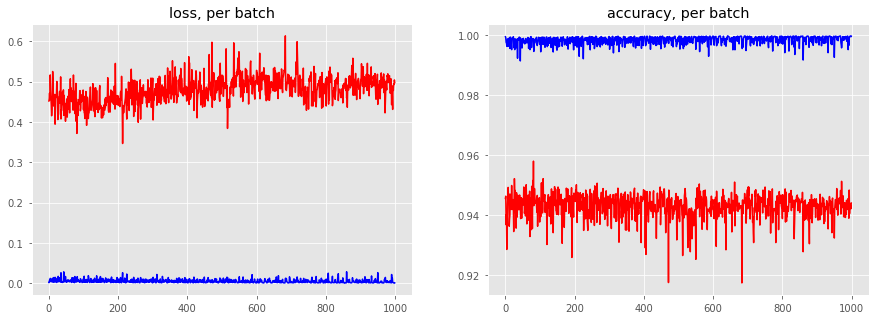

In [128]:
#SMOTE-ReliefF
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_smote_ReliefF.get_values('loss',1), 'b-', label='train');
plt.plot(bl_smote_ReliefF.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_smote_ReliefF.get_values('acc',1), 'b-', label='train');
plt.plot(bl_smote_ReliefF.get_values('val_acc',1), 'r-', label='test');
print("SMOTE Borderline Type 2 -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.show()

Random Undersampling -> Relief F Feature Selection -> Feed Forward Deep NN


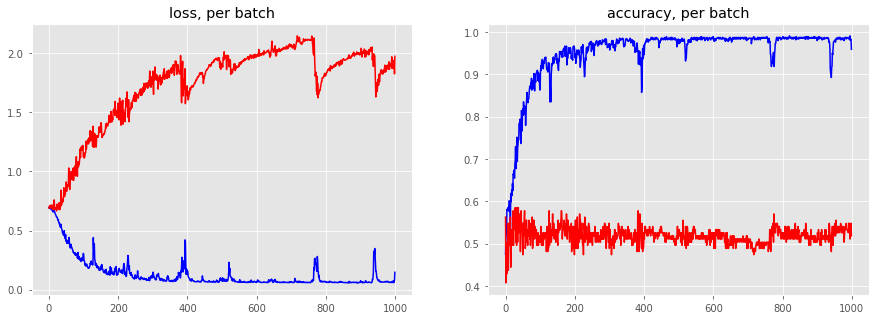

In [129]:
#Random US-ReliefF
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_randus_ReliefF.get_values('loss',1), 'b-', label='train');
plt.plot(bl_randus_ReliefF.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_randus_ReliefF.get_values('acc',1), 'b-', label='train');
plt.plot(bl_randus_ReliefF.get_values('val_acc',1), 'r-', label='test');
print("Random Undersampling -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.show()

Centroids Undersampling -> Relief F Feature Selection -> Feed Forward Deep NN


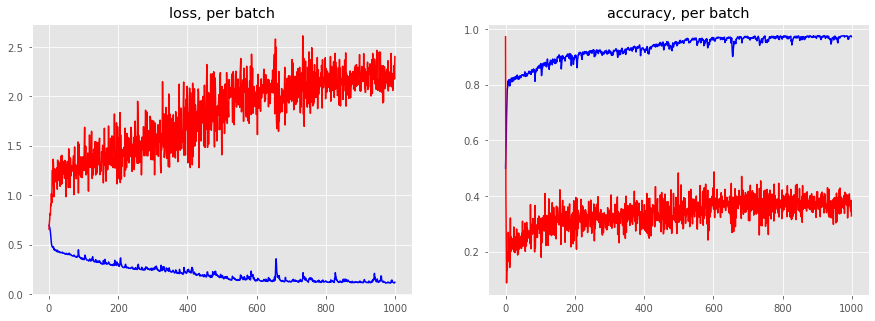

In [130]:
#Centroids-ReliefF
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_centroids_ReliefF.get_values('loss',1), 'b-', label='train');
plt.plot(bl_centroids_ReliefF.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_centroids_ReliefF.get_values('acc',1), 'b-', label='train');
plt.plot(bl_centroids_ReliefF.get_values('val_acc',1), 'r-', label='test');
print("Centroids Undersampling -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.show()

Non-sampling Dataset -> Relief F Feature Selection -> Feed Forward Deep NN


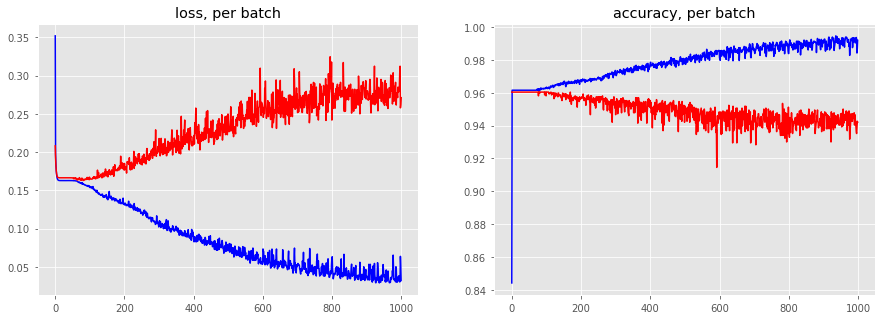

In [131]:
#Non-sampling-ReliefF
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_non_sampling_ReliefF.get_values('loss',1), 'b-', label='train');
plt.plot(bl_non_sampling_ReliefF.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_non_sampling_ReliefF.get_values('acc',1), 'b-', label='train');
plt.plot(bl_non_sampling_ReliefF.get_values('val_acc',1), 'r-', label='test');
print("Non-sampling Dataset -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.show()

SMOTE Borderline Type 2 -> Chi-Square Feature Selection -> Feed Forward Deep NN


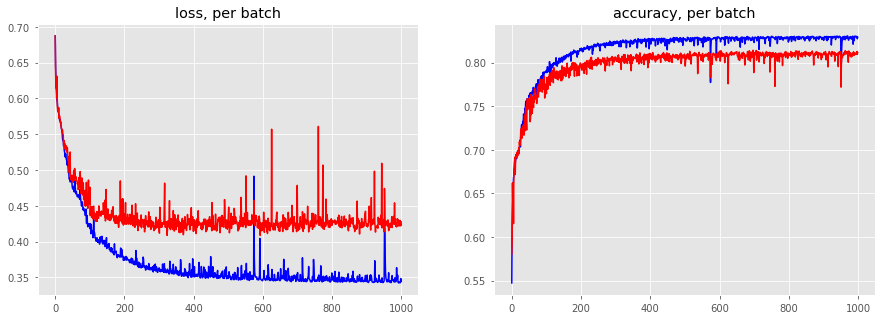

In [132]:
#SMOTE-Chi
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_smote_chi.get_values('loss',1), 'b-', label='train');
plt.plot(bl_smote_chi.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_smote_chi.get_values('acc',1), 'b-', label='train');
plt.plot(bl_smote_chi.get_values('val_acc',1), 'r-', label='test');
print("SMOTE Borderline Type 2 -> Chi-Square Feature Selection -> Feed Forward Deep NN")
plt.show()

Random Undersampling -> Chi-Square Feature Selection -> Feed Forward Deep NN


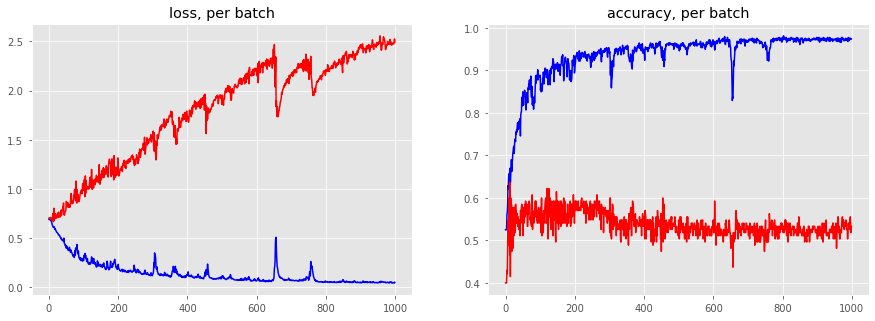

In [133]:
#Random US-Chi
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_randus_chi.get_values('loss',1), 'b-', label='train');
plt.plot(bl_randus_chi.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_randus_chi.get_values('acc',1), 'b-', label='train');
plt.plot(bl_randus_chi.get_values('val_acc',1), 'r-', label='test');
print("Random Undersampling -> Chi-Square Feature Selection -> Feed Forward Deep NN")
plt.show()

Non-sampling Dataset -> Chi-Square Feature Selection -> Feed Forward Deep NN


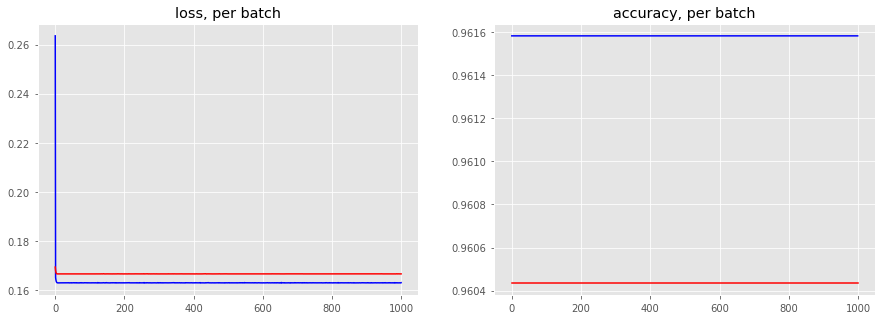

In [134]:
#Non-sampling-Chi
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.title('loss, per batch')
plt.plot(bl_non_sampling_chi.get_values('loss',1), 'b-', label='train');
plt.plot(bl_non_sampling_chi.get_values('val_loss',1), 'r-', label='test');

plt.subplot(1, 2, 2)
plt.title('accuracy, per batch')
plt.plot(bl_non_sampling_chi.get_values('acc',1), 'b-', label='train');
plt.plot(bl_non_sampling_chi.get_values('val_acc',1), 'r-', label='test');
print("Non-sampling Dataset -> Chi-Square Feature Selection -> Feed Forward Deep NN")
plt.show()

SMOTE Borderline Type 2 -> Relief F Feature Selection -> Feed Forward Deep NN


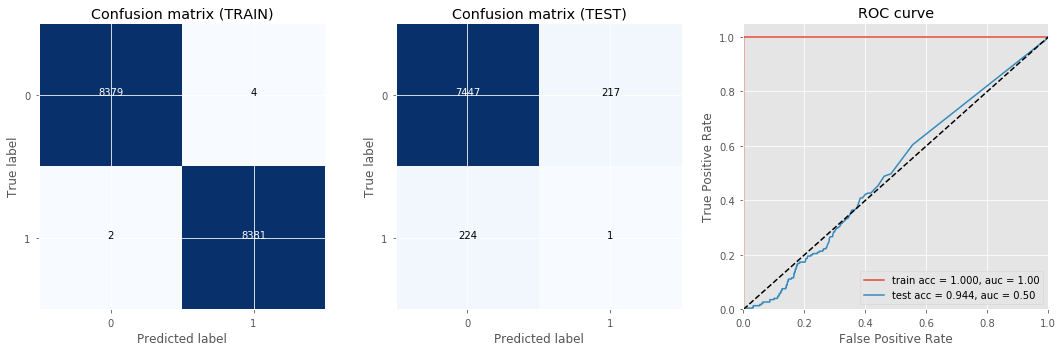

In [135]:
#SMOTE-ReliefF
y_smote_train_pred_ReliefF = model_smote_ReliefF.predict_on_batch(np.array(X_smote_train_ReliefF))[:,0]
y_smote_test_pred_ReliefF = model_smote_ReliefF.predict_on_batch(np.array(X_smote_test_ReliefF))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_smote_train_ReliefF, y_smote_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_smote_test_ReliefF, y_smote_test_pred_ReliefF, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_smote_train_ReliefF, y_smote_train_pred_ReliefF, y_smote_test_ReliefF, y_smote_test_pred_ReliefF)
print("SMOTE Borderline Type 2 -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.tight_layout()
plt.show()

Random Undersampling -> Relief F Feature Selection -> Feed Forward Deep NN


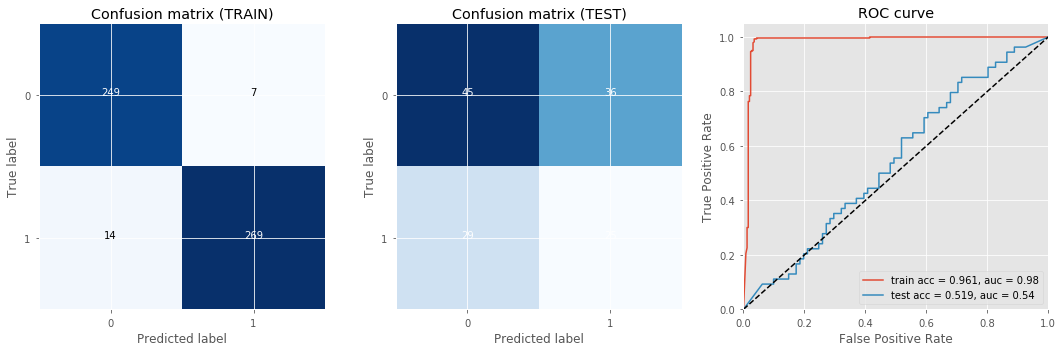

In [136]:
#Random US-ReliefF
y_randus_train_pred_ReliefF = model_randus_ReliefF.predict_on_batch(np.array(X_randus_train_ReliefF))[:,0]
y_randus_test_pred_ReliefF = model_randus_ReliefF.predict_on_batch(np.array(X_randus_test_ReliefF))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_randus_train_ReliefF, y_randus_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_randus_test_ReliefF, y_randus_test_pred_ReliefF, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_randus_train_ReliefF, y_randus_train_pred_ReliefF, y_randus_test_ReliefF, y_randus_test_pred_ReliefF)
print("Random Undersampling -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.tight_layout()
plt.show()

Non-sampling Dataset -> Relief F Feature Selection -> Feed Forward Deep NN


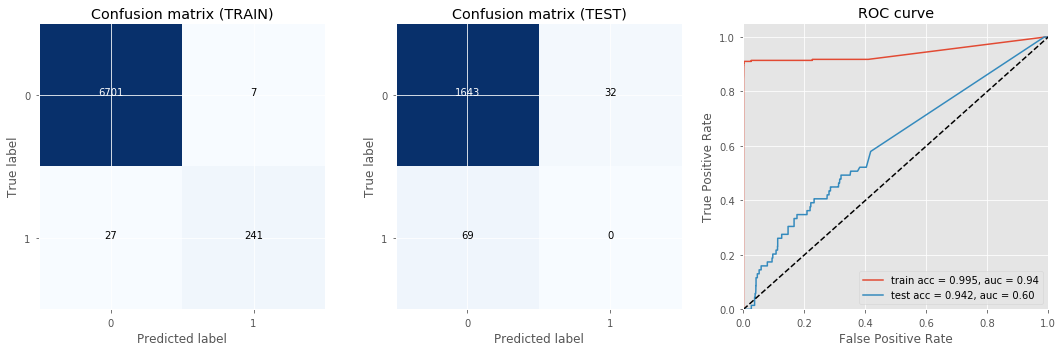

In [137]:
#Non-sampling-ReliefF
y_non_sampling_train_pred_ReliefF = model_non_sampling_ReliefF.predict_on_batch(np.array(X_non_sampling_train_ReliefF))[:,0]
y_non_sampling_test_pred_ReliefF = model_non_sampling_ReliefF.predict_on_batch(np.array(X_non_sampling_test_ReliefF))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_non_sampling_train_ReliefF, y_non_sampling_train_pred_ReliefF, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_non_sampling_test_ReliefF, y_non_sampling_test_pred_ReliefF, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_non_sampling_train_ReliefF, y_non_sampling_train_pred_ReliefF, y_non_sampling_test_ReliefF, y_non_sampling_test_pred_ReliefF)
print("Non-sampling Dataset -> Relief F Feature Selection -> Feed Forward Deep NN")
plt.tight_layout()
plt.show()

SMOTE Borderline Type 2 -> Chi-Square Feature Selection -> Feed Forward Deep NN


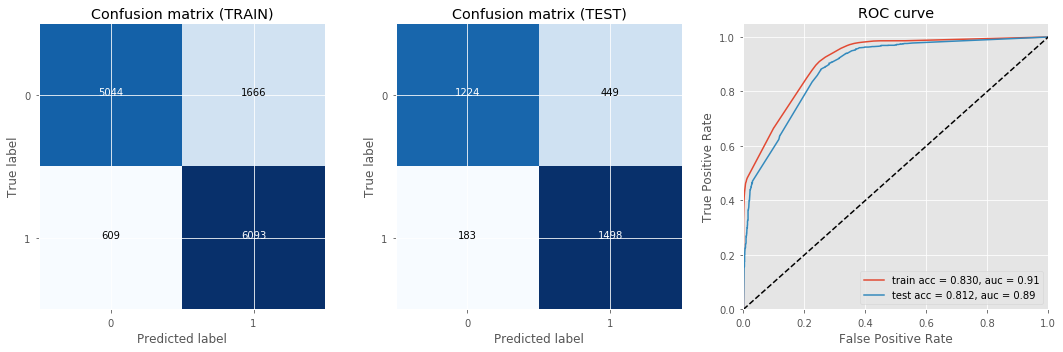

In [138]:
#SMOTE-Chi
y_smote_train_pred_chi = model_smote_chi.predict_on_batch(np.array(X_smote_train_chi))[:,0]
y_smote_test_pred_chi = model_smote_chi.predict_on_batch(np.array(X_smote_test_chi))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_smote_train_chi, y_smote_train_pred_chi, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_smote_test_chi, y_smote_test_pred_chi, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_smote_train_chi, y_smote_train_pred_chi, y_smote_test_chi, y_smote_test_pred_chi)
print("SMOTE Borderline Type 2 -> Chi-Square Feature Selection -> Feed Forward Deep NN")
plt.tight_layout()
plt.show()

Random Undersampling -> Chi-Square Feature Selection -> Feed Forward Deep NN


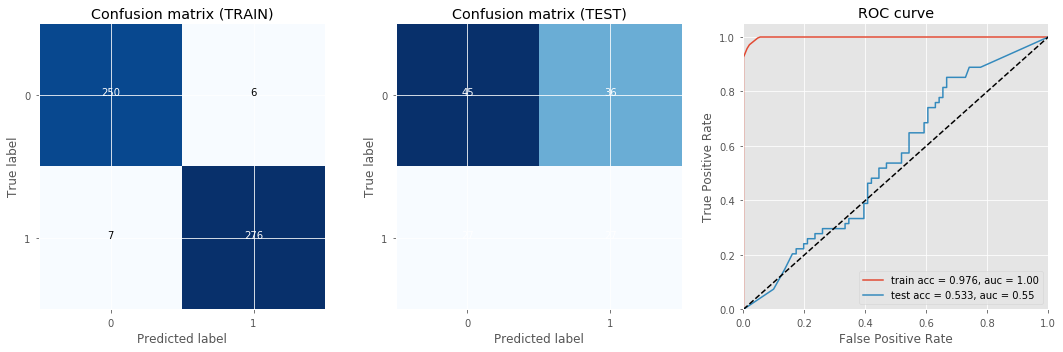

In [139]:
#Random US-Chi
y_randus_train_pred_chi = model_randus_chi.predict_on_batch(np.array(X_randus_train_chi))[:,0]
y_randus_test_pred_chi = model_randus_chi.predict_on_batch(np.array(X_randus_test_chi))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_randus_train_chi, y_randus_train_pred_chi, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_randus_test_chi, y_randus_test_pred_chi, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_randus_train_chi, y_randus_train_pred_chi, y_randus_test_chi, y_randus_test_pred_chi)
print("Random Undersampling -> Chi-Square Feature Selection -> Feed Forward Deep NN")
plt.tight_layout()
plt.show()

Non-sampling Dataset -> Chi-Square Feature Selection -> Feed Forward Deep NN


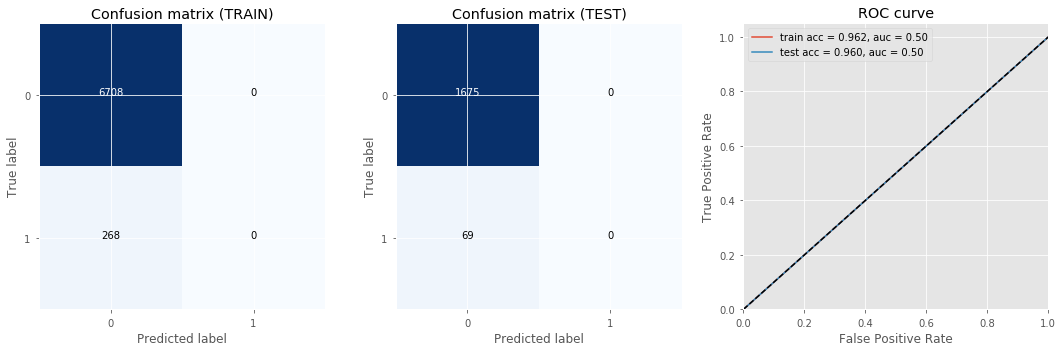

In [140]:
#Non-sampling-Chi
y_non_sampling_train_pred_chi = model_non_sampling_chi.predict_on_batch(np.array(X_non_sampling_train_chi))[:,0]
y_non_sampling_test_pred_chi = model_non_sampling_chi.predict_on_batch(np.array(X_non_sampling_test_chi))[:,0]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0], y_non_sampling_train_chi, y_non_sampling_train_pred_chi, [0,1], 'Confusion matrix (TRAIN)')
plot_cm(ax[1], y_non_sampling_test_chi, y_non_sampling_test_pred_chi, [0,1], 'Confusion matrix (TEST)')

plot_auc(ax[2], y_non_sampling_train_chi, y_non_sampling_train_pred_chi, y_non_sampling_test_chi, y_non_sampling_test_pred_chi)
print("Non-sampling Dataset -> Chi-Square Feature Selection -> Feed Forward Deep NN")
plt.tight_layout()
plt.show()

#### Logistic Classifier with Centroids-ReliefF dataset

In [141]:
X_train = X_centroids_prep_ReliefF
X_test = X_testset_centroids_prep_ReliefF
y_train = y_centroids_ReliefF
y_test = y_testset_centroids_ReliefF

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 792 6872]
 [  20  205]]
              precision    recall  f1-score   support

           0       0.98      0.10      0.19      7664
           1       0.03      0.91      0.06       225

    accuracy                           0.13      7889
   macro avg       0.50      0.51      0.12      7889
weighted avg       0.95      0.13      0.18      7889



/anaconda3/envs/[anaconda36]/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Logistic Classifier with SMOTE-ReliefF dataset

In [142]:
X_train = X_smote_prep_ReliefF
X_test = X_testset_smote_prep_ReliefF
y_train = y_smote_ReliefF
y_test = y_testset_smote_ReliefF

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

/anaconda3/envs/[anaconda36]/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: 'numpy.ndarray' object is not callable

### Conclusion

Using SMOTE to oversample features can help to handle an imbalanced dataset. Feature's quality of the existing dataset probably affects to the mean of undersampling for the dataset, because the classifier seems not to predict properly.

### Citation

Borderline-SMOTE: A New Over-Sampling Method in Imbalanced Data Sets Learning,Hui Han, Wen-Yuan Wang, et al. [1]<br>
Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning,Guillaume  Lema and Fernando Nogueira and Christos K. Aridas, Journal of Machine Learning Research, Vol.18, Number 17, Pages 1-5, 2017 [2]